<a href="https://colab.research.google.com/github/Phanuwat042/git_test/blob/main/RiceYieldPrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ปริมาณการผลิตข้าว/ผลผลิตข้าว ปี 65

In [ ]:
#อ่านไฟล์
rice_yield_65 = pd.read_csv('Yield65.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(rice_yield_65.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         148 non-null    int64  
 1   subcommod    148 non-null    object 
 2   province     148 non-null    object 
 3   yield(tons)  148 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(rice_yield_65.describe())

         year   yield(tons)
count   148.0  1.480000e+02
mean   2565.0  2.221820e+05
std       0.0  3.042584e+05
min    2565.0  4.480000e+00
25%    2565.0  1.250800e+04
50%    2565.0  1.000425e+05
75%    2565.0  2.549148e+05
max    2565.0  1.395640e+06


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {rice_yield_65.shape[0]}")
print(f"จำนวนคอลัมน์: {rice_yield_65.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 148
จำนวนคอลัมน์: 4


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(rice_yield_65.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year             int64
subcommod       object
province        object
yield(tons)    float64
dtype: object


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(rice_yield_65.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'subcommod', 'province', 'yield(tons)']


In [ ]:
#ดูค่าที่ไม่ซ้ำในแต่ละคอลัมน์
for col in rice_yield_65.columns:
    print(f"🔹 คอลัมน์: {col}")
    print(rice_yield_65[col].unique())  # แสดงค่าที่ไม่ซ้ำกันทั้งหมด
    print("-" * 50)

🔹 คอลัมน์: year
[2565]
--------------------------------------------------
🔹 คอลัมน์: subcommod
['ข้าวนาปี' 'ข้าวนาปรัง']
--------------------------------------------------
🔹 คอลัมน์: province
['เชียงราย' 'พะเยา' 'ลำปาง' 'ลำพูน' 'เชียงใหม่' 'แม่ฮ่องสอน' 'ตาก'
 'กำแพงเพชร' 'สุโขทัย' 'แพร่' 'น่าน' 'อุตรดิตถ์' 'พิษณุโลก' 'พิจิตร'
 'นครสวรรค์' 'อุทัยธานี' 'เพชรบูรณ์' 'เลย' 'หนองบัวลำภู' 'อุดรธานี'
 'หนองคาย' 'บึงกาฬ' 'สกลนคร' 'นครพนม' 'มุกดาหาร' 'ยโสธร' 'อำนาจเจริญ'
 'อุบลราชธานี' 'ศรีสะเกษ' 'สุรินทร์' 'บุรีรัมย์' 'มหาสารคาม' 'ร้อยเอ็ด'
 'กาฬสินธุ์' 'ขอนแก่น' 'ชัยภูมิ' 'นครราชสีมา' 'สระบุรี' 'ลพบุรี' 'ชัยนาท'
 'สิงห์บุรี' 'สุพรรณบุรี' 'อ่างทอง' 'พระนครศรีอยุธยา' 'นนทบุรี'
 'กรุงเทพมหานคร' 'ปทุมธานี' 'นครนายก' 'ปราจีนบุรี' 'ฉะเชิงเทรา' 'สระแก้ว'
 'จันทบุรี' 'ตราด' 'ระยอง' 'ชลบุรี' 'สมุทรปราการ' 'สมุทรสาคร' 'นครปฐม'
 'กาญจนบุรี' 'ราชบุรี' 'สมุทรสงคราม' 'เพชรบุรี' 'ประจวบคีรีขันธ์' 'ชุมพร'
 'ระนอง' 'สุราษฎร์ธานี' 'พังงา' 'ภูเก็ต' 'กระบี่' 'ตรัง' 'นครศรีธรรมราช'
 'พัทลุง' 'สงขลา' 'สตูล' 'ปัตตาน

In [ ]:
# Replace the year 2565 with 2022 in the 'year' column
rice_yield_65['year'] = rice_yield_65['year'].replace(2565, 2022)

# Verify the change
print(rice_yield_65[['province', 'year']].head())

    province  year
0   เชียงราย  2022
1      พะเยา  2022
2      ลำปาง  2022
3      ลำพูน  2022
4  เชียงใหม่  2022


In [ ]:
# สร้าง dictionary แปลงชื่อจังหวัด
province_mapping = {
    'เชียงราย': 'Chiang Rai', 'พะเยา': 'Phayao', 'ลำปาง': 'Lampang', 'ลำพูน': 'Lamphun', 'เชียงใหม่': 'Chiang Mai',
    'แม่ฮ่องสอน': 'Mae Hong Son', 'ตาก': 'Tak', 'กำแพงเพชร': 'Kamphaeng Phet', 'สุโขทัย': 'Sukhothai', 'แพร่': 'Phrae',
    'น่าน': 'Nan', 'อุตรดิตถ์': 'Uttaradit', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'นครสวรรค์': 'Nakhon Sawan',
    'อุทัยธานี': 'Uthai Thani', 'เพชรบูรณ์': 'Phetchabun', 'เลย': 'Loei', 'หนองบัวลำภู': 'Nong Bua Lamphu', 'อุดรธานี': 'Udon Thani',
    'หนองคาย': 'Nong Khai', 'บึงกาฬ': 'Bueng Kan', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom', 'มุกดาหาร': 'Mukdahan',
    'ยโสธร': 'Yasothon', 'อำนาจเจริญ': 'Amnat Charoen', 'อุบลราชธานี': 'Ubon Ratchathani', 'ศรีสะเกษ': 'Si Sa Ket', 'สุรินทร์': 'Surin',
    'บุรีรัมย์': 'Buri Ram', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'ขอนแก่น': 'Khon Kaen',
    'ชัยภูมิ': 'Chaiyaphum', 'นครราชสีมา': 'Nakhon Ratchasima', 'สระบุรี': 'Saraburi', 'ลพบุรี': 'Lop Buri', 'ชัยนาท': 'Chai Nat',
    'สิงห์บุรี': 'Sing Buri', 'สุพรรณบุรี': 'Suphan Buri', 'อ่างทอง': 'Ang Thong', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'นนทบุรี': 'Nonthaburi', 'กรุงเทพมหานคร': 'Bangkok', 'ปทุมธานี': 'Pathum Thani', 'นครนายก': 'Nakhon Nayok', 'ปราจีนบุรี': 'Prachin Buri',
    'ฉะเชิงเทรา': 'Chachoengsao', 'สระแก้ว': 'Sa Kaeo', 'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ระยอง': 'Rayong',
    'ชลบุรี': 'Chon Buri', 'สมุทรปราการ': 'Samut Prakan', 'สมุทรสาคร': 'Samut Sakhon', 'นครปฐม': 'Nakhon Pathom',
    'กาญจนบุรี': 'Kanchanaburi', 'ราชบุรี': 'Ratchaburi', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan', 'ชุมพร': 'Chumphon', 'ระนอง': 'Ranong', 'สุราษฎร์ธานี': 'Surat Thani',
    'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'กระบี่': 'Krabi', 'ตรัง': 'Trang', 'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'พัทลุง': 'Phatthalung', 'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# แปลงชื่อจังหวัดในคอลัมน์ province
rice_yield_65['province'] = rice_yield_65['province'].map(province_mapping)

# ตรวจสอบผลลัพธ์
print(rice_yield_65[['province']].head())

     province
0  Chiang Rai
1      Phayao
2     Lampang
3     Lamphun
4  Chiang Mai


# ทำ One-Hot Encoding ของ subcommod ข้าวนาปี นาปรัง และ ปี 65

In [ ]:
rice_yield_65_onehot = pd.get_dummies(rice_yield_65, columns=['subcommod','year'], dtype=int)

In [ ]:
rice_yield_65_onehot

province  yield(tons)  subcommod_ข้าวนาปรัง  \
0             Chiang Rai     705751.0                     0   
1                 Phayao     302894.0                     0   
2                Lampang     232438.0                     0   
3                Lamphun      61670.0                     0   
4             Chiang Mai     320879.0                     0   
..                   ...          ...                   ...   
143  Nakhon Si Thammarat       2416.0                     1   
144          Phatthalung      14314.0                     1   
145             Songkhla       8488.0                     1   
146              Pattani      12634.0                     1   
147           Narathiwat        298.0                     1   

     subcommod_ข้าวนาปี  year_2022  
0                     1          1  
1                     1          1  
2                     1          1  
3                     1          1  
4                     1          1  
..                  ...        ...  
143                   0          1  
144                   0          1  
145                   0          1  
146                   0          1  
147                   0          1  

[148 rows x 5 columns]

In [ ]:
# ตรวจสอบค่าว่าง
print(rice_yield_65_onehot.isnull().sum())

province                0
yield(tons)             0
subcommod_ข้าวนาปรัง    0
subcommod_ข้าวนาปี      0
year_2022               0
dtype: int64


In [ ]:
print(rice_yield_65.duplicated().sum())

0


In [ ]:
print(rice_yield_65_onehot.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'subcommod_ข้าวนาปี',
       'year_2022'],
      dtype='object')


In [ ]:
#rice_yield_65_onehot.to_csv('df_rice_yield_clean.csv', index=False)

# กราฟวงกลมแสดงเปอร์เซ็นต์ในการทำนาปีและนาปรังในปี2565

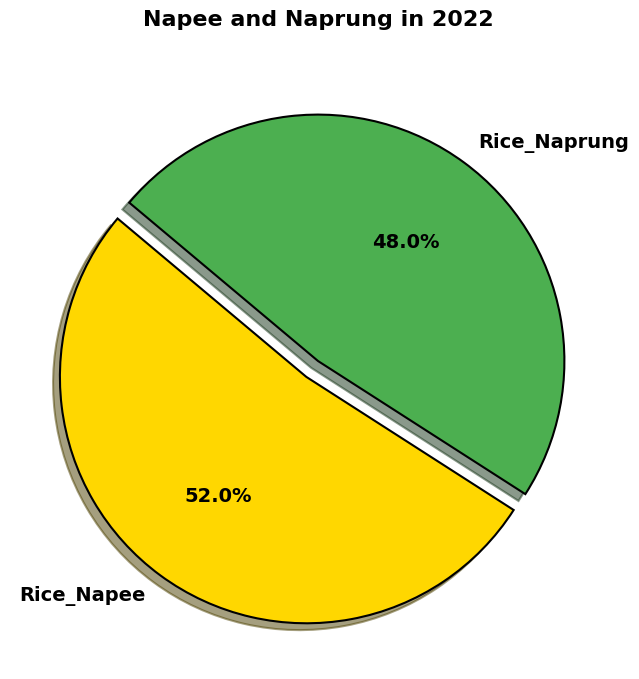

In [ ]:
# รวมจำนวนของข้าวนาปีและข้าวนาปรัง
rice_counts = rice_yield_65_onehot[['subcommod_ข้าวนาปี', 'subcommod_ข้าวนาปรัง']].sum()

# ปรับโทนสีใหม่ให้ดูสบายตา
colors = ['#FFD700', '#4CAF50']  # สีทองและสีเขียว
explode = (0.08, 0)  # แยกข้าวนาปีออกมาเล็กน้อย

# สร้างกราฟแบบ Pie Chart พร้อมปรับแต่ง
fig, ax = plt.subplots(figsize=(8, 8))  # ปรับขนาดให้เป็นสี่เหลี่ยมจัตุรัสเพื่อให้เป็นวงกลมสมบูรณ์
wedges, texts, autotexts = ax.pie(
    rice_counts, labels=['Rice_Napee', 'Rice_Naprung'], autopct='%1.1f%%',
    colors=colors, explode=explode, startangle=140, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True}
)

# ปรับขนาดตัวอักษรให้ชัดเจนขึ้น
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

# ตั้งค่าชื่อเรื่องให้ดูโดดเด่น
plt.title("Napee and Naprung in 2022", fontsize=16, fontweight='bold', pad=20)

# แสดงกราฟ
plt.show()

# กราฟเส้นแสดงผลผลิตข้าวในแต่ละจังหวัดในปี 2565

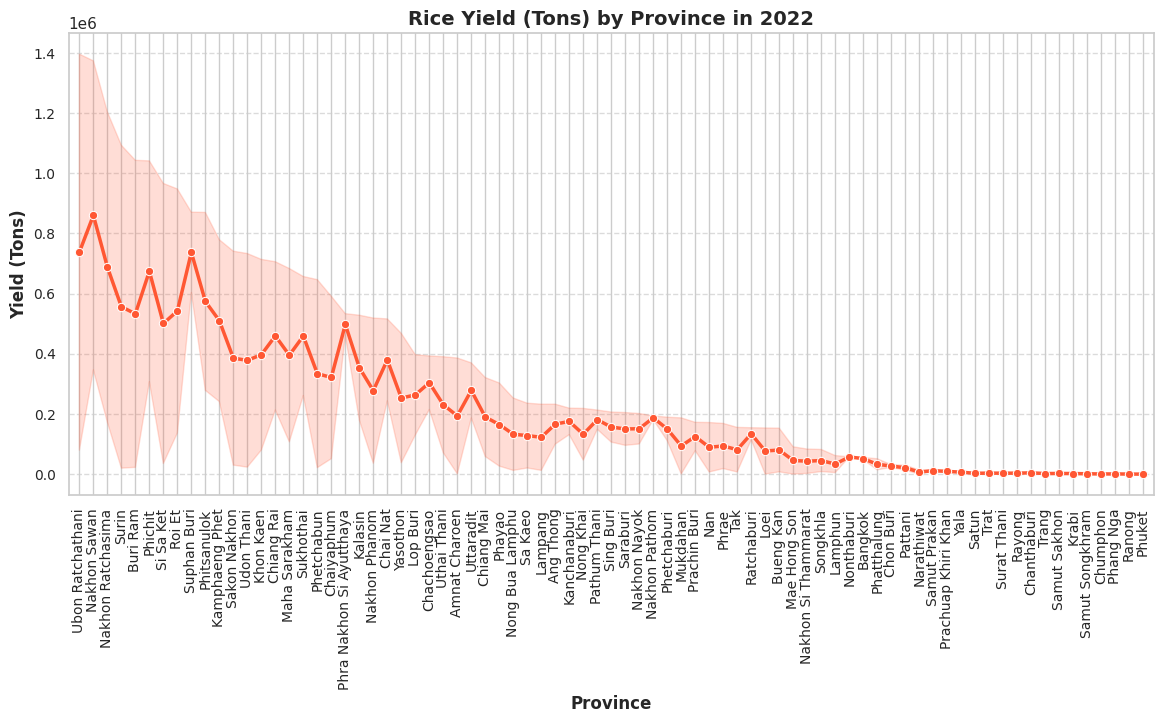

In [ ]:
# เรียงลำดับจากมากไปน้อย
rice_yield_65_onehot = rice_yield_65_onehot.sort_values(by='yield(tons)', ascending=False)

# กำหนดสีและสไตล์
sns.set(style="whitegrid")

# สร้างกราฟเส้น
plt.figure(figsize=(14, 6))  # ปรับขนาดให้ยาวขึ้น
sns.lineplot(x='province', y='yield(tons)', data=rice_yield_65_onehot, marker='o', color='#FF5733', linewidth=2.5)

# ปรับแต่งกราฟ
plt.xticks(rotation=90, fontsize=10)  # หมุนชื่อจังหวัดให้เป็นแนวดิ่ง
plt.yticks(fontsize=10)
plt.xlabel("Province", fontsize=12, fontweight='bold')
plt.ylabel("Yield (Tons)", fontsize=12, fontweight='bold')
plt.title("Rice Yield (Tons) by Province in 2022", fontsize=14, fontweight='bold')

# เพิ่มเส้น Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ปรับระยะห่างของชื่อจังหวัดให้ไม่ทับกัน
plt.gca().margins(x=0.01)  # ลด margin เพื่อให้พอดีกับข้อมูล

# แสดงกราฟ
plt.show()

# ปริมาณฝนเชิงพื้นที่ ปี 65

In [ ]:
#อ่านไฟล์
rain_65 = pd.read_csv('rmax-rmin65.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(rain_65.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      924 non-null    int64  
 1   month     924 non-null    int64  
 2   province  924 non-null    object 
 3   MinRain   924 non-null    float64
 4   MaxRain   924 non-null    float64
 5   AvgRain   924 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 43.4+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(rain_65.describe())

         year       month     MinRain      MaxRain      AvgRain
count   924.0  924.000000  924.000000   924.000000   924.000000
mean   2022.0    6.500000  111.366439   230.363377   163.057309
std       0.0    3.453922  108.585612   193.068790   139.869038
min    2022.0    1.000000    0.000000     0.000000     0.000000
25%    2022.0    3.750000   29.150000    92.397501    60.461416
50%    2022.0    6.500000   79.115002   191.259995   128.853260
75%    2022.0    9.250000  172.734997   319.062492   246.344252
max    2022.0   12.000000  750.080017  1469.099976  1053.797517


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {rain_65.shape[0]}")
print(f"จำนวนคอลัมน์: {rain_65.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 924
จำนวนคอลัมน์: 6


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(rain_65.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'month', 'province', 'MinRain', 'MaxRain', 'AvgRain']


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(rain_65.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year          int64
month         int64
province     object
MinRain     float64
MaxRain     float64
AvgRain     float64
dtype: object


In [ ]:
#ดูค่าที่ไม่ซ้ำในแต่ละคอลัมน์
for col in rain_65.columns:
    print(f"🔹 คอลัมน์: {col}")
    print(rain_65[col].unique())  # แสดงค่าที่ไม่ซ้ำกันทั้งหมด
    print("-" * 50)

🔹 คอลัมน์: year
[2022]
--------------------------------------------------
🔹 คอลัมน์: month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
--------------------------------------------------
🔹 คอลัมน์: province
['กรุงเทพมหานคร' 'สมุทรปราการ' 'นนทบุรี' 'ปทุมธานี' 'พระนครศรีอยุธยา'
 'อ่างทอง' 'ลพบุรี' 'สิงห์บุรี' 'ชัยนาท' 'สระบุรี' 'ชลบุรี' 'ระยอง'
 'จันทบุรี' 'ตราด' 'ฉะเชิงเทรา' 'ปราจีนบุรี' 'นครนายก' 'สระแก้ว'
 'นครราชสีมา' 'บุรีรัมย์' 'สุรินทร์' 'ศรีสะเกษ' 'อุบลราชธานี' 'ยโสธร'
 'ชัยภูมิ' 'อำนาจเจริญ' 'บึงกาฬ' 'หนองบัวลำภู' 'ขอนแก่น' 'อุดรธานี' 'เลย'
 'หนองคาย' 'มหาสารคาม' 'ร้อยเอ็ด' 'กาฬสินธุ์' 'สกลนคร' 'นครพนม' 'มุกดาหาร'
 'เชียงใหม่' 'ลำพูน' 'ลำปาง' 'อุตรดิตถ์' 'แพร่' 'น่าน' 'พะเยา' 'เชียงราย'
 'แม่ฮ่องสอน' 'นครสวรรค์' 'อุทัยธานี' 'กำแพงเพชร' 'ตาก' 'สุโขทัย'
 'พิษณุโลก' 'พิจิตร' 'เพชรบูรณ์' 'ราชบุรี' 'กาญจนบุรี' 'สุพรรณบุรี'
 'นครปฐม' 'สมุทรสาคร' 'สมุทรสงคราม' 'เพชรบุรี' 'ประจวบคีรีขันธ์'
 'นครศรีธรรมราช' 'กระบี่' 'พังงา' 'ภูเก็ต' 'สุราษฎร์ธานี' 'ระนอง' 'ชุมพร'
 'สงขลา' 'สตูล' 'ตรัง' 'พัทลุง'

In [ ]:
# Create a dictionary to map numeric months to English month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the values in the 'month' column using the dictionary
rain_65['month'] = rain_65['month'].map(month_map)

# Verify the change
print(rain_65[['month']].head())

     month
0  January
1  January
2  January
3  January
4  January


In [ ]:
province_map = {
    'กรุงเทพมหานคร': 'Bangkok', 'สมุทรปราการ': 'Samut Prakan', 'นนทบุรี': 'Nonthaburi', 'ปทุมธานี': 'Pathum Thani', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'อ่างทอง': 'Ang Thong', 'ลพบุรี': 'Lopburi', 'สิงห์บุรี': 'Sing Buri', 'ชัยนาท': 'Chai Nat', 'สระบุรี': 'Saraburi', 'ชลบุรี': 'Chonburi', 'ระยอง': 'Rayong',
    'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ฉะเชิงเทรา': 'Chachoengsao', 'ปราจีนบุรี': 'Prachinburi', 'นครนายก': 'Nakhon Nayok', 'สระแก้ว': 'Sa Kaeo',
    'นครราชสีมา': 'Nakhon Ratchasima', 'บุรีรัมย์': 'Buriram', 'สุรินทร์': 'Surin', 'ศรีสะเกษ': 'Sisaket', 'อุบลราชธานี': 'Ubon Ratchathani', 'ยโสธร': 'Yasothon',
    'ชัยภูมิ': 'Chaiyaphum', 'อำนาจเจริญ': 'Amnat Charoen', 'บึงกาฬ': 'Bueng Kan', 'หนองบัวลำภู': 'Nong Bua Lam Phu', 'ขอนแก่น': 'Khon Kaen', 'อุดรธานี': 'Udon Thani',
    'เลย': 'Loei', 'หนองคาย': 'Nong Khai', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom',
    'มุกดาหาร': 'Mukdahan', 'เชียงใหม่': 'Chiang Mai', 'ลำพูน': 'Lamphun', 'ลำปาง': 'Lampang', 'อุตรดิตถ์': 'Uttaradit', 'แพร่': 'Phrae', 'น่าน': 'Nan', 'พะเยา': 'Phayao',
    'เชียงราย': 'Chiang Rai', 'แม่ฮ่องสอน': 'Mae Hong Son', 'นครสวรรค์': 'Nakhon Sawan', 'อุทัยธานี': 'Uthai Thani', 'กำแพงเพชร': 'Kamphaeng Phet', 'ตาก': 'Tak',
    'สุโขทัย': 'Sukhothai', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'เพชรบูรณ์': 'Phetchabun', 'ราชบุรี': 'Ratchaburi', 'กาญจนบุรี': 'Kanchanaburi', 'สุพรรณบุรี': 'Suphan Buri',
    'นครปฐม': 'Nakhon Pathom', 'สมุทรสาคร': 'Samut Sakhon', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi', 'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat', 'กระบี่': 'Krabi', 'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'สุราษฎร์ธานี': 'Surat Thani', 'ระนอง': 'Ranong', 'ชุมพร': 'Chumphon',
    'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ตรัง': 'Trang', 'พัทลุง': 'Phatthalung', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# Replace the province names using the mapping dictionary
rain_65['province'] = rain_65['province'].replace(province_map)

# Verify the changes
print(rain_65[['province']].head())


                   province
0                   Bangkok
1              Samut Prakan
2                Nonthaburi
3              Pathum Thani
4  Phra Nakhon Si Ayutthaya


# ทำ One-Hot Encoding ของ เดือน และ ปี 65

In [ ]:
rain_65_onehot = pd.get_dummies(rain_65, columns=['month','year'], dtype=int)

In [ ]:
rain_65_onehot

province     MinRain      MaxRain      AvgRain  \
0                     Bangkok   16.480000    43.790001    29.587532   
1                Samut Prakan   13.710000    43.639999    23.562694   
2                  Nonthaburi   14.910000    33.330002    26.843659   
3                Pathum Thani    1.520000    28.070000    16.432374   
4    Phra Nakhon Si Ayutthaya    1.720000    16.719999    10.627127   
..                        ...         ...          ...          ...   
919                     Trang  164.399994   540.900024   300.534944   
920               Phatthalung  372.899994   814.599976   649.380721   
921                   Pattani  641.500000  1139.000000   811.819392   
922                      Yala  601.099976   991.200012   742.610721   
923                Narathiwat  739.700012  1289.099976  1053.797517   

     month_April  month_August  month_December  month_February  month_January  \
0              0             0               0               0              1   
1              0             0               0               0              1   
2              0             0               0               0              1   
3              0             0               0               0              1   
4              0             0               0               0              1   
..           ...           ...             ...             ...            ...   
919            0             0               1               0              0   
920            0             0               1               0              0   
921            0             0               1               0              0   
922            0             0               1               0              0   
923            0             0               1               0              0   

     month_July  month_June  month_March  month_May  month_November  \
0             0           0            0          0               0   
1             0           0            0          0               0   
2             0           0            0          0               0   
3             0           0            0          0               0   
4             0           0            0          0               0   
..          ...         ...          ...        ...             ...   
919           0           0            0          0               0   
920           0           0            0          0               0   
921           0           0            0          0               0   
922           0           0            0          0               0   
923           0           0            0          0               0   

     month_October  month_September  year_2022  
0                0                0          1  
1                0                0          1  
2                0                0          1  
3                0                0          1  
4                0                0          1  
..             ...              ...        ...  
919              0                0          1  
920              0                0          1  
921              0                0          1  
922              0                0          1  
923              0                0          1  

[924 rows x 17 columns]

In [ ]:
print(rain_65_onehot.isnull().sum())

province           0
MinRain            0
MaxRain            0
AvgRain            0
month_April        0
month_August       0
month_December     0
month_February     0
month_January      0
month_July         0
month_June         0
month_March        0
month_May          0
month_November     0
month_October      0
month_September    0
year_2022          0
dtype: int64


In [ ]:
print(rain_65_onehot.duplicated().sum())

0


In [ ]:
#rain_65_onehot.to_csv('rain_65_clean.csv', index=False)

# กราฟแท่งแสดงความสัมพันธ์ปริมาณค่าฝนเฉลี่ยต่อเดือนปี 65

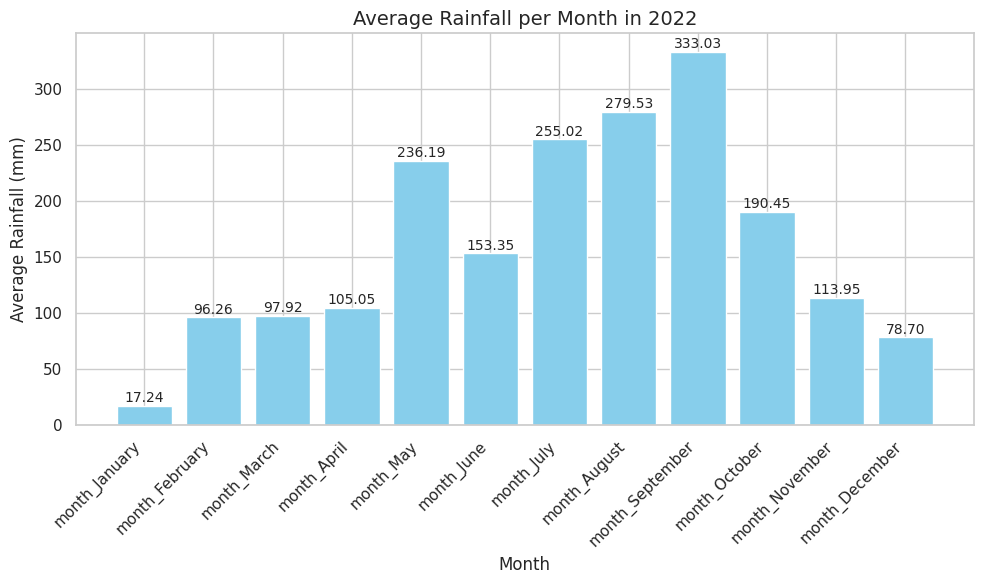

In [ ]:
# สร้าง DataFrame สำหรับแต่ละเดือนที่มีชื่อเดือนที่ต้องการ
months = ['month_January', 'month_February', 'month_March', 'month_April', 'month_May',
          'month_June', 'month_July', 'month_August', 'month_September', 'month_October',
          'month_November', 'month_December']

# คำนวณค่าเฉลี่ยของ AvgRain สำหรับแต่ละเดือน
avg_rain_per_month = [rain_65_onehot[month].dot(rain_65_onehot['AvgRain']) / rain_65_onehot[month].sum() for month in months]

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
bars = plt.bar(months, avg_rain_per_month, color='skyblue')

# เพิ่มค่าบนแท่งกราฟ
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# ปรับแต่งกราฟ
plt.title('Average Rainfall per Month in 2022', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# แสดงกราฟ
plt.show()

# กราฟแสดงความสัมพันธ์ระหว่างปริมาณน้ำฝนต่ำสุด-สูงสุดในแต่ละจังหวัด 65

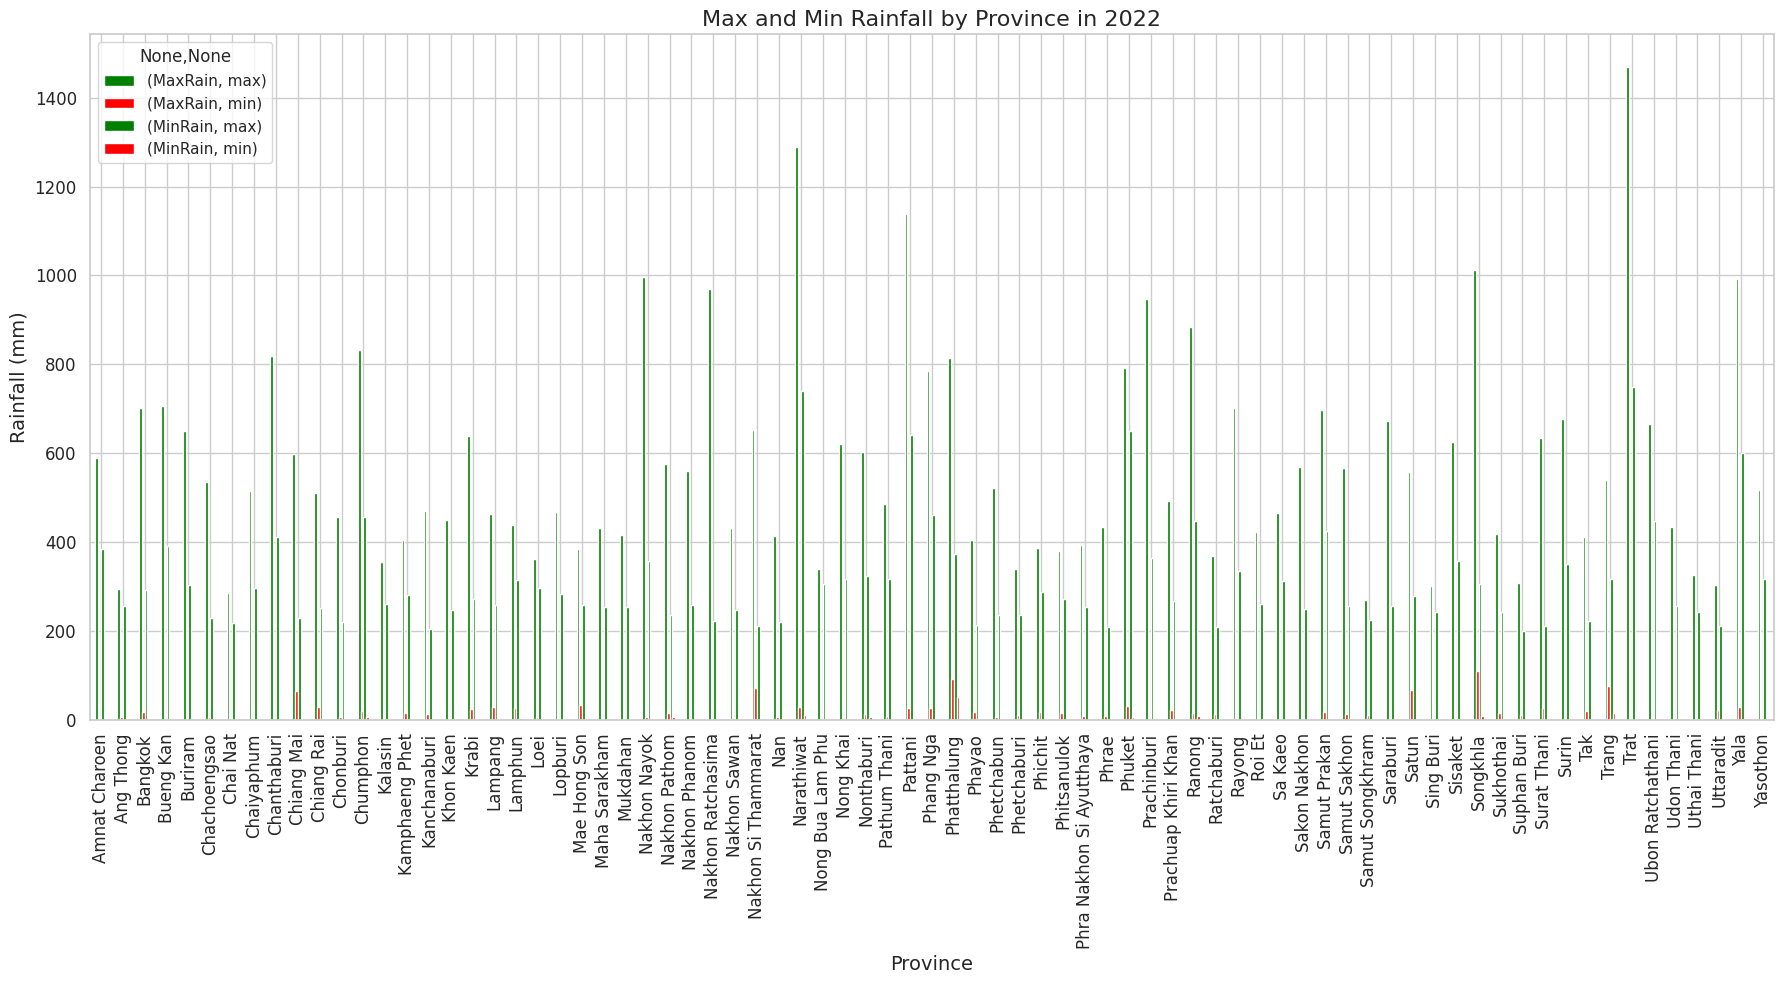

In [ ]:
# คำนวณค่า MaxRain และ MinRain สำหรับแต่ละจังหวัด
rain_by_province = rain_65_onehot.groupby('province')[['MaxRain', 'MinRain']].agg(['max', 'min'])

# สร้างกราฟแท่ง
rain_by_province.plot(kind='bar', figsize=(18, 10), color=['green', 'red'])

# ปรับแต่งกราฟ
plt.title('Max and Min Rainfall by Province in 2022', fontsize=16)  # เพิ่มขนาดฟอนต์ของชื่อกราฟ
plt.ylabel('Rainfall (mm)', fontsize=14)  # เพิ่มขนาดฟอนต์ของแกน Y
plt.xlabel('Province', fontsize=14)  # เพิ่มขนาดฟอนต์ของแกน X
plt.xticks(rotation=90, fontsize=12)  # ปรับการหมุนชื่อจังหวัดและขนาดฟอนต์
plt.yticks(fontsize=12)  # ขนาดฟอนต์ของตัวเลขในแกน Y
plt.tight_layout()  # ปรับขนาดกราฟให้เหมาะสม

# แสดงกราฟ
plt.show()

# อุณหภูมิสูงสุดและต่ำสุด ปี 65

In [ ]:
#อ่านไฟล์
temp_65 = pd.read_csv('tmax-tmin65.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(temp_65.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      780 non-null    int64  
 1   month     780 non-null    int64  
 2   province  780 non-null    object 
 3   Tmax      780 non-null    float64
 4   Tmin      780 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.6+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(temp_65.describe())

         year       month        Tmax        Tmin
count   780.0  780.000000  780.000000  780.000000
mean   2022.0    6.500000   35.675513   20.068333
std       0.0    3.454268    1.801163    3.503251
min    2022.0    1.000000   30.900000    6.900000
25%    2022.0    3.750000   34.500000   17.800000
50%    2022.0    6.500000   35.500000   21.200000
75%    2022.0    9.250000   36.600000   22.900000
max    2022.0   12.000000   42.600000   24.800000


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {temp_65.shape[0]}")
print(f"จำนวนคอลัมน์: {temp_65.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 780
จำนวนคอลัมน์: 5


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(temp_65.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'month', 'province', 'Tmax', 'Tmin']


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(temp_65.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year          int64
month         int64
province     object
Tmax        float64
Tmin        float64
dtype: object


In [ ]:
# Create a dictionary to map numeric months to English month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the values in the 'month' column using the dictionary
temp_65['month'] = temp_65['month'].map(month_map)

# Verify the change
print(temp_65[['month']].head())

     month
0  January
1  January
2  January
3  January
4  January


In [ ]:
province_map = {
    'กรุงเทพมหานคร': 'Bangkok', 'สมุทรปราการ': 'Samut Prakan', 'นนทบุรี': 'Nonthaburi', 'ปทุมธานี': 'Pathum Thani', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'อ่างทอง': 'Ang Thong', 'ลพบุรี': 'Lopburi', 'สิงห์บุรี': 'Sing Buri', 'ชัยนาท': 'Chai Nat', 'สระบุรี': 'Saraburi', 'ชลบุรี': 'Chonburi', 'ระยอง': 'Rayong',
    'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ฉะเชิงเทรา': 'Chachoengsao', 'ปราจีนบุรี': 'Prachinburi', 'นครนายก': 'Nakhon Nayok', 'สระแก้ว': 'Sa Kaeo',
    'นครราชสีมา': 'Nakhon Ratchasima', 'บุรีรัมย์': 'Buriram', 'สุรินทร์': 'Surin', 'ศรีสะเกษ': 'Sisaket', 'อุบลราชธานี': 'Ubon Ratchathani', 'ยโสธร': 'Yasothon',
    'ชัยภูมิ': 'Chaiyaphum', 'อำนาจเจริญ': 'Amnat Charoen', 'บึงกาฬ': 'Bueng Kan', 'หนองบัวลำภู': 'Nong Bua Lam Phu', 'ขอนแก่น': 'Khon Kaen', 'อุดรธานี': 'Udon Thani',
    'เลย': 'Loei', 'หนองคาย': 'Nong Khai', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom',
    'มุกดาหาร': 'Mukdahan', 'เชียงใหม่': 'Chiang Mai', 'ลำพูน': 'Lamphun', 'ลำปาง': 'Lampang', 'อุตรดิตถ์': 'Uttaradit', 'แพร่': 'Phrae', 'น่าน': 'Nan', 'พะเยา': 'Phayao',
    'เชียงราย': 'Chiang Rai', 'แม่ฮ่องสอน': 'Mae Hong Son', 'นครสวรรค์': 'Nakhon Sawan', 'อุทัยธานี': 'Uthai Thani', 'กำแพงเพชร': 'Kamphaeng Phet', 'ตาก': 'Tak',
    'สุโขทัย': 'Sukhothai', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'เพชรบูรณ์': 'Phetchabun', 'ราชบุรี': 'Ratchaburi', 'กาญจนบุรี': 'Kanchanaburi', 'สุพรรณบุรี': 'Suphan Buri',
    'นครปฐม': 'Nakhon Pathom', 'สมุทรสาคร': 'Samut Sakhon', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi', 'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat', 'กระบี่': 'Krabi', 'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'สุราษฎร์ธานี': 'Surat Thani', 'ระนอง': 'Ranong', 'ชุมพร': 'Chumphon',
    'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ตรัง': 'Trang', 'พัทลุง': 'Phatthalung', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# Replace the province names using the mapping dictionary
temp_65['province'] = temp_65['province'].replace(province_map)

# Verify the changes
print(temp_65[['province']].head())

                   province
0                   Bangkok
1              Samut Prakan
2              Pathum Thani
3  Phra Nakhon Si Ayutthaya
4                   Lopburi


# ทำ One-Hot Encoding ของ เดือน และ ปี 65

In [ ]:
temp_65_onehot = pd.get_dummies(temp_65, columns=['month','year'], dtype=int)

In [ ]:
temp_65_onehot

province  Tmax  Tmin  month_April  month_August  \
0                     Bangkok  36.4  21.2            0             0   
1                Samut Prakan  31.8  24.0            0             0   
2                Pathum Thani  36.5  20.5            0             0   
3    Phra Nakhon Si Ayutthaya  36.3  17.0            0             0   
4                     Lopburi  35.6  16.0            0             0   
..                        ...   ...   ...          ...           ...   
775                     Trang  32.9  20.9            0             0   
776               Phatthalung  31.5  21.5            0             0   
777                   Pattani  32.3  20.0            0             0   
778                      Yala  33.0  21.0            0             0   
779                Narathiwat  31.5  21.5            0             0   

     month_December  month_February  month_January  month_July  month_June  \
0                 0               0              1           0           0   
1                 0               0              1           0           0   
2                 0               0              1           0           0   
3                 0               0              1           0           0   
4                 0               0              1           0           0   
..              ...             ...            ...         ...         ...   
775               1               0              0           0           0   
776               1               0              0           0           0   
777               1               0              0           0           0   
778               1               0              0           0           0   
779               1               0              0           0           0   

     month_March  month_May  month_November  month_October  month_September  \
0              0          0               0              0                0   
1              0          0               0              0                0   
2              0          0               0              0                0   
3              0          0               0              0                0   
4              0          0               0              0                0   
..           ...        ...             ...            ...              ...   
775            0          0               0              0                0   
776            0          0               0              0                0   
777            0          0               0              0                0   
778            0          0               0              0                0   
779            0          0               0              0                0   

     year_2022  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
775          1  
776          1  
777          1  
778          1  
779          1  

[780 rows x 16 columns]

In [ ]:
print(temp_65_onehot.isnull().sum())

province           0
Tmax               0
Tmin               0
month_April        0
month_August       0
month_December     0
month_February     0
month_January      0
month_July         0
month_June         0
month_March        0
month_May          0
month_November     0
month_October      0
month_September    0
year_2022          0
dtype: int64


In [ ]:
print(temp_65_onehot.duplicated().sum())

0


In [ ]:
#temp_65_onehot.to_csv('temp_65_clean.csv', index=False)

# กราฟแสดงความสัมพันธ์อุณหภูมิต่ำสุด-สูงสุดเฉลี่ยในแต่ละเดือน 65

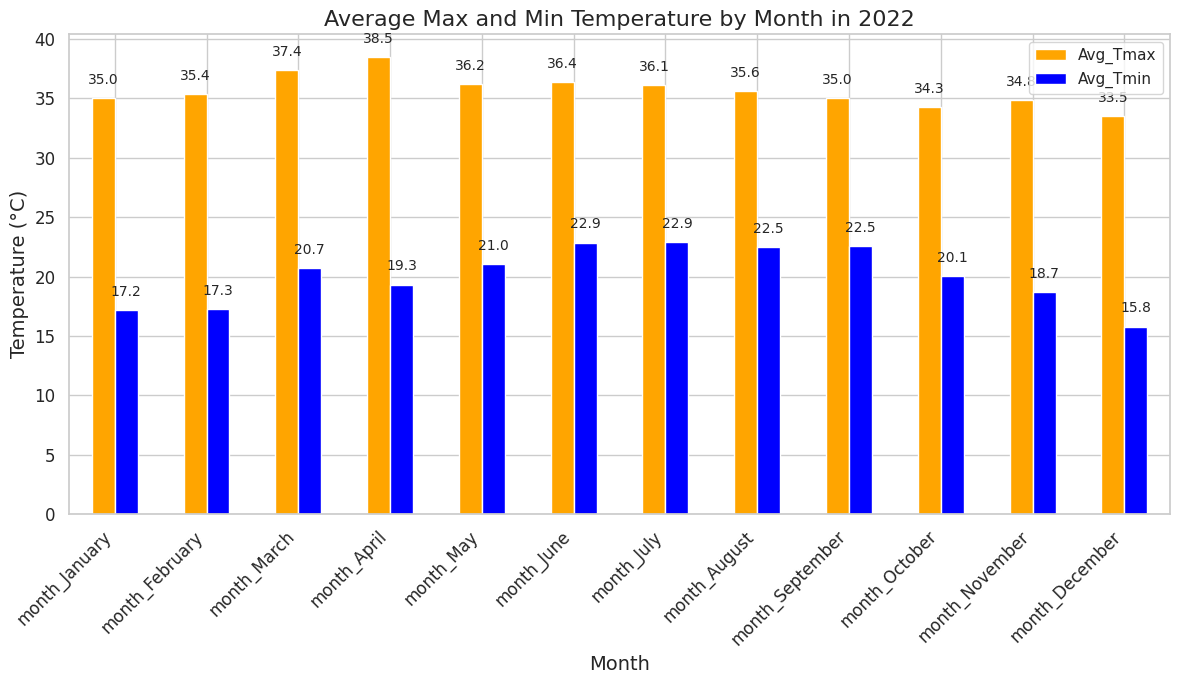

In [ ]:
# คำนวณค่าอุณหภูมิเฉลี่ย (Tmax และ Tmin) สำหรับแต่ละเดือน
avg_temp_by_month = {}

for month in months:
    avg_temp_by_month[month] = {
        'Avg_Tmax': temp_65_onehot[temp_65_onehot[month] == 1]['Tmax'].mean(),
        'Avg_Tmin': temp_65_onehot[temp_65_onehot[month] == 1]['Tmin'].mean()
    }

# สร้าง DataFrame จากผลลัพธ์
avg_temp_df = pd.DataFrame(avg_temp_by_month).T

# สร้างกราฟแท่งเพื่อแสดงค่าเฉลี่ยของ Tmax และ Tmin สำหรับแต่ละเดือน
ax = avg_temp_df.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])

# เพิ่มเลขกำกับบนแท่งกราฟ
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# ปรับแต่งกราฟ
plt.title('Average Max and Min Temperature by Month in 2022', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

# กราฟแสดงความสัมพันธ์อุณหภูมิเฉลี่ยในแต่ละจังหวัด 65

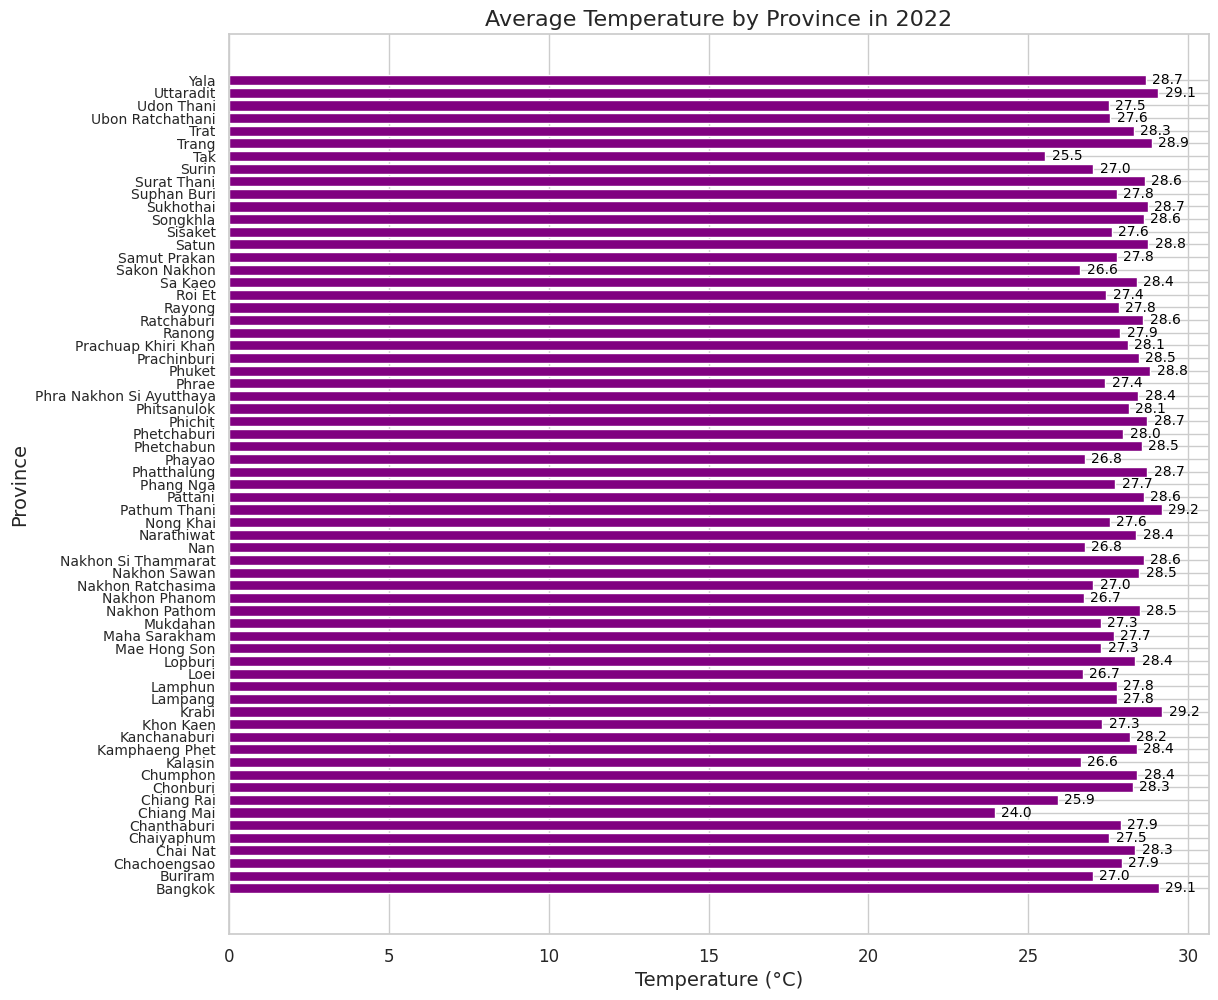

In [ ]:
# คำนวณค่าอุณหภูมิสูงสุดและต่ำสุดเฉลี่ยของแต่ละจังหวัด
avg_temp_by_province = temp_65_onehot.groupby('province')[['Tmax', 'Tmin']].mean()

# คำนวณค่าอุณหภูมิเฉลี่ยเดียวสำหรับแต่ละจังหวัด (ค่าเฉลี่ยของ Tmax และ Tmin)
avg_temp_by_province['Avg_Temperature'] = avg_temp_by_province[['Tmax', 'Tmin']].mean(axis=1)

# สร้างกราฟแท่งแนวนอน (horizontal bar chart)
plt.figure(figsize=(14, 10))  # เพิ่มขนาดของกราฟให้กว้างขึ้น

# กราฟแท่งแสดงค่าอุณหภูมิเฉลี่ย
bars = plt.barh(avg_temp_by_province.index, avg_temp_by_province['Avg_Temperature'], color='purple')

# เพิ่มเลขกำกับบนแท่งกราฟ
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', ha='left', fontsize=10, color='black')

# ปรับแต่งกราฟ
plt.title('Average Temperature by Province in 2022', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# ปรับการแสดงผลชื่อจังหวัดให้อ่านง่ายขึ้น
plt.yticks(rotation=0)  # กำหนดให้ชื่อจังหวัดตั้งตรง

# ใช้ tight_layout และ adjust เพื่อให้กราฟดูดีขึ้น
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)  # เพิ่มระยะห่างจากขอบกราฟ

# แสดงกราฟ
plt.show()

# คุณภาพดิน 65

In [ ]:
# อ่านไฟล์
soil_65 = pd.read_csv('Soil65.csv')

# แสดงข้อมูล 5 แถวแรก
print(soil_65.head(5))

       date  province                           pH                       N  \
0  20220908    ลพบุรี   กรดเล็กน้อย (pH 6.1 - 6.5)         ไม่ได้วิเคราะห์   
1  20220309  จันทบุรี   กรดเล็กน้อย (pH 6.1 - 6.5)  ปานกลาง (1.51 - 2.50%)   
2  20220309  จันทบุรี        กรดจัด (pH 5.1 - 5.5)  ปานกลาง (1.51 - 2.50%)   
3  20220309  จันทบุรี        กรดจัด (pH 5.1 - 5.5)  ปานกลาง (1.51 - 2.50%)   
4  20220511    ลพบุรี  ด่างเล็กน้อย (pH 7.4 - 7.8)  ปานกลาง (1.51 - 2.50%)   

                           P                       K  
0            ไม่ได้วิเคราะห์         ไม่ได้วิเคราะห์  
1      สูงมาก (> 45 มก./กก.)  สูงมาก (> 120 มก./กก.)  
2      สูงมาก (> 45 มก./กก.)   ต่ำ (30 - 60 มก./กก.)  
3      สูงมาก (> 45 มก./กก.)  สูงมาก (> 120 มก./กก.)  
4  ปานกลาง (11 - 15 มก./กก.)  สูง (91 - 120 มก./กก.)  


In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(soil_65.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2607 non-null   int64 
 1   province  2607 non-null   object
 2   pH        2607 non-null   object
 3   N         2607 non-null   object
 4   P         2607 non-null   object
 5   K         2607 non-null   object
dtypes: int64(1), object(5)
memory usage: 122.3+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(soil_65.describe())

               date
count  2.607000e+03
mean   2.022064e+07
std    2.593263e+02
min    2.022010e+07
25%    2.022041e+07
50%    2.022063e+07
75%    2.022083e+07
max    2.022122e+07


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(soil_65.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
date         int64
province    object
pH          object
N           object
P           object
K           object
dtype: object


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {soil_65.shape[0]}")
print(f"จำนวนคอลัมน์: {soil_65.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 2607
จำนวนคอลัมน์: 6


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(soil_65.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['date', 'province', 'pH', 'N', 'P', 'K']


In [ ]:
#ดูค่าที่ไม่ซ้ำในแต่ละคอลัมน์
for col in soil_65.columns:
    print(f"🔹 คอลัมน์: {col}")
    print(soil_65[col].unique())  # แสดงค่าที่ไม่ซ้ำกันทั้งหมด
    print("-" * 50)

🔹 คอลัมน์: date
[20220908 20220309 20220511 20220502 20220512 20220517 20220816 20220602
 20220607 20220609 20220815 20220321 20220822 20220323 20220403 20220408
 20220601 20220819 20220829 20220905 20220316 20220410 20220818 20220214
 20220431 20220501 20220810 20220429 20220907 20220725 20220420 20220722
 20220215 20220322 20221007 20220209 20220902 20220317 20220128 20220224
 20220314 20220315 20220615 20220205 20220621 20220131 20220202 20220503
 20220909 20220427 20220218 20220328 20220506 20220416 20220518 20220510
 20220203 20220830 20220330 20220509 20220310 20220606 20220324 20220325
 20220308 20220613 20220929 20220405 20220401 20220831 20220411 20220817
 20220824 20220201 20220623 20220525 20220505 20220715 20220404 20220711
 20220912 20220331 20220407 20220705 20220901 20220217 20220617 20220720
 20220616 20220526 20220414 20220417 20220630 20220921 20220806 20220910
 20220802 20220808 20220820 20220930 20220610 20220807 20220719 20220920
 20220923 20220611 20220418 2022061

In [ ]:
# Dictionary mapping จากภาษาไทยเป็นภาษาอังกฤษ
province_mapping = {
    'ลพบุรี': 'Lopburi', 'จันทบุรี': 'Chanthaburi', 'นครนายก': 'Nakhon Nayok',
    'นครราชสีมา': 'Nakhon Ratchasima', 'สระบุรี': 'Saraburi', 'ฉะเชิงเทรา': 'Chachoengsao',
    'ตราด': 'Trat', 'ปราจีนบุรี': 'Prachinburi', 'ระยอง': 'Rayong', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'ชลบุรี': 'Chonburi', 'สุรินทร์': 'Surin', 'นนทบุรี': 'Nonthaburi', 'ปทุมธานี': 'Pathum Thani',
    'สิงห์บุรี': 'Singburi', 'อำนาจเจริญ': 'Amnat Charoen', 'อ่างทอง': 'Ang Thong', 'หนองคาย': 'Nong Khai',
    'แม่ฮ่องสอน': 'Mae Hong Son', 'ลำปาง': 'Lampang', 'พิษณุโลก': 'Phitsanulok', 'เพชรบูรณ์': 'Phetchabun',
    'พิจิตร': 'Phichit', 'นครสวรรค์': 'Nakhon Sawan', 'นครปฐม': 'Nakhon Pathom', 'กาฬสินธุ์': 'Kalasin',
    'สุราษฎร์ธานี': 'Surat Thani', 'กำแพงเพชร': 'Kamphaeng Phet', 'กระบี่': 'Krabi', 'นครพนม': 'Nakhon Phanom',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat', 'กาญจนบุรี': 'Kanchanaburi', 'ภูเก็ต': 'Phuket', 'สงขลา': 'Songkhla',
    'ชุมพร': 'Chumphon', 'สตูล': 'Satun', 'นราธิวาส': 'Narathiwat', 'ตรัง': 'Trang', 'ยะลา': 'Yala', 'ปัตตานี': 'Pattani'
}

# แปลงชื่อจังหวัดในคอลัมน์ 'province' โดยตรง
soil_65['province'] = soil_65['province'].map(province_mapping)

# แสดงผลลัพธ์ที่เปลี่ยนชื่อจังหวัด
print(soil_65[['province']].head())

      province
0      Lopburi
1  Chanthaburi
2  Chanthaburi
3  Chanthaburi
4      Lopburi


In [ ]:
translations = {
    'pH': {
        'กรดเล็กน้อย (pH 6.1 - 6.5)': 'pH: Slightly Acidic',
        'กรดจัด (pH 5.1 - 5.5)': 'pH: Acidic',
        'ด่างเล็กน้อย (pH 7.4 - 7.8)': 'pH: Slightly Alkaline',
        'ด่างปานกลาง (pH 7.9 - 8.4)': 'pH: Moderately Alkaline',
        'กรดจัดมาก (pH 4.5 - 5.0)': 'pH: Highly Acidic',
        'เป็นกลาง (pH 6.6 - 7.3)': 'pH: Neutral',
        'กรดรุนแรงมาก (pH 3.5 - 4.4)': 'pH: Very Strongly Acidic',
        'กรดปานกลาง (pH 5.6 - 6.0)': 'pH: Moderately Acidic',
        'กรดรุนแรงที่สุด (pH < 3.5)': 'pH: Extremely Acidic',
        'ด่างจัด (pH 8.5 - 9.0)': 'pH: Strongly Alkaline',
        'ไม่ได้วิเคราะห์': 'pH: Not Analyzed'
    },
    'N': {
        'ไม่ได้วิเคราะห์': 'N: Not Analyzed',
        'ปานกลาง (1.51 - 2.50%)': 'N: Moderate',
        'ค่อนข้างสูง (2.51 - 3.50%)': 'N: Fairly High',
        'สูง (3.51 - 4.50%)': 'N: High',
        'ต่ำ (0.05 - 1.00%)': 'N: Low',
        'ค่อนข้างต่ำ (1.01 - 1.50%)': 'N: Fairly Low',
        'ต่ำมาก (< 0.05%)': 'N: Very Low',
        'สูงมาก (> 4.50%)': 'N: Very High'
    },
    'P': {
        'ไม่ได้วิเคราะห์': 'P: Not Analyzed',
        'สูงมาก (> 45 มก./กก.)': 'P: Very High',
        'ปานกลาง (11 - 15 มก./กก.)': 'P: Moderate',
        'สูง (16 - 45 มก./กก.)': 'P: High',
        'ต่ำ (3 - 10 มก./กก.)': 'P: Low',
        'ต่ำมาก (< 3 มก./กก.)': 'P: Very Low'
    },
    'K': {
        'ไม่ได้วิเคราะห์': 'K: Not Analyzed',
        'สูงมาก (> 120 มก./กก.)': 'K: Very High',
        'ต่ำ (30 - 60 มก./กก.)': 'K: Low',
        'สูง (91 - 120 มก./กก.)': 'K: High',
        'ปานกลาง (61 - 90 มก./กก.)': 'K: Moderate',
        'ต่ำมาก (0 - 30 มก./กก.)': 'K: Very Low'
    }
}

soil_65.update(soil_65[['pH', 'N', 'P', 'K']].apply(lambda col: col.map(translations[col.name])))

print(soil_65[['pH', 'N', 'P', 'K']].head())

                      pH                N                P                K
0    pH: Slightly Acidic  N: Not Analyzed  P: Not Analyzed  K: Not Analyzed
1    pH: Slightly Acidic      N: Moderate     P: Very High     K: Very High
2             pH: Acidic      N: Moderate     P: Very High           K: Low
3             pH: Acidic      N: Moderate     P: Very High     K: Very High
4  pH: Slightly Alkaline      N: Moderate      P: Moderate          K: High


# แผนภูมิวงกลมดูค่าดินและธาตุในดิน


Soil pH Distribution in 2022 Percentages:
pH: Acidic: 30.23%
pH: Highly Acidic: 18.41%
pH: Very Strongly Acidic: 12.77%
pH: Slightly Acidic: 12.20%
pH: Moderately Acidic: 9.36%
pH: Slightly Alkaline: 7.17%
pH: Neutral: 6.83%
pH: Moderately Alkaline: 1.88%
pH: Not Analyzed: 0.65%
pH: Extremely Acidic: 0.38%
pH: Strongly Alkaline: 0.12%


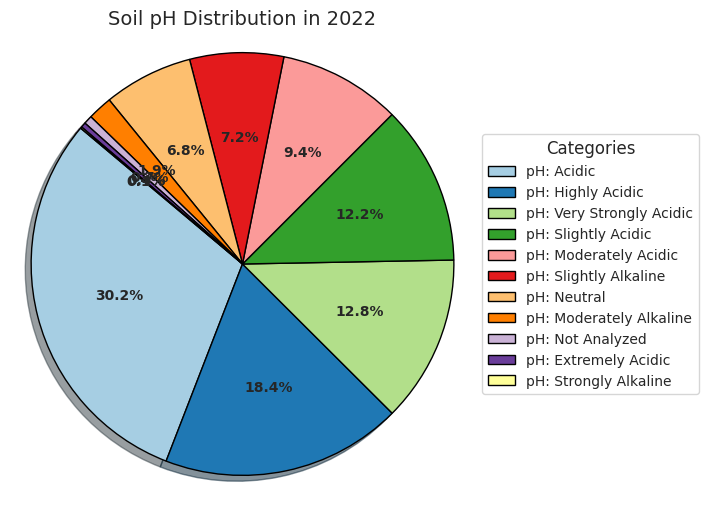

In [ ]:
import matplotlib.pyplot as plt

# ฟังก์ชันสร้าง Pie Chart พร้อมแสดงเปอร์เซ็นต์ข้างนอก และแสดงสีพร้อมคำอธิบาย
def plot_pie_chart_with_percent_and_legend(column, title):
    value_counts = soil_65[column].value_counts()
    percentages = value_counts / value_counts.sum() * 100  # คำนวณเปอร์เซ็นต์
    plt.figure(figsize=(6, 6))

    # สร้าง Pie Chart โดยใช้เปอร์เซ็นต์ที่คำนวณ
    def autopct_function(pct, allvalues):
        absolute = round(pct / 100.*sum(allvalues), 1)
        return f"{pct:.1f}%"  # แสดงเฉพาะเปอร์เซ็นต์

    # สร้าง Pie Chart โดยให้ค่าเปอร์เซ็นต์อยู่ข้างนอก
    wedges, texts, autotexts = plt.pie(value_counts,
                                        labels=None,  # ไม่แสดง labels ในกราฟ
                                        autopct=lambda pct: autopct_function(pct, value_counts),
                                        startangle=140,
                                        colors=plt.cm.Paired.colors,
                                        labeldistance=1.4,  # เพิ่มระยะห่างระหว่างข้อความและกราฟ
                                        textprops={'fontsize': 10},  # ปรับขนาดฟอนต์ของข้อความในกราฟ
                                        shadow=True,  # เพิ่มเงาให้กราฟ
                                        wedgeprops={'edgecolor': 'black'})  # เพิ่มเส้นขอบให้แต่ละส่วน

    # ปรับตำแหน่งของตัวหนังสือที่แสดงผลเปอร์เซ็นต์
    for autotext in autotexts:
        autotext.set(size=10, weight='bold')  # ปรับขนาดและน้ำหนักตัวอักษร

    # สร้าง Legend ที่แสดงสีและค่าแต่ละประเภท
    plt.legend(wedges, value_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

    plt.title(title, fontsize=14)
    plt.axis('equal')  # ให้เป็นวงกลม

    # แสดงผลเปอร์เซ็นต์ในเอาท์พุต (Console)
    print(f"\n{title} Percentages:")
    for i, percentage in enumerate(percentages):
        print(f"{value_counts.index[i]}: {percentage:.2f}%")

    plt.show()

# แสดง Pie Chart พร้อมเปอร์เซ็นต์ข้างนอกและแสดงสีพร้อมคำอธิบายสำหรับคอลัมน์ pH
plot_pie_chart_with_percent_and_legend('pH', 'Soil pH Distribution in 2022')


Nitrogen (N) Distribution in 2022 Percentages:
N: Moderate: 27.66%
N: Low: 18.80%
N: Fairly Low: 15.46%
N: Fairly High: 10.36%
N: Very Low: 8.78%
N: Not Analyzed: 8.21%
N: High: 7.10%
N: Very High: 3.64%


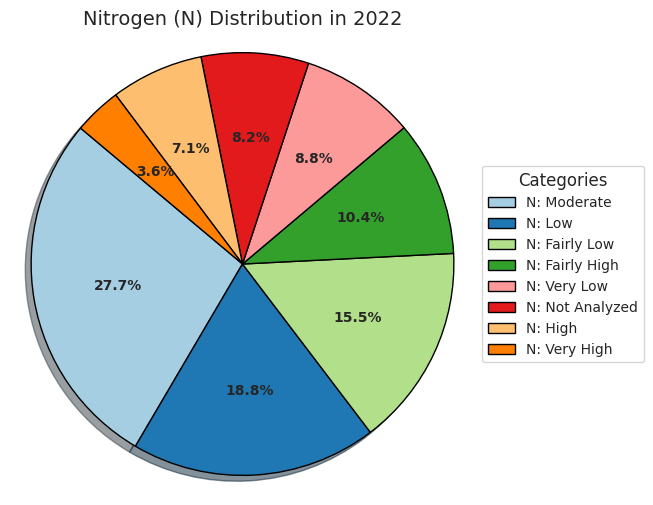

In [ ]:
plot_pie_chart_with_percent_and_legend('N', 'Nitrogen (N) Distribution in 2022')


Phosphorus (P) Distribution in 2022 Percentages:
P: Very Low: 28.46%
P: Low: 27.69%
P: High: 15.07%
P: Very High: 13.35%
P: Moderate: 12.24%
P: Not Analyzed: 3.18%


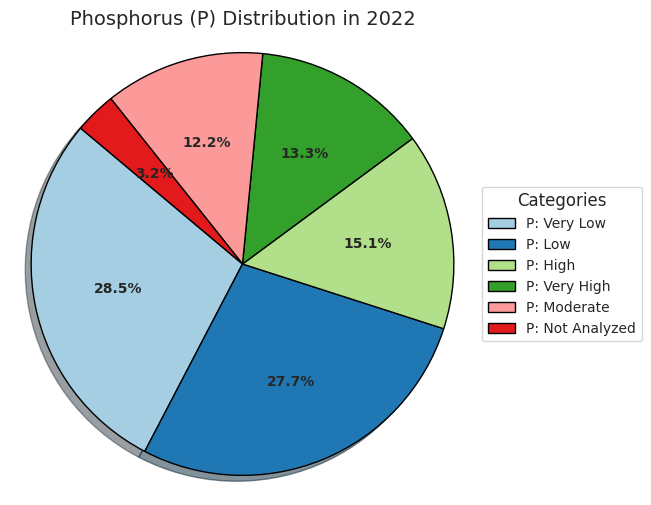

In [ ]:
plot_pie_chart_with_percent_and_legend('P', 'Phosphorus (P) Distribution in 2022')


Potassium (K) Distribution in 2022 Percentages:
K: Low: 30.19%
K: Very Low: 20.29%
K: Moderate: 19.22%
K: Very High: 16.80%
K: High: 10.32%
K: Not Analyzed: 3.18%


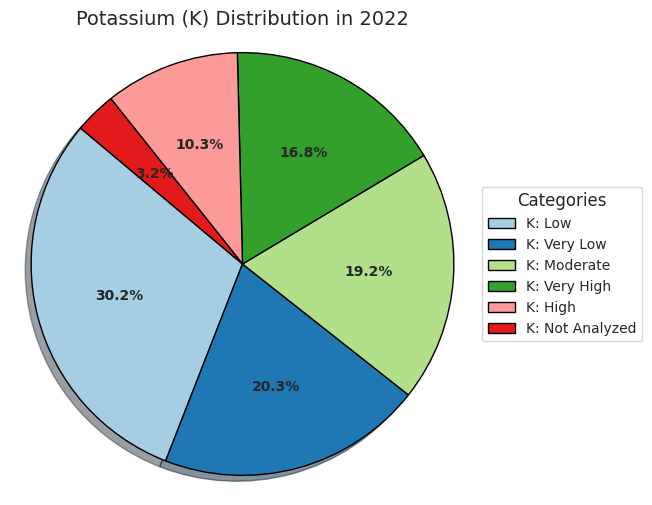

In [ ]:
plot_pie_chart_with_percent_and_legend('K', 'Potassium (K) Distribution in 2022')

# ทำ One-Hot Encoding ของ 'date','pH', 'N', 'P', 'K'

In [ ]:
soil_65_onehot = pd.get_dummies(soil_65, columns=['date','pH', 'N', 'P', 'K'], dtype=int)

In [ ]:
soil_65_onehot

province  date_20220104  date_20220111  date_20220119  date_20220121  \
0         Lopburi              0              0              0              0   
1     Chanthaburi              0              0              0              0   
2     Chanthaburi              0              0              0              0   
3     Chanthaburi              0              0              0              0   
4         Lopburi              0              0              0              0   
...           ...            ...            ...            ...            ...   
2602         Yala              0              0              0              0   
2603         Yala              0              0              0              0   
2604         Yala              0              0              0              0   
2605         Yala              0              0              0              0   
2606       Phuket              0              0              0              0   

      date_20220127  date_20220128  date_20220131  date_20220201  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2602              0              0              0              0   
2603              0              0              0              0   
2604              0              0              0              0   
2605              0              0              0              0   
2606              0              0              0              0   

      date_20220202  ...  P_P: Moderate  P_P: Not Analyzed  P_P: Very High  \
0                 0  ...              0                  1               0   
1                 0  ...              0                  0               1   
2                 0  ...              0                  0               1   
3                 0  ...              0                  0               1   
4                 0  ...              1                  0               0   
...             ...  ...            ...                ...             ...   
2602              0  ...              0                  0               0   
2603              0  ...              0                  0               0   
2604              0  ...              0                  0               1   
2605              0  ...              1                  0               0   
2606              0  ...              0                  0               0   

      P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  K_K: Not Analyzed  \
0                 0          0         0              0                  1   
1                 0          0         0              0                  0   
2                 0          0         1              0                  0   
3                 0          0         0              0                  0   
4                 0          1         0              0                  0   
...             ...        ...       ...            ...                ...   
2602              0          0         0              1                  0   
2603              1          1         0              0                  0   
2604              0          0         0              0                  0   
2605              0          1         0              0                  0   
2606              0          0         0              0                  0   

      K_K: Very High  K_K: Very Low  
0                  0              0  
1                  1              0  
2                  0              0  
3                  1              0  
4                  0              0  
...              ...            ...  
2602               0              0  
2603               0              0  
260

In [ ]:
print(soil_65_onehot.isnull().sum())

province             0
date_20220104        0
date_20220111        0
date_20220119        0
date_20220121        0
                    ..
K_K: Low             0
K_K: Moderate        0
K_K: Not Analyzed    0
K_K: Very High       0
K_K: Very Low        0
Length: 262, dtype: int64


In [ ]:
print(soil_65_onehot.duplicated().sum())

523


In [ ]:
# ลบแถวที่ซ้ำทั้งหมดในทุกคอลัมน์ โดยเก็บแถวแรกที่ซ้ำไว้
soil_65_onehot = soil_65_onehot.drop_duplicates(keep='first')

# เช็คผลหลังจากลบแถวที่ซ้ำ
print(soil_65_onehot.duplicated().sum())

0


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(soil_65_onehot.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['province', 'date_20220104', 'date_20220111', 'date_20220119', 'date_20220121', 'date_20220127', 'date_20220128', 'date_20220131', 'date_20220201', 'date_20220202', 'date_20220203', 'date_20220205', 'date_20220208', 'date_20220209', 'date_20220210', 'date_20220211', 'date_20220213', 'date_20220214', 'date_20220215', 'date_20220217', 'date_20220218', 'date_20220221', 'date_20220222', 'date_20220223', 'date_20220224', 'date_20220225', 'date_20220226', 'date_20220227', 'date_20220228', 'date_20220303', 'date_20220304', 'date_20220307', 'date_20220308', 'date_20220309', 'date_20220310', 'date_20220311', 'date_20220313', 'date_20220314', 'date_20220315', 'date_20220316', 'date_20220317', 'date_20220320', 'date_20220321', 'date_20220322', 'date_20220323', 'date_20220324', 'date_20220325', 'date_20220326', 'date_20220327', 'date_20220328', 'date_20220329', 'date_20220330', 'date_20220331', 'date_20220401', 'date_20220403', 'date_20220404', 'date_20220405', 'da

In [ ]:
soil_65_onehot.dtypes

province             object
date_20220104         int64
date_20220111         int64
date_20220119         int64
date_20220121         int64
                      ...  
K_K: Low              int64
K_K: Moderate         int64
K_K: Not Analyzed     int64
K_K: Very High        int64
K_K: Very Low         int64
Length: 262, dtype: object

In [ ]:
#soil_65_onehot.to_csv('soil_65_clean.csv', index=False)

# กราฟแสดงค่าไนโตรเจนสูงมากในดิน ของแต่ะจังหวัด 65

<ipython-input-71-30e03dc626dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='province', y='N_N: Very High', data=data, palette='viridis')


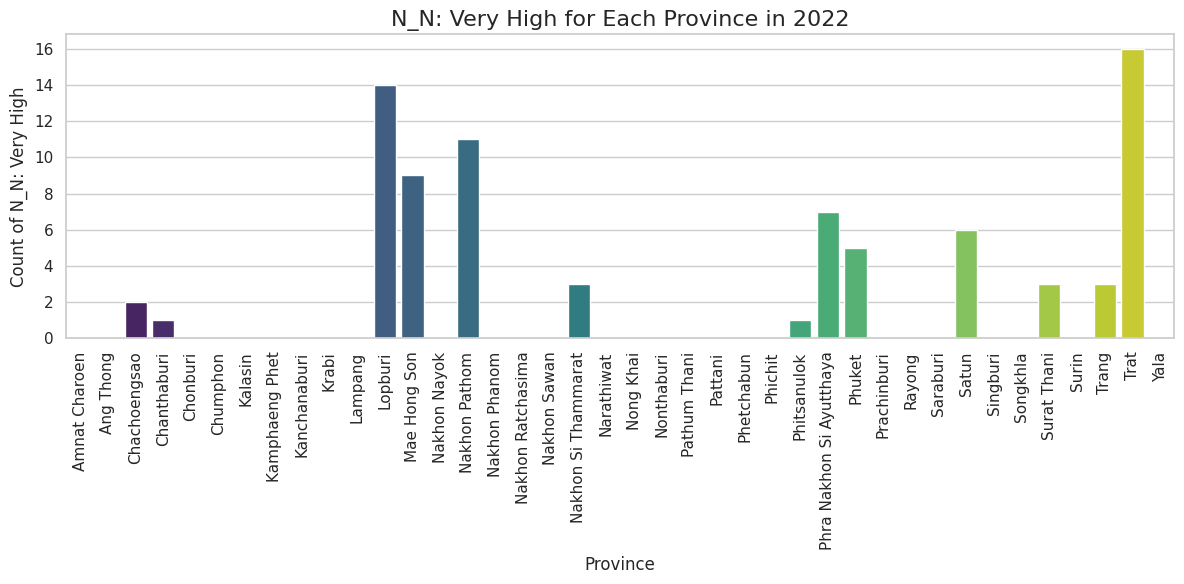

In [ ]:
# เลือกข้อมูลที่เกี่ยวข้องกับ 'N_N: Very High'
data = soil_65_onehot.groupby('province')['N_N: Very High'].sum().reset_index()

# สร้างกราฟแท่ง
plt.figure(figsize=(12, 6))
sns.barplot(x='province', y='N_N: Very High', data=data, palette='viridis')

# ตั้งค่าชื่อกราฟและแกน
plt.title("N_N: Very High for Each Province in 2022", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Count of N_N: Very High", fontsize=12)
plt.xticks(rotation=90)  # หมุนชื่อจังหวัดเพื่อให้อ่านง่าย
plt.tight_layout()  # ทำให้กราฟกระชับ

# แสดงกราฟ
plt.show()

# ปริมาณการผลิตข้าว/ผลผลิตข้าว ปี 65

In [ ]:
#อ่านไฟล์
rice_yield_66 = pd.read_csv('Yield66.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(rice_yield_66.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         70 non-null     int64  
 1   subcommod    70 non-null     object 
 2   province     70 non-null     object 
 3   yield(tons)  70 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(rice_yield_66.describe())

         year    yield(tons)
count    70.0      70.000000
mean   2566.0   98825.306857
std       0.0  132740.098324
min    2566.0       3.480000
25%    2566.0    8377.500000
50%    2566.0   38924.000000
75%    2566.0  141115.250000
max    2566.0  638586.000000


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {rice_yield_66.shape[0]}")
print(f"จำนวนคอลัมน์: {rice_yield_66.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 70
จำนวนคอลัมน์: 4


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(rice_yield_66.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year             int64
subcommod       object
province        object
yield(tons)    float64
dtype: object


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(rice_yield_66.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'subcommod', 'province', 'yield(tons)']


In [ ]:
# Replace the year 2565 with 2022 in the 'year' column
rice_yield_66['year'] = rice_yield_66['year'].replace(2566, 2023)

# Verify the change
print(rice_yield_66[['province', 'year']].head())

    province  year
0   เชียงราย  2023
1      พะเยา  2023
2      ลำปาง  2023
3      ลำพูน  2023
4  เชียงใหม่  2023


In [ ]:
# สร้าง dictionary แปลงชื่อจังหวัด
province_mapping = {
    'เชียงราย': 'Chiang Rai', 'พะเยา': 'Phayao', 'ลำปาง': 'Lampang', 'ลำพูน': 'Lamphun', 'เชียงใหม่': 'Chiang Mai',
    'แม่ฮ่องสอน': 'Mae Hong Son', 'ตาก': 'Tak', 'กำแพงเพชร': 'Kamphaeng Phet', 'สุโขทัย': 'Sukhothai', 'แพร่': 'Phrae',
    'น่าน': 'Nan', 'อุตรดิตถ์': 'Uttaradit', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'นครสวรรค์': 'Nakhon Sawan',
    'อุทัยธานี': 'Uthai Thani', 'เพชรบูรณ์': 'Phetchabun', 'เลย': 'Loei', 'หนองบัวลำภู': 'Nong Bua Lamphu', 'อุดรธานี': 'Udon Thani',
    'หนองคาย': 'Nong Khai', 'บึงกาฬ': 'Bueng Kan', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom', 'มุกดาหาร': 'Mukdahan',
    'ยโสธร': 'Yasothon', 'อำนาจเจริญ': 'Amnat Charoen', 'อุบลราชธานี': 'Ubon Ratchathani', 'ศรีสะเกษ': 'Si Sa Ket', 'สุรินทร์': 'Surin',
    'บุรีรัมย์': 'Buri Ram', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'ขอนแก่น': 'Khon Kaen',
    'ชัยภูมิ': 'Chaiyaphum', 'นครราชสีมา': 'Nakhon Ratchasima', 'สระบุรี': 'Saraburi', 'ลพบุรี': 'Lop Buri', 'ชัยนาท': 'Chai Nat',
    'สิงห์บุรี': 'Sing Buri', 'สุพรรณบุรี': 'Suphan Buri', 'อ่างทอง': 'Ang Thong', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'นนทบุรี': 'Nonthaburi', 'กรุงเทพมหานคร': 'Bangkok', 'ปทุมธานี': 'Pathum Thani', 'นครนายก': 'Nakhon Nayok', 'ปราจีนบุรี': 'Prachin Buri',
    'ฉะเชิงเทรา': 'Chachoengsao', 'สระแก้ว': 'Sa Kaeo', 'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ระยอง': 'Rayong',
    'ชลบุรี': 'Chon Buri', 'สมุทรปราการ': 'Samut Prakan', 'สมุทรสาคร': 'Samut Sakhon', 'นครปฐม': 'Nakhon Pathom',
    'กาญจนบุรี': 'Kanchanaburi', 'ราชบุรี': 'Ratchaburi', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan', 'ชุมพร': 'Chumphon', 'ระนอง': 'Ranong', 'สุราษฎร์ธานี': 'Surat Thani',
    'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'กระบี่': 'Krabi', 'ตรัง': 'Trang', 'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'พัทลุง': 'Phatthalung', 'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# แปลงชื่อจังหวัดในคอลัมน์ province
rice_yield_66['province'] = rice_yield_66['province'].map(province_mapping)

# ตรวจสอบผลลัพธ์
print(rice_yield_66[['province']].head())

     province
0  Chiang Rai
1      Phayao
2     Lampang
3     Lamphun
4  Chiang Mai


# ทำ One-Hot Encoding ของ subcommod ข้าวนาปี นาปรัง และ ปี 66

In [ ]:
rice_yield_66_onehot = pd.get_dummies(rice_yield_66, columns=['subcommod','year'], dtype=int)

In [ ]:
rice_yield_66_onehot

province  yield(tons)  subcommod_ข้าวนาปรัง  year_2023
0            Chiang Rai    253671.00                     1          1
1                Phayao     38280.00                     1          1
2               Lampang     20856.00                     1          1
3               Lamphun     11621.00                     1          1
4            Chiang Mai     77613.00                     1          1
..                  ...          ...                   ...        ...
65                Trang         3.48                     1          1
66  Nakhon Si Thammarat      2016.00                     1          1
67          Phatthalung     12017.00                     1          1
68             Songkhla     21634.00                     1          1
69           Narathiwat     10976.00                     1          1

[70 rows x 4 columns]

In [ ]:
# ตรวจสอบค่าว่าง
print(rice_yield_66_onehot.isnull().sum())

province                0
yield(tons)             0
subcommod_ข้าวนาปรัง    0
year_2023               0
dtype: int64


In [ ]:
print(rice_yield_66.duplicated().sum())

0


In [ ]:
print(rice_yield_66_onehot.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'year_2023'], dtype='object')


In [ ]:
#rice_yield_66_onehot.to_csv('rice_yield_66_clean.csv', index=False)

# กราฟวงกลมแสดงเปอร์เซ็นต์ในการทำนาปรังในปี2566

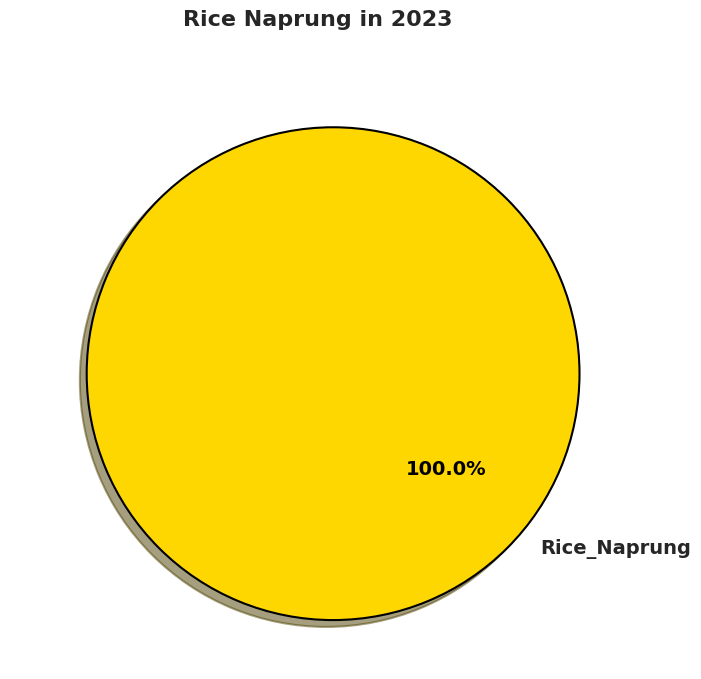

In [ ]:
# รวมจำนวนของข้าวนาปรังในปี 2023
rice_counts = rice_yield_66_onehot[['subcommod_ข้าวนาปรัง']].sum()

# ปรับโทนสีใหม่ให้ดูสบายตา
colors = ['#FFD700']  # สีทองสำหรับข้าวนาปรัง
explode = (0.08,)  # แยกข้าวนาปรังออกมาเล็กน้อย

# สร้างกราฟแบบ Pie Chart พร้อมปรับแต่ง
fig, ax = plt.subplots(figsize=(8, 8))  # ปรับขนาดให้เป็นสี่เหลี่ยมจัตุรัสเพื่อให้เป็นวงกลมสมบูรณ์
wedges, texts, autotexts = ax.pie(
    rice_counts, labels=['Rice_Naprung'], autopct='%1.1f%%',
    colors=colors, explode=explode, startangle=140, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True}
)

# ปรับขนาดตัวอักษรให้ชัดเจนขึ้น
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

# ตั้งค่าชื่อเรื่องให้ดูโดดเด่น
plt.title("Rice Naprung in 2023", fontsize=16, fontweight='bold', pad=20)

# แสดงกราฟ
plt.show()

# กราฟเส้นแสดงผลผลิตข้าวในแต่ละจังหวัดในปี 2566

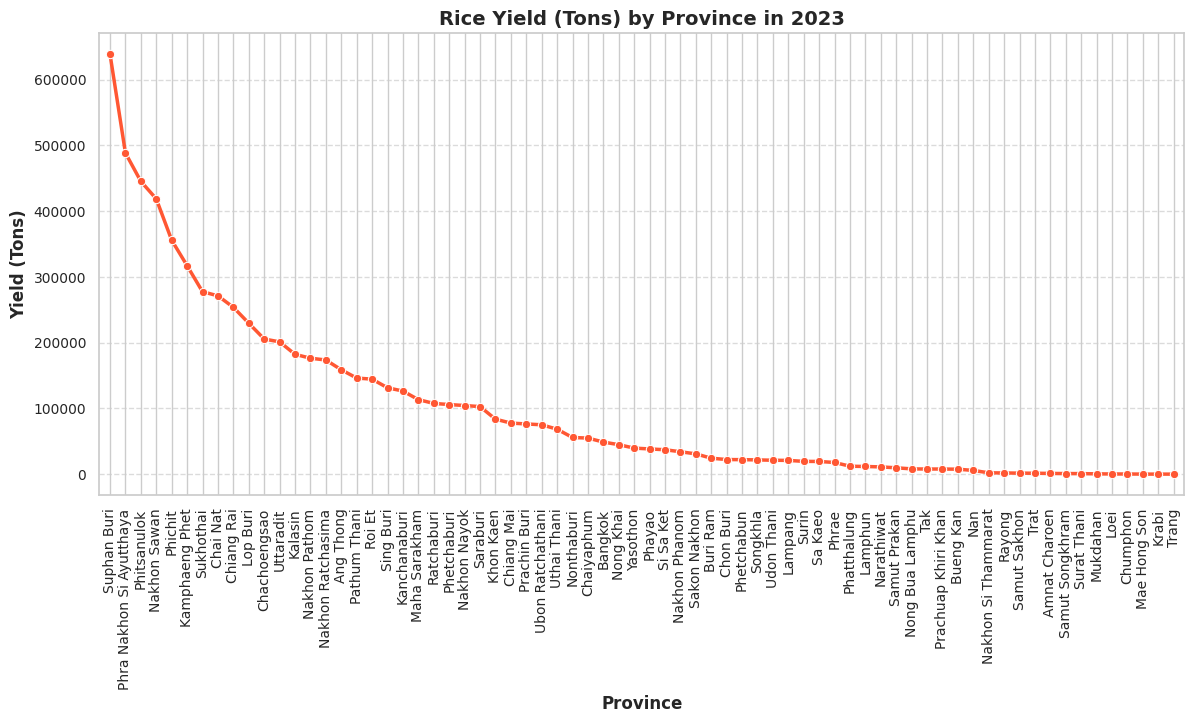

In [ ]:
# เรียงลำดับจากมากไปน้อย
rice_yield_66_onehot = rice_yield_66_onehot.sort_values(by='yield(tons)', ascending=False)

# กำหนดสีและสไตล์
sns.set(style="whitegrid")

# สร้างกราฟเส้น
plt.figure(figsize=(14, 6))  # ปรับขนาดให้ยาวขึ้น
sns.lineplot(x='province', y='yield(tons)', data=rice_yield_66_onehot, marker='o', color='#FF5733', linewidth=2.5)

# ปรับแต่งกราฟ
plt.xticks(rotation=90, fontsize=10)  # หมุนชื่อจังหวัดให้เป็นแนวดิ่ง
plt.yticks(fontsize=10)
plt.xlabel("Province", fontsize=12, fontweight='bold')
plt.ylabel("Yield (Tons)", fontsize=12, fontweight='bold')
plt.title("Rice Yield (Tons) by Province in 2023", fontsize=14, fontweight='bold')

# เพิ่มเส้น Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ปรับระยะห่างของชื่อจังหวัดให้ไม่ทับกัน
plt.gca().margins(x=0.01)  # ลด margin เพื่อให้พอดีกับข้อมูล

# แสดงกราฟ
plt.show()

# ปริมาณฝนเชิงพื้นที่ ปี 66

In [ ]:
#อ่านไฟล์
rain_66 = pd.read_csv('rmax-rmin66.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(rain_66.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      924 non-null    int64  
 1   month     924 non-null    int64  
 2   province  924 non-null    object 
 3   MinRain   924 non-null    float64
 4   MaxRain   924 non-null    float64
 5   AvgRain   924 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 43.4+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(rain_66.describe())

         year       month     MinRain      MaxRain     AvgRain
count   924.0  924.000000  924.000000   924.000000  924.000000
mean   2023.0    6.500000   75.705000   166.813441  115.083193
std       0.0    3.453922   99.784064   177.016963  130.598008
min    2023.0    1.000000    0.000000     0.000000    0.000000
25%    2023.0    3.750000    3.442500    30.075000   13.383789
50%    2023.0    6.500000   37.570000   115.400002   73.069061
75%    2023.0    9.250000  111.625000   246.519997  167.980010
max    2023.0   12.000000  611.929993  1192.699951  756.013359


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {rain_66.shape[0]}")
print(f"จำนวนคอลัมน์: {rain_66.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 924
จำนวนคอลัมน์: 6


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(rain_66.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'month', 'province', 'MinRain', 'MaxRain', 'AvgRain']


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(rain_66.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year          int64
month         int64
province     object
MinRain     float64
MaxRain     float64
AvgRain     float64
dtype: object


In [ ]:
# Create a dictionary to map numeric months to English month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the values in the 'month' column using the dictionary
rain_66['month'] = rain_66['month'].map(month_map)

# Verify the change
print(rain_66[['month']].head())

     month
0  January
1  January
2  January
3  January
4  January


In [ ]:
province_map = {
    'กรุงเทพมหานคร': 'Bangkok', 'สมุทรปราการ': 'Samut Prakan', 'นนทบุรี': 'Nonthaburi', 'ปทุมธานี': 'Pathum Thani', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'อ่างทอง': 'Ang Thong', 'ลพบุรี': 'Lopburi', 'สิงห์บุรี': 'Sing Buri', 'ชัยนาท': 'Chai Nat', 'สระบุรี': 'Saraburi', 'ชลบุรี': 'Chonburi', 'ระยอง': 'Rayong',
    'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ฉะเชิงเทรา': 'Chachoengsao', 'ปราจีนบุรี': 'Prachinburi', 'นครนายก': 'Nakhon Nayok', 'สระแก้ว': 'Sa Kaeo',
    'นครราชสีมา': 'Nakhon Ratchasima', 'บุรีรัมย์': 'Buriram', 'สุรินทร์': 'Surin', 'ศรีสะเกษ': 'Sisaket', 'อุบลราชธานี': 'Ubon Ratchathani', 'ยโสธร': 'Yasothon',
    'ชัยภูมิ': 'Chaiyaphum', 'อำนาจเจริญ': 'Amnat Charoen', 'บึงกาฬ': 'Bueng Kan', 'หนองบัวลำภู': 'Nong Bua Lam Phu', 'ขอนแก่น': 'Khon Kaen', 'อุดรธานี': 'Udon Thani',
    'เลย': 'Loei', 'หนองคาย': 'Nong Khai', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom',
    'มุกดาหาร': 'Mukdahan', 'เชียงใหม่': 'Chiang Mai', 'ลำพูน': 'Lamphun', 'ลำปาง': 'Lampang', 'อุตรดิตถ์': 'Uttaradit', 'แพร่': 'Phrae', 'น่าน': 'Nan', 'พะเยา': 'Phayao',
    'เชียงราย': 'Chiang Rai', 'แม่ฮ่องสอน': 'Mae Hong Son', 'นครสวรรค์': 'Nakhon Sawan', 'อุทัยธานี': 'Uthai Thani', 'กำแพงเพชร': 'Kamphaeng Phet', 'ตาก': 'Tak',
    'สุโขทัย': 'Sukhothai', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'เพชรบูรณ์': 'Phetchabun', 'ราชบุรี': 'Ratchaburi', 'กาญจนบุรี': 'Kanchanaburi', 'สุพรรณบุรี': 'Suphan Buri',
    'นครปฐม': 'Nakhon Pathom', 'สมุทรสาคร': 'Samut Sakhon', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi', 'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat', 'กระบี่': 'Krabi', 'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'สุราษฎร์ธานี': 'Surat Thani', 'ระนอง': 'Ranong', 'ชุมพร': 'Chumphon',
    'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ตรัง': 'Trang', 'พัทลุง': 'Phatthalung', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# Replace the province names using the mapping dictionary
rain_66['province'] = rain_66['province'].replace(province_map)

# Verify the changes
print(rain_66[['province']].head())

                   province
0                   Bangkok
1              Samut Prakan
2                Nonthaburi
3              Pathum Thani
4  Phra Nakhon Si Ayutthaya


# ทำ One-Hot Encoding ของ เดือน และ ปี 66

In [ ]:
rain_66_onehot = pd.get_dummies(rain_66, columns=['month','year'], dtype=int)

In [ ]:
rain_66_onehot

province  MinRain  MaxRain     AvgRain  month_April  \
0                     Bangkok     0.00     5.90    0.920092            0   
1                Samut Prakan     0.00     5.90    1.155019            0   
2                  Nonthaburi     0.00     1.00    0.586304            0   
3                Pathum Thani     0.00     0.90    0.314432            0   
4    Phra Nakhon Si Ayutthaya     0.00     1.00    0.313568            0   
..                        ...      ...      ...         ...          ...   
919                     Trang    51.00   282.70  143.699752            0   
920               Phatthalung   183.85   456.92  343.611327            0   
921                   Pattani   336.71   714.23  477.252561            0   
922                      Yala   374.57   651.32  543.952577            0   
923                Narathiwat   578.31   791.26  670.661002            0   

     month_August  month_December  month_February  month_January  month_July  \
0               0               0               0              1           0   
1               0               0               0              1           0   
2               0               0               0              1           0   
3               0               0               0              1           0   
4               0               0               0              1           0   
..            ...             ...             ...            ...         ...   
919             0               1               0              0           0   
920             0               1               0              0           0   
921             0               1               0              0           0   
922             0               1               0              0           0   
923             0               1               0              0           0   

     month_June  month_March  month_May  month_November  month_October  \
0             0            0          0               0              0   
1             0            0          0               0              0   
2             0            0          0               0              0   
3             0            0          0               0              0   
4             0            0          0               0              0   
..          ...          ...        ...             ...            ...   
919           0            0          0               0              0   
920           0            0          0               0              0   
921           0            0          0               0              0   
922           0            0          0               0              0   
923           0            0          0               0              0   

     month_September  year_2023  
0                  0          1  
1                  0          1  
2                  0          1  
3                  0          1  
4                  0          1  
..               ...        ...  
919                0          1  
920                0          1  
921                0          1  
922                0          1  
923                0          1  

[924 rows x 17 columns]

In [ ]:
print(rain_66_onehot.isnull().sum())

province           0
MinRain            0
MaxRain            0
AvgRain            0
month_April        0
month_August       0
month_December     0
month_February     0
month_January      0
month_July         0
month_June         0
month_March        0
month_May          0
month_November     0
month_October      0
month_September    0
year_2023          0
dtype: int64


In [ ]:
print(rain_66_onehot.duplicated().sum())

0


In [ ]:
#rain_66_onehot.to_csv('(rain_66_clean.csv', index=False)

# กราฟแท่งแสดงความสัมพันธ์ปริมาณค่าฝนเฉลี่ยต่อเดือนปี 66

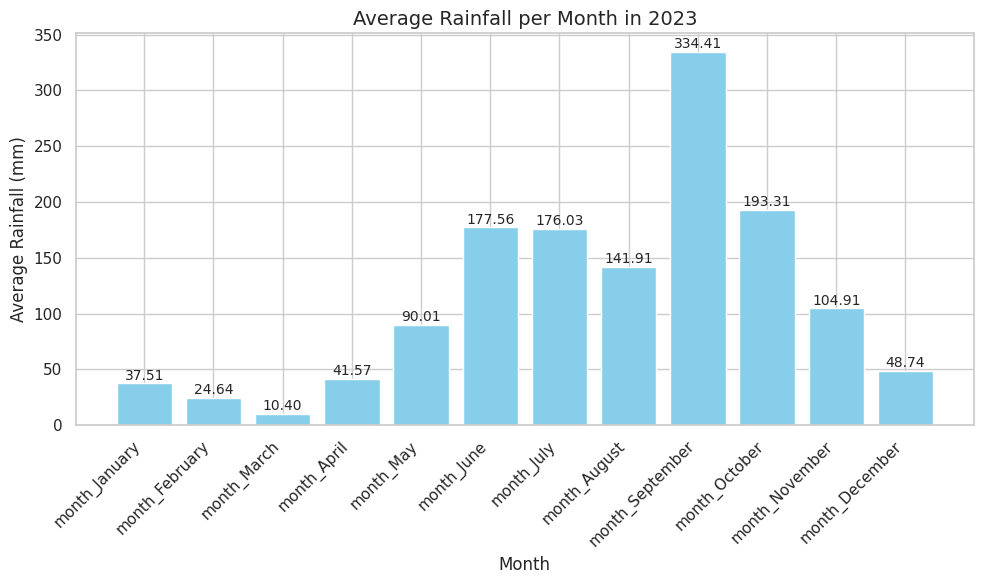

In [ ]:
# สร้าง DataFrame สำหรับแต่ละเดือนที่มีชื่อเดือนที่ต้องการ
months = ['month_January', 'month_February', 'month_March', 'month_April', 'month_May',
          'month_June', 'month_July', 'month_August', 'month_September', 'month_October',
          'month_November', 'month_December']

# คำนวณค่าเฉลี่ยของ AvgRain สำหรับแต่ละเดือน
avg_rain_per_month = [rain_66_onehot[month].dot(rain_66_onehot['AvgRain']) / rain_66_onehot[month].sum() for month in months]

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
bars = plt.bar(months, avg_rain_per_month, color='skyblue')

# เพิ่มค่าบนแท่งกราฟ
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# ปรับแต่งกราฟ
plt.title('Average Rainfall per Month in 2023', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# แสดงกราฟ
plt.show()

# กราฟแสดงความสัมพันธ์ระหว่างปริมาณน้ำฝนต่ำสุด-สูงสุดในแต่ละจังหวัด 66

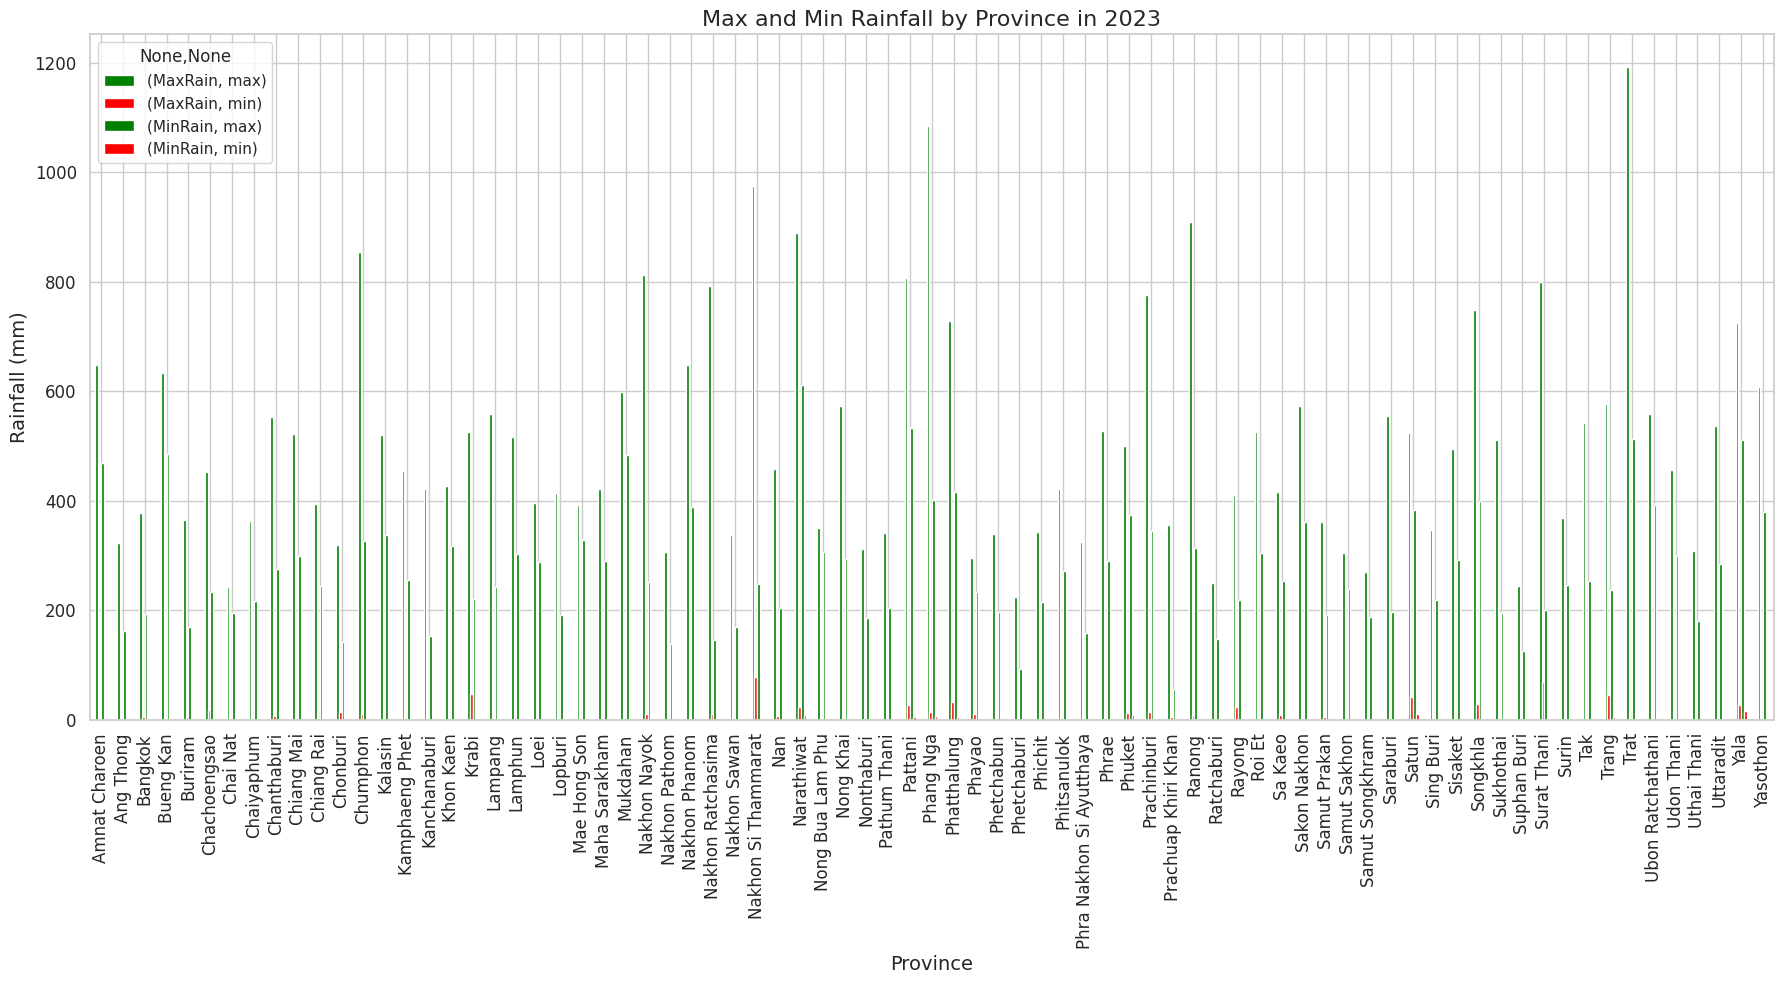

In [ ]:
# คำนวณค่า MaxRain และ MinRain สำหรับแต่ละจังหวัด
rain_by_province = rain_66_onehot.groupby('province')[['MaxRain', 'MinRain']].agg(['max', 'min'])

# สร้างกราฟแท่ง
rain_by_province.plot(kind='bar', figsize=(18, 10), color=['green', 'red'])

# ปรับแต่งกราฟ
plt.title('Max and Min Rainfall by Province in 2023', fontsize=16)  # เพิ่มขนาดฟอนต์ของชื่อกราฟ
plt.ylabel('Rainfall (mm)', fontsize=14)  # เพิ่มขนาดฟอนต์ของแกน Y
plt.xlabel('Province', fontsize=14)  # เพิ่มขนาดฟอนต์ของแกน X
plt.xticks(rotation=90, fontsize=12)  # ปรับการหมุนชื่อจังหวัดและขนาดฟอนต์
plt.yticks(fontsize=12)  # ขนาดฟอนต์ของตัวเลขในแกน Y
plt.tight_layout()  # ปรับขนาดกราฟให้เหมาะสม

# แสดงกราฟ
plt.show()

# อุณหภูมิสูงสุดและต่ำสุด ปี 66

In [ ]:
#อ่านไฟล์
temp_66 = pd.read_csv('tmax-tmin66.csv')

In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(temp_66.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      780 non-null    int64  
 1   month     780 non-null    int64  
 2   province  780 non-null    object 
 3   Tmax      778 non-null    float64
 4   Tmin      780 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.6+ KB
None


In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(temp_66.describe())

         year       month        Tmax        Tmin
count   780.0  780.000000  778.000000  780.000000
mean   2023.0    6.500000   36.589075   20.695513
std       0.0    3.454268    2.469781    4.159758
min    2023.0    1.000000   31.100000    7.600000
25%    2023.0    3.750000   34.800000   17.800000
50%    2023.0    6.500000   36.000000   22.650000
75%    2023.0    9.250000   37.800000   23.600000
max    2023.0   12.000000   44.600000   28.700000


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {temp_66.shape[0]}")
print(f"จำนวนคอลัมน์: {temp_66.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 780
จำนวนคอลัมน์: 5


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(temp_66.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['year', 'month', 'province', 'Tmax', 'Tmin']


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(temp_66.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
year          int64
month         int64
province     object
Tmax        float64
Tmin        float64
dtype: object


In [ ]:
# Create a dictionary to map numeric months to English month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace the values in the 'month' column using the dictionary
temp_66['month'] = temp_66['month'].map(month_map)

# Verify the change
print(temp_66[['month']].head())

     month
0  January
1  January
2  January
3  January
4  January


In [ ]:
province_map = {
    'กรุงเทพมหานคร': 'Bangkok', 'สมุทรปราการ': 'Samut Prakan', 'นนทบุรี': 'Nonthaburi', 'ปทุมธานี': 'Pathum Thani', 'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'อ่างทอง': 'Ang Thong', 'ลพบุรี': 'Lopburi', 'สิงห์บุรี': 'Sing Buri', 'ชัยนาท': 'Chai Nat', 'สระบุรี': 'Saraburi', 'ชลบุรี': 'Chonburi', 'ระยอง': 'Rayong',
    'จันทบุรี': 'Chanthaburi', 'ตราด': 'Trat', 'ฉะเชิงเทรา': 'Chachoengsao', 'ปราจีนบุรี': 'Prachinburi', 'นครนายก': 'Nakhon Nayok', 'สระแก้ว': 'Sa Kaeo',
    'นครราชสีมา': 'Nakhon Ratchasima', 'บุรีรัมย์': 'Buriram', 'สุรินทร์': 'Surin', 'ศรีสะเกษ': 'Sisaket', 'อุบลราชธานี': 'Ubon Ratchathani', 'ยโสธร': 'Yasothon',
    'ชัยภูมิ': 'Chaiyaphum', 'อำนาจเจริญ': 'Amnat Charoen', 'บึงกาฬ': 'Bueng Kan', 'หนองบัวลำภู': 'Nong Bua Lam Phu', 'ขอนแก่น': 'Khon Kaen', 'อุดรธานี': 'Udon Thani',
    'เลย': 'Loei', 'หนองคาย': 'Nong Khai', 'มหาสารคาม': 'Maha Sarakham', 'ร้อยเอ็ด': 'Roi Et', 'กาฬสินธุ์': 'Kalasin', 'สกลนคร': 'Sakon Nakhon', 'นครพนม': 'Nakhon Phanom',
    'มุกดาหาร': 'Mukdahan', 'เชียงใหม่': 'Chiang Mai', 'ลำพูน': 'Lamphun', 'ลำปาง': 'Lampang', 'อุตรดิตถ์': 'Uttaradit', 'แพร่': 'Phrae', 'น่าน': 'Nan', 'พะเยา': 'Phayao',
    'เชียงราย': 'Chiang Rai', 'แม่ฮ่องสอน': 'Mae Hong Son', 'นครสวรรค์': 'Nakhon Sawan', 'อุทัยธานี': 'Uthai Thani', 'กำแพงเพชร': 'Kamphaeng Phet', 'ตาก': 'Tak',
    'สุโขทัย': 'Sukhothai', 'พิษณุโลก': 'Phitsanulok', 'พิจิตร': 'Phichit', 'เพชรบูรณ์': 'Phetchabun', 'ราชบุรี': 'Ratchaburi', 'กาญจนบุรี': 'Kanchanaburi', 'สุพรรณบุรี': 'Suphan Buri',
    'นครปฐม': 'Nakhon Pathom', 'สมุทรสาคร': 'Samut Sakhon', 'สมุทรสงคราม': 'Samut Songkhram', 'เพชรบุรี': 'Phetchaburi', 'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat', 'กระบี่': 'Krabi', 'พังงา': 'Phang Nga', 'ภูเก็ต': 'Phuket', 'สุราษฎร์ธานี': 'Surat Thani', 'ระนอง': 'Ranong', 'ชุมพร': 'Chumphon',
    'สงขลา': 'Songkhla', 'สตูล': 'Satun', 'ตรัง': 'Trang', 'พัทลุง': 'Phatthalung', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'นราธิวาส': 'Narathiwat'
}

# Replace the province names using the mapping dictionary
temp_66['province'] = temp_66['province'].replace(province_map)

# Verify the changes
print(temp_66[['province']].head())

                   province
0                   Bangkok
1              Samut Prakan
2              Pathum Thani
3  Phra Nakhon Si Ayutthaya
4                   Lopburi


# ทำ One-Hot Encoding ของ เดือน และ ปี 66

In [ ]:
temp_66_onehot = pd.get_dummies(temp_66, columns=['month','year'], dtype=int)

In [ ]:
temp_66_onehot

province  Tmax  Tmin  month_April  month_August  \
0                     Bangkok  35.6  18.4            0             0   
1                Samut Prakan  32.0  17.5            0             0   
2                Pathum Thani  36.0  17.5            0             0   
3    Phra Nakhon Si Ayutthaya  35.4  14.5            0             0   
4                     Lopburi  35.4  13.3            0             0   
..                        ...   ...   ...          ...           ...   
775                     Trang  33.7  24.1            0             0   
776               Phatthalung  32.3  23.8            0             0   
777                   Pattani  33.3  23.2            0             0   
778                      Yala  33.4  23.2            0             0   
779                Narathiwat  32.8  22.7            0             0   

     month_December  month_February  month_January  month_July  month_June  \
0                 0               0              1           0           0   
1                 0               0              1           0           0   
2                 0               0              1           0           0   
3                 0               0              1           0           0   
4                 0               0              1           0           0   
..              ...             ...            ...         ...         ...   
775               1               0              0           0           0   
776               1               0              0           0           0   
777               1               0              0           0           0   
778               1               0              0           0           0   
779               1               0              0           0           0   

     month_March  month_May  month_November  month_October  month_September  \
0              0          0               0              0                0   
1              0          0               0              0                0   
2              0          0               0              0                0   
3              0          0               0              0                0   
4              0          0               0              0                0   
..           ...        ...             ...            ...              ...   
775            0          0               0              0                0   
776            0          0               0              0                0   
777            0          0               0              0                0   
778            0          0               0              0                0   
779            0          0               0              0                0   

     year_2023  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
775          1  
776          1  
777          1  
778          1  
779          1  

[780 rows x 16 columns]

In [ ]:
print(temp_66_onehot.isnull().sum())

province           0
Tmax               2
Tmin               0
month_April        0
month_August       0
month_December     0
month_February     0
month_January      0
month_July         0
month_June         0
month_March        0
month_May          0
month_November     0
month_October      0
month_September    0
year_2023          0
dtype: int64


In [ ]:
print(temp_66_onehot.duplicated().sum())

0


In [ ]:
#temp_66_onehot.to_csv('temp_66_clean.csv', index=False)

# กราฟแสดงความสัมพันธ์อุณหภูมิต่ำสุด-สูงสุดเฉลี่ยในแต่ละเดือน 66

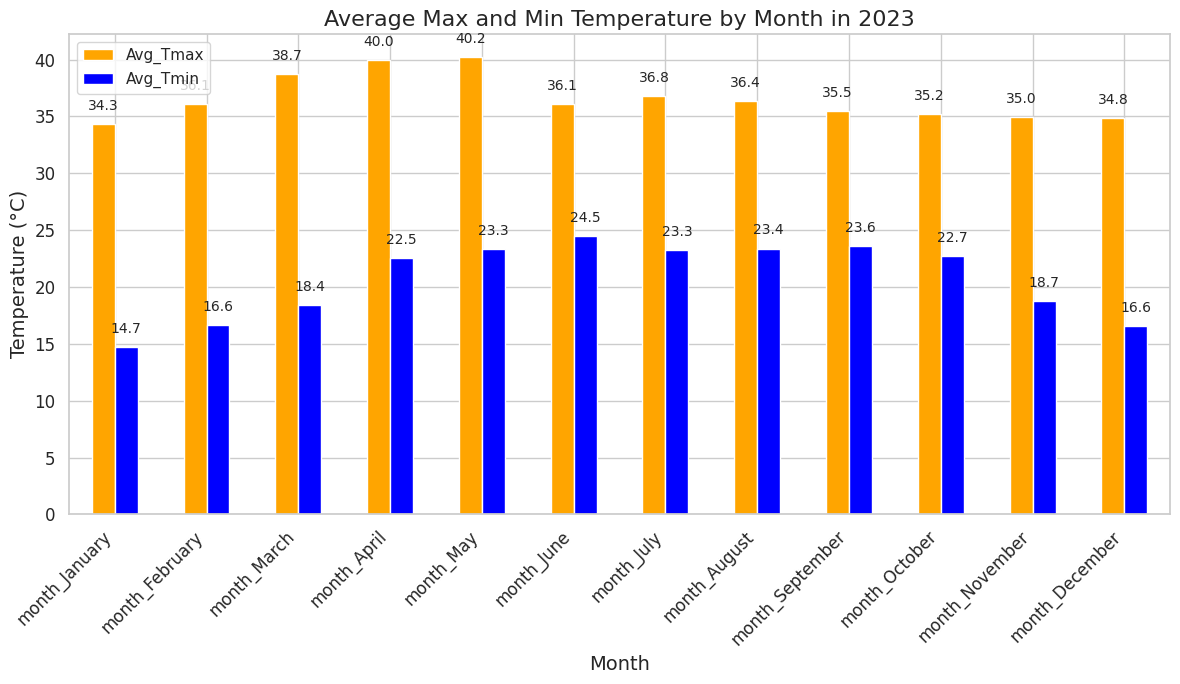

In [ ]:
# คำนวณค่าอุณหภูมิเฉลี่ย (Tmax และ Tmin) สำหรับแต่ละเดือน
avg_temp_by_month = {}

for month in months:
    avg_temp_by_month[month] = {
        'Avg_Tmax': temp_66_onehot[temp_65_onehot[month] == 1]['Tmax'].mean(),
        'Avg_Tmin': temp_66_onehot[temp_65_onehot[month] == 1]['Tmin'].mean()
    }

# สร้าง DataFrame จากผลลัพธ์
avg_temp_df = pd.DataFrame(avg_temp_by_month).T

# สร้างกราฟแท่งเพื่อแสดงค่าเฉลี่ยของ Tmax และ Tmin สำหรับแต่ละเดือน
ax = avg_temp_df.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])

# เพิ่มเลขกำกับบนแท่งกราฟ
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# ปรับแต่งกราฟ
plt.title('Average Max and Min Temperature by Month in 2023', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

# กราฟแสดงความสัมพันธ์อุณหภูมิเฉลี่ยในแต่ละจังหวัด 66

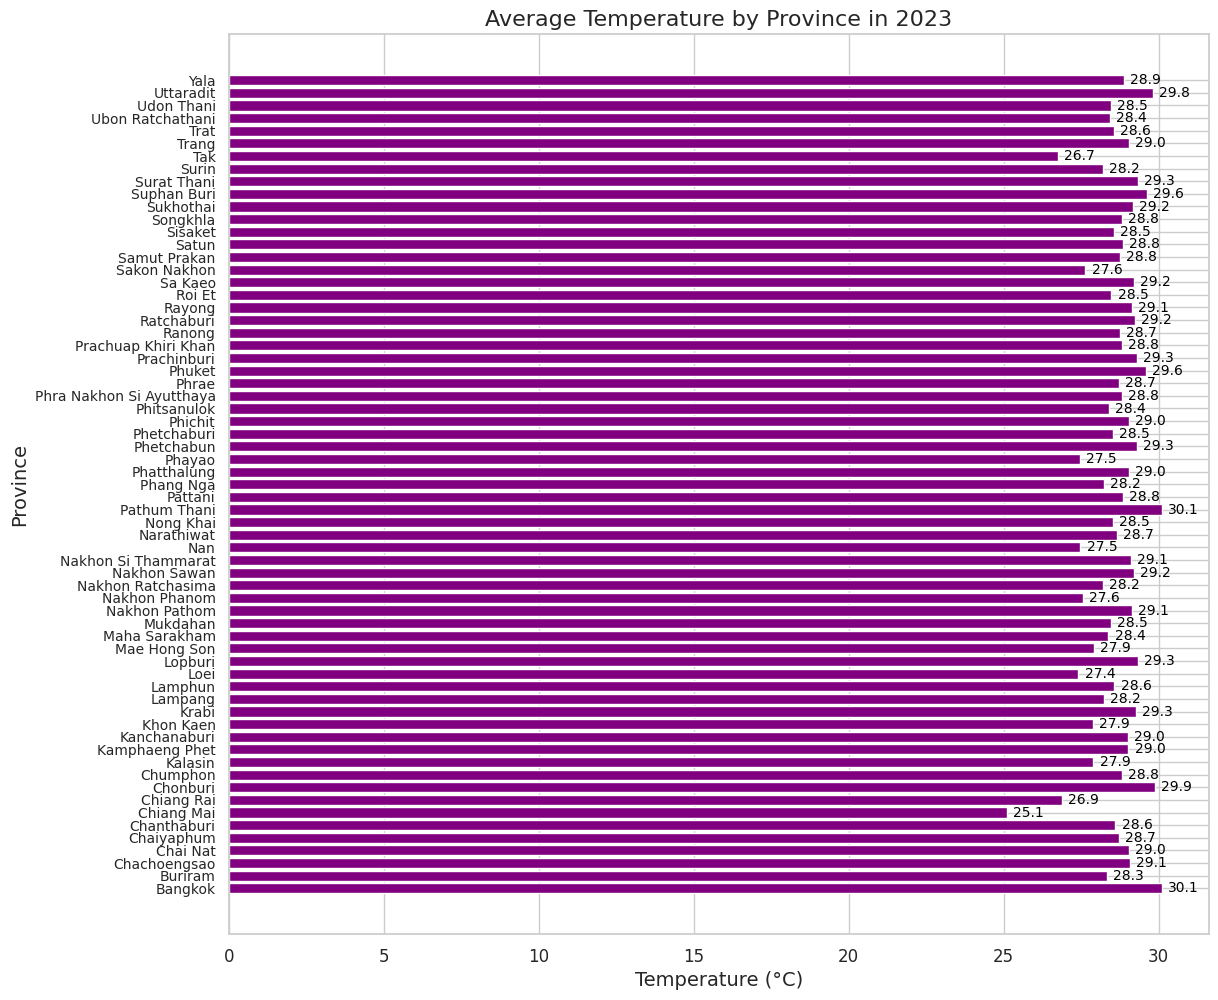

In [ ]:
# คำนวณค่าอุณหภูมิสูงสุดและต่ำสุดเฉลี่ยของแต่ละจังหวัด
avg_temp_by_province = temp_66_onehot.groupby('province')[['Tmax', 'Tmin']].mean()

# คำนวณค่าอุณหภูมิเฉลี่ยเดียวสำหรับแต่ละจังหวัด (ค่าเฉลี่ยของ Tmax และ Tmin)
avg_temp_by_province['Avg_Temperature'] = avg_temp_by_province[['Tmax', 'Tmin']].mean(axis=1)

# สร้างกราฟแท่งแนวนอน (horizontal bar chart)
plt.figure(figsize=(14, 10))  # เพิ่มขนาดของกราฟให้กว้างขึ้น

# กราฟแท่งแสดงค่าอุณหภูมิเฉลี่ย
bars = plt.barh(avg_temp_by_province.index, avg_temp_by_province['Avg_Temperature'], color='purple')

# เพิ่มเลขกำกับบนแท่งกราฟ
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', ha='left', fontsize=10, color='black')

# ปรับแต่งกราฟ
plt.title('Average Temperature by Province in 2023', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# ปรับการแสดงผลชื่อจังหวัดให้อ่านง่ายขึ้น
plt.yticks(rotation=0)  # กำหนดให้ชื่อจังหวัดตั้งตรง

# ใช้ tight_layout และ adjust เพื่อให้กราฟดูดีขึ้น
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)  # เพิ่มระยะห่างจากขอบกราฟ

# แสดงกราฟ
plt.show()

# คุณภาพดิน 66

In [ ]:
# อ่านไฟล์
soil_66 = pd.read_csv('Soil66.csv')

# แสดงข้อมูล 5 แถวแรก
print(soil_66.head(5))

       date    province                          pH  \
0  20230606  ฉะเชิงเทรา  กรดเล็กน้อย (pH 6.1 - 6.5)   
1  20230822  ฉะเชิงเทรา  กรดเล็กน้อย (pH 6.1 - 6.5)   
2  20230614  ฉะเชิงเทรา    กรดจัดมาก (pH 4.5 - 5.0)   
3  20230822  ฉะเชิงเทรา    กรดจัดมาก (pH 4.5 - 5.0)   
4  20230615  ฉะเชิงเทรา   กรดปานกลาง (pH 5.6 - 6.0)   

                            N                      P  \
0      ปานกลาง (1.51 - 2.50%)  สูง (16 - 45 มก./กก.)   
1      ปานกลาง (1.51 - 2.50%)  สูง (16 - 45 มก./กก.)   
2      ปานกลาง (1.51 - 2.50%)  สูง (16 - 45 มก./กก.)   
3      ปานกลาง (1.51 - 2.50%)  สูง (16 - 45 มก./กก.)   
4  ค่อนข้างต่ำ (1.01 - 1.50%)  สูง (16 - 45 มก./กก.)   

                           K  
0     สูง (91 - 120 มก./กก.)  
1     สูง (91 - 120 มก./กก.)  
2     สูงมาก (> 120 มก./กก.)  
3     สูงมาก (> 120 มก./กก.)  
4  ปานกลาง (61 - 90 มก./กก.)  


In [ ]:
# แสดงข้อมูลเบื้องต้นของ DataFrame เช่น จำนวนแถวและคอลัมน์
print(soil_66.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2579 non-null   int64 
 1   province  2579 non-null   object
 2   pH        2579 non-null   object
 3   N         2579 non-null   object
 4   P         2579 non-null   object
 5   K         2579 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.0+ KB
None


In [ ]:
#ดูค่าที่ไม่ซ้ำในแต่ละคอลัมน์
for col in soil_66.columns:
    print(f"🔹 คอลัมน์: {col}")
    print(soil_66[col].unique())  # แสดงค่าที่ไม่ซ้ำกันทั้งหมด
    print("-" * 50)

🔹 คอลัมน์: date
[20230606 20230822 20230614 20230615 20230821 20230605 20230616 20230612
 20230608 20230714 20230609 20230208 20230611 20230202 20230621 20230721
 20230811 20230720 20230906 20230701 20230601 20230824 20230804 20230206
 20230705 20230105 20230603 20230808 20230607 20230901 20230823 20230623
 20230723 20230907 20230515 20230818 20230706 20230703 20230602 20230323
 20230825 20230909 20230622 20230722 20230908 20230702 20230613 20230904
 20230820 20230917 20230327 20230922 20230118 20230725 20230730 20230417
 20230830 20230610 20230710 20230718 20230324 20230526 20230604 20230727
 20230409 20230405 20230803 20230522 20230320 20230518 20230920 20230627
 20230630 20230928 20230628 20230921 20230919 20230510 20230619 20230425
 20230726 20230905 20230924 20230314 20230711 20230418 20230918 20230523
 20230531 20230831 20230312 20230506 20230817 20230929 20230927 20230923
 20230930 20231003 20230913 20230529 20230530 20230626 20230911 20230810
 20230828 20230704 20230815 2023031

In [ ]:
# แสดงสถิติพื้นฐานสำหรับคอลัมน์ที่เป็นตัวเลข
print(soil_66.describe())

               date
count  2.579000e+03
mean   2.023064e+07
std    2.331827e+02
min    2.023010e+07
25%    2.023050e+07
50%    2.023062e+07
75%    2.023082e+07
max    2.023123e+07


In [ ]:
print("\n===== ประเภทข้อมูลแต่ละคอลัมน์ =====")
print(soil_66.dtypes)


===== ประเภทข้อมูลแต่ละคอลัมน์ =====
date         int64
province    object
pH          object
N           object
P           object
K           object
dtype: object


In [ ]:
#เช็คข้อมูล
print("\n===== ข้อมูลเบื้องต้น =====")
print(f"จำนวนแถว: {soil_66.shape[0]}")
print(f"จำนวนคอลัมน์: {soil_66.shape[1]}")


===== ข้อมูลเบื้องต้น =====
จำนวนแถว: 2579
จำนวนคอลัมน์: 6


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(soil_66.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['date', 'province', 'pH', 'N', 'P', 'K']


In [ ]:
# สร้าง dictionary สำหรับแปลงชื่อจังหวัดจากไทยเป็นอังกฤษ
province_translation = {
    'ฉะเชิงเทรา': 'Chachoengsao', 'ชลบุรี': 'Chonburi', 'จันทบุรี': 'Chanthaburi',
    'นครราชสีมา': 'Nakhon Ratchasima', 'ปทุมธานี': 'Pathum Thani', 'กรุงเทพมหานคร': 'Bangkok',
    'อำนาจเจริญ': 'Amnat Charoen', 'อุบลราชธานี': 'Ubon Ratchathani', 'สุรินทร์': 'Surin',
    'ร้อยเอ็ด': 'Roi Et', 'นครนายก': 'Nakhon Nayok', 'เชียงราย': 'Chiang Rai',
    'แพร่': 'Phrae', 'นครสวรรค์': 'Nakhon Sawan', 'สิงห์บุรี': 'Sing Buri',
    'สกลนคร': 'Sakon Nakhon', 'กำแพงเพชร': 'Kamphaeng Phet', 'กาฬสินธุ์': 'Kalasin',
    'แม่ฮ่องสอน': 'Mae Hong Son', 'พิษณุโลก': 'Phitsanulok', 'หนองคาย': 'Nong Khai',
    'ลำพูน': 'Lamphun', 'กาญจนบุรี': 'Kanchanaburi', 'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'สระแก้ว': 'Sa Kaeo', 'ราชบุรี': 'Ratchaburi', 'สุราษฎร์ธานี': 'Surat Thani',
    'สงขลา': 'Songkhla', 'มหาสารคาม': 'Maha Sarakham', 'อุตรดิตถ์': 'Uttaradit',
    'ภูเก็ต': 'Phuket', 'ระนอง': 'Ranong', 'สมุทรสงคราม': 'Samut Songkhram',
    'สตูล': 'Satun', 'ตรัง': 'Trang', 'ชุมพร': 'Chumphon', 'มุกดาหาร': 'Mukdahan',
    'นราธิวาส': 'Narathiwat', 'ปัตตานี': 'Pattani', 'ยะลา': 'Yala', 'กระบี่': 'Krabi'
}

# แปลงชื่อจังหวัดใน DataFrame
soil_66['province'] = soil_66['province'].map(province_translation)

# แสดงข้อมูลหลังจากการแปลง
print(soil_66[['province']].head())

       province
0  Chachoengsao
1  Chachoengsao
2  Chachoengsao
3  Chachoengsao
4  Chachoengsao


In [ ]:
translations = {
    'pH': {
        'กรดเล็กน้อย (pH 6.1 - 6.5)': 'pH: Slightly Acidic',
        'กรดจัด (pH 5.1 - 5.5)': 'pH: Acidic',
        'ด่างเล็กน้อย (pH 7.4 - 7.8)': 'pH: Slightly Alkaline',
        'ด่างปานกลาง (pH 7.9 - 8.4)': 'pH: Moderately Alkaline',
        'กรดจัดมาก (pH 4.5 - 5.0)': 'pH: Highly Acidic',
        'เป็นกลาง (pH 6.6 - 7.3)': 'pH: Neutral',
        'กรดรุนแรงมาก (pH 3.5 - 4.4)': 'pH: Very Strongly Acidic',
        'กรดปานกลาง (pH 5.6 - 6.0)': 'pH: Moderately Acidic',
        'กรดรุนแรงที่สุด (pH < 3.5)': 'pH: Extremely Acidic',
        'ด่างจัด (pH 8.5 - 9.0)': 'pH: Strongly Alkaline',
        'ด่างจัดมาก (pH > 9.0)': 'pH: Very Strongly Alkaline',
        'ไม่ได้วิเคราะห์': 'pH: Not Analyzed'
    },
    'N': {
        'ไม่ได้วิเคราะห์': 'N: Not Analyzed',
        'ปานกลาง (1.51 - 2.50%)': 'N: Moderate',
        'ค่อนข้างสูง (2.51 - 3.50%)': 'N: Fairly High',
        'สูง (3.51 - 4.50%)': 'N: High',
        'ต่ำ (0.05 - 1.00%)': 'N: Low',
        'ค่อนข้างต่ำ (1.01 - 1.50%)': 'N: Fairly Low',
        'ต่ำมาก (< 0.05%)': 'N: Very Low',
        'สูงมาก (> 4.50%)': 'N: Very High'
    },
    'P': {
        'ไม่ได้วิเคราะห์': 'P: Not Analyzed',
        'สูงมาก (> 45 มก./กก.)': 'P: Very High',
        'ปานกลาง (11 - 15 มก./กก.)': 'P: Moderate',
        'สูง (16 - 45 มก./กก.)': 'P: High',
        'ต่ำ (3 - 10 มก./กก.)': 'P: Low',
        'ต่ำมาก (< 3 มก./กก.)': 'P: Very Low'
    },
    'K': {
        'ไม่ได้วิเคราะห์': 'K: Not Analyzed',
        'สูงมาก (> 120 มก./กก.)': 'K: Very High',
        'ต่ำ (30 - 60 มก./กก.)': 'K: Low',
        'สูง (91 - 120 มก./กก.)': 'K: High',
        'ปานกลาง (61 - 90 มก./กก.)': 'K: Moderate',
        'ต่ำมาก (0 - 30 มก./กก.)': 'K: Very Low'
    }
}

soil_66.update(soil_66[['pH', 'N', 'P', 'K']].apply(lambda col: col.map(translations[col.name])))

print(soil_66[['pH', 'N', 'P', 'K']].head())

                      pH              N        P             K
0    pH: Slightly Acidic    N: Moderate  P: High       K: High
1    pH: Slightly Acidic    N: Moderate  P: High       K: High
2      pH: Highly Acidic    N: Moderate  P: High  K: Very High
3      pH: Highly Acidic    N: Moderate  P: High  K: Very High
4  pH: Moderately Acidic  N: Fairly Low  P: High   K: Moderate


# แผนภูมิวงกลมดูค่าดินและธาตุในดิน 66


Soil pH Distribution in 2023 Percentages:
pH: Acidic: 25.32%
pH: Highly Acidic: 18.53%
pH: Moderately Acidic: 16.48%
pH: Slightly Acidic: 12.10%
pH: Neutral: 9.50%
pH: Slightly Alkaline: 8.10%
pH: Very Strongly Acidic: 7.37%
pH: Moderately Alkaline: 1.40%
pH: Not Analyzed: 0.62%
pH: Extremely Acidic: 0.35%
pH: Strongly Alkaline: 0.19%
pH: Very Strongly Alkaline: 0.04%


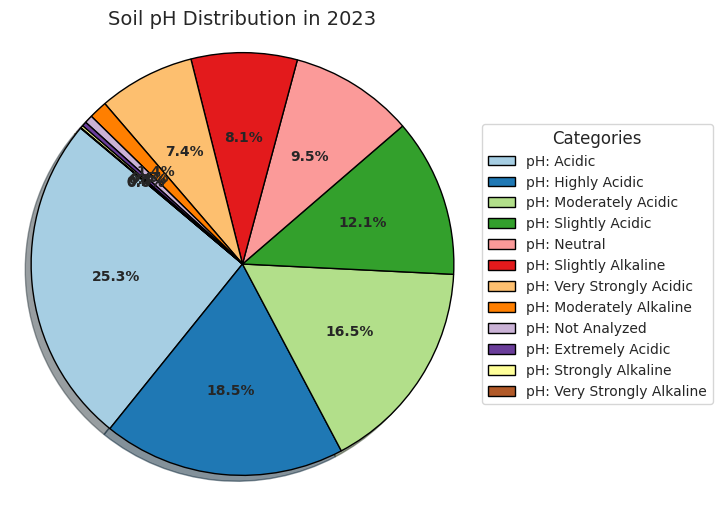

In [ ]:
import matplotlib.pyplot as plt

# ฟังก์ชันสร้าง Pie Chart พร้อมแสดงเปอร์เซ็นต์ข้างนอก และแสดงสีพร้อมคำอธิบาย
def plot_pie_chart_with_percent_and_legend(column, title):
    value_counts = soil_66[column].value_counts()  # ใช้ soil_66
    percentages = value_counts / value_counts.sum() * 100  # คำนวณเปอร์เซ็นต์
    plt.figure(figsize=(6, 6))

    # สร้าง Pie Chart โดยใช้เปอร์เซ็นต์ที่คำนวณ
    def autopct_function(pct, allvalues):
        absolute = round(pct / 100.*sum(allvalues), 1)
        return f"{pct:.1f}%"  # แสดงเฉพาะเปอร์เซ็นต์

    # สร้าง Pie Chart โดยให้ค่าเปอร์เซ็นต์อยู่ข้างนอก
    wedges, texts, autotexts = plt.pie(value_counts,
                                        labels=None,  # ไม่แสดง labels ในกราฟ
                                        autopct=lambda pct: autopct_function(pct, value_counts),
                                        startangle=140,
                                        colors=plt.cm.Paired.colors,
                                        labeldistance=1.4,  # เพิ่มระยะห่างระหว่างข้อความและกราฟ
                                        textprops={'fontsize': 10},  # ปรับขนาดฟอนต์ของข้อความในกราฟ
                                        shadow=True,  # เพิ่มเงาให้กราฟ
                                        wedgeprops={'edgecolor': 'black'})  # เพิ่มเส้นขอบให้แต่ละส่วน

    # ปรับตำแหน่งของตัวหนังสือที่แสดงผลเปอร์เซ็นต์
    for autotext in autotexts:
        autotext.set(size=10, weight='bold')  # ปรับขนาดและน้ำหนักตัวอักษร

    # สร้าง Legend ที่แสดงสีและค่าแต่ละประเภท
    plt.legend(wedges, value_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

    plt.title(title, fontsize=14)
    plt.axis('equal')  # ให้เป็นวงกลม

    # แสดงผลเปอร์เซ็นต์ในเอาท์พุต (Console)
    print(f"\n{title} Percentages:")
    for i, percentage in enumerate(percentages):
        print(f"{value_counts.index[i]}: {percentage:.2f}%")

    plt.show()

# แสดง Pie Chart พร้อมเปอร์เซ็นต์ข้างนอกและแสดงสีพร้อมคำอธิบายสำหรับคอลัมน์ pH
plot_pie_chart_with_percent_and_legend('pH', 'Soil pH Distribution in 2023')


Nitrogen (N) Distribution in 2023 Percentages:
N: Moderate: 33.04%
N: Low: 29.04%
N: Very Low: 13.77%
N: Fairly Low: 11.98%
N: Fairly High: 4.85%
N: Not Analyzed: 3.22%
N: High: 2.33%
N: Very High: 1.78%


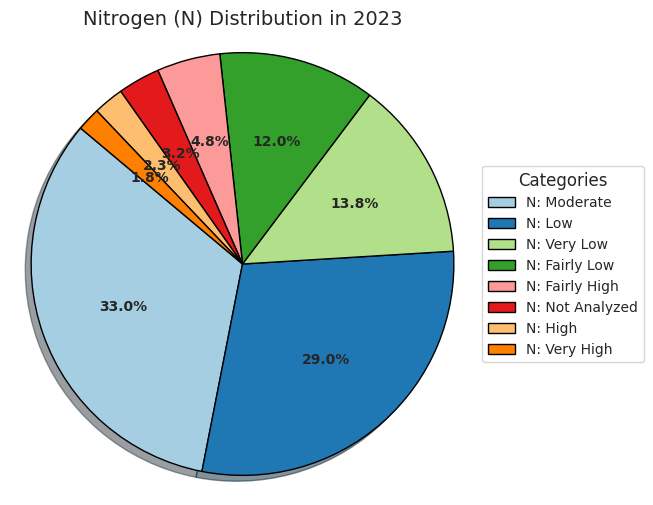

In [ ]:
plot_pie_chart_with_percent_and_legend('N', 'Nitrogen (N) Distribution in 2023')


Phosphorus (P) Distribution in 2023 Percentages:
P: Low: 35.67%
P: Very Low: 22.99%
P: Very High: 14.93%
P: High: 14.85%
P: Moderate: 11.32%
P: Not Analyzed: 0.23%


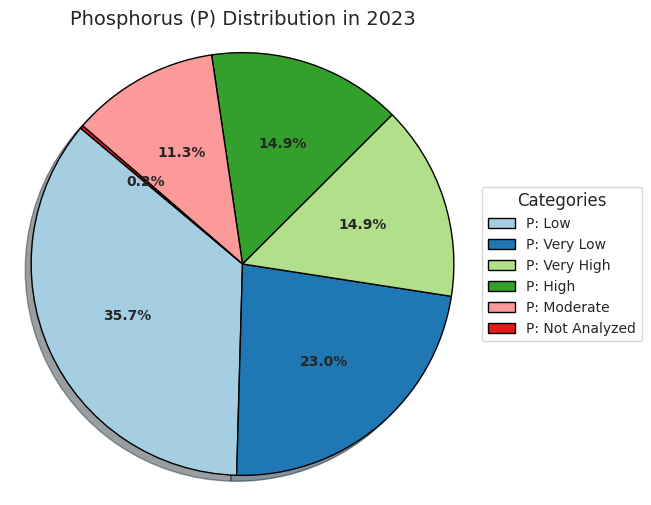

In [ ]:
plot_pie_chart_with_percent_and_legend('P', 'Phosphorus (P) Distribution in 2023')


Potassium (K) Distribution in 2023 Percentages:
K: Low: 33.93%
K: Very Low: 23.34%
K: Moderate: 21.02%
K: Very High: 12.76%
K: High: 8.80%
K: Not Analyzed: 0.16%


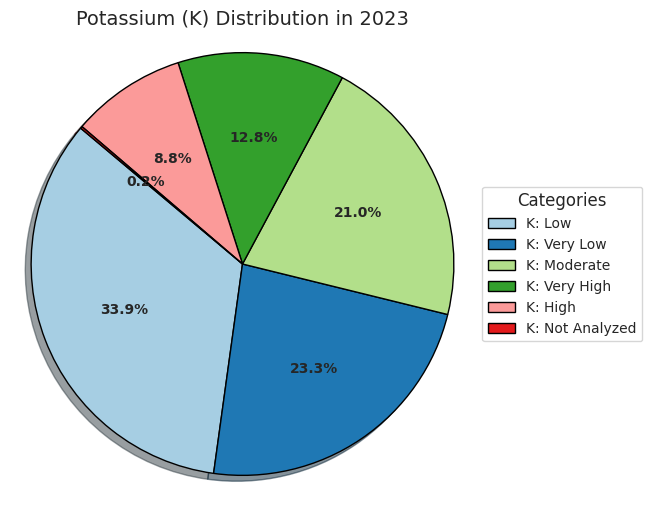

In [ ]:
plot_pie_chart_with_percent_and_legend('K', 'Potassium (K) Distribution in 2023')

# ทำ One-Hot Encoding ของ 'date','pH', 'N', 'P', 'K' 66

In [ ]:
soil_66_onehot = pd.get_dummies(soil_66, columns=['date','pH', 'N', 'P', 'K'], dtype=int)

In [ ]:
soil_66_onehot

province  date_20230105  date_20230109  date_20230110  \
0            Chachoengsao              0              0              0   
1            Chachoengsao              0              0              0   
2            Chachoengsao              0              0              0   
3            Chachoengsao              0              0              0   
4            Chachoengsao              0              0              0   
...                   ...            ...            ...            ...   
2574             Chumphon              0              0              0   
2575             Chumphon              0              0              0   
2576  Nakhon Si Thammarat              0              0              0   
2577  Nakhon Si Thammarat              0              0              0   
2578             Chumphon              0              0              0   

      date_20230113  date_20230117  date_20230118  date_20230120  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2574              0              0              0              0   
2575              0              0              0              0   
2576              0              0              0              0   
2577              0              0              0              0   
2578              0              0              0              0   

      date_20230126  date_20230131  ...  P_P: Moderate  P_P: Not Analyzed  \
0                 0              0  ...              0                  0   
1                 0              0  ...              0                  0   
2                 0              0  ...              0                  0   
3                 0              0  ...              0                  0   
4                 0              0  ...              0                  0   
...             ...            ...  ...            ...                ...   
2574              0              0  ...              0                  0   
2575              0              0  ...              0                  0   
2576              0              0  ...              0                  0   
2577              0              0  ...              0                  0   
2578              0              0  ...              0                  0   

      P_P: Very High  P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  \
0                  0              0          1         0              0   
1                  0              0          1         0              0   
2                  0              0          0         0              0   
3                  0              0          0         0              0   
4                  0              0          0         0              1   
...              ...            ...        ...       ...            ...   
2574               0              1          0         0              1   
2575               0              1          0         0              0   
2576               0              1          0         1              0   
2577               0              1          0         1              0   
2578               0              1          0         0              1   

      K_K: Not Analyzed  K_K: Very High  K_K: Very Low  
0                     0               0              0  
1                     0               0              0  
2                     0               1              0  
3                     0               1              0  
4                     0               0              0  
...                 ...             ...            ...  
2574                  0               0              0  
2575                  0      

In [ ]:
print(soil_66_onehot.isnull().sum())

province             0
date_20230105        0
date_20230109        0
date_20230110        0
date_20230113        0
                    ..
K_K: Low             0
K_K: Moderate        0
K_K: Not Analyzed    0
K_K: Very High       0
K_K: Very Low        0
Length: 206, dtype: int64


In [ ]:
print(soil_66_onehot.duplicated().sum())

893


In [ ]:
# ลบแถวที่ซ้ำทั้งหมดในทุกคอลัมน์ โดยเก็บแถวแรกที่ซ้ำไว้
soil_66_onehot = soil_66_onehot.drop_duplicates(keep='first')

# เช็คผลหลังจากลบแถวที่ซ้ำ
print(soil_66_onehot.duplicated().sum())

0


In [ ]:
print("\n===== ชื่อคอลัมน์ทั้งหมด =====")
print(soil_66_onehot.columns.tolist())


===== ชื่อคอลัมน์ทั้งหมด =====
['province', 'date_20230105', 'date_20230109', 'date_20230110', 'date_20230113', 'date_20230117', 'date_20230118', 'date_20230120', 'date_20230126', 'date_20230131', 'date_20230201', 'date_20230202', 'date_20230203', 'date_20230206', 'date_20230207', 'date_20230208', 'date_20230210', 'date_20230213', 'date_20230214', 'date_20230219', 'date_20230220', 'date_20230224', 'date_20230308', 'date_20230309', 'date_20230310', 'date_20230312', 'date_20230314', 'date_20230315', 'date_20230316', 'date_20230317', 'date_20230319', 'date_20230320', 'date_20230321', 'date_20230322', 'date_20230323', 'date_20230324', 'date_20230327', 'date_20230329', 'date_20230405', 'date_20230406', 'date_20230409', 'date_20230416', 'date_20230417', 'date_20230418', 'date_20230419', 'date_20230420', 'date_20230421', 'date_20230425', 'date_20230426', 'date_20230427', 'date_20230429', 'date_20230502', 'date_20230503', 'date_20230504', 'date_20230505', 'date_20230506', 'date_20230507', 'da

In [ ]:
soil_66_onehot.dtypes

province             object
date_20230105         int64
date_20230109         int64
date_20230110         int64
date_20230113         int64
                      ...  
K_K: Low              int64
K_K: Moderate         int64
K_K: Not Analyzed     int64
K_K: Very High        int64
K_K: Very Low         int64
Length: 206, dtype: object

In [ ]:
#soil_66_onehot.to_csv('soil_66_clean.csv', index=False)

# กราฟแสดงค่าไนโตรเจนสูงมากในดิน ของแต่ะจังหวัด 66

<ipython-input-139-9ee81eee6125>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='province', y='N_N: Very High', data=data, palette='viridis')


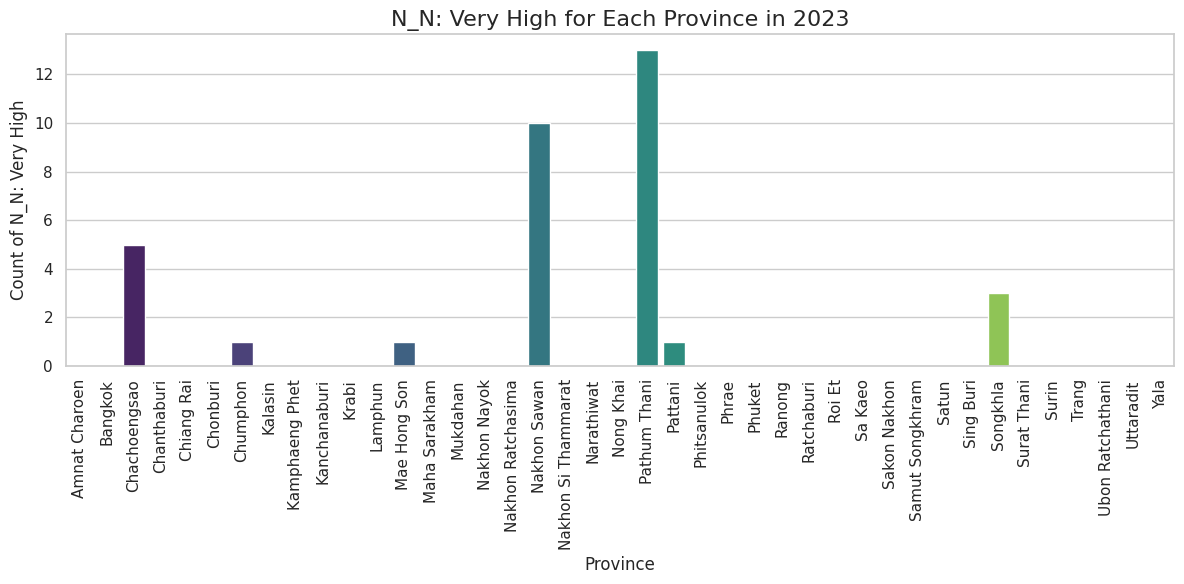

In [ ]:
# เลือกข้อมูลที่เกี่ยวข้องกับ 'N_N: Very High'
data = soil_66_onehot.groupby('province')['N_N: Very High'].sum().reset_index()

# สร้างกราฟแท่ง
plt.figure(figsize=(12, 6))
sns.barplot(x='province', y='N_N: Very High', data=data, palette='viridis')

# ตั้งค่าชื่อกราฟและแกน
plt.title("N_N: Very High for Each Province in 2023", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Count of N_N: Very High", fontsize=12)
plt.xticks(rotation=90)  # หมุนชื่อจังหวัดเพื่อให้อ่านง่าย
plt.tight_layout()  # ทำให้กราฟกระชับ

# แสดงกราฟ
plt.show()

# Merge ข้อมูลปี 65

In [ ]:
from functools import reduce

# รายการ DataFrame ที่ต้องการ Merge
dfs = [rice_yield_65_onehot, rain_65_onehot, temp_65_onehot, soil_65_onehot]

# กำหนดคีย์ที่ใช้ในการ Merge
merge_keys = ['province']

# ใช้ reduce() ในการ Merge ทุก DataFrame ทีละคู่
merged_df_65 = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how='outer'), dfs)

# แสดงข้อมูลที่รวมกันแล้ว
print(merged_df_65.head())

        province  yield(tons)  subcommod_ข้าวนาปรัง  subcommod_ข้าวนาปี  \
0  Amnat Charoen     385838.0                   0.0                 1.0   
1  Amnat Charoen     385838.0                   0.0                 1.0   
2  Amnat Charoen     385838.0                   0.0                 1.0   
3  Amnat Charoen     385838.0                   0.0                 1.0   
4  Amnat Charoen     385838.0                   0.0                 1.0   

   year_2022_x  MinRain  MaxRain  AvgRain  month_April_x  month_August_x  ...  \
0          1.0      3.1      6.4  5.11955            0.0             0.0  ...   
1          1.0      3.1      6.4  5.11955            0.0             0.0  ...   
2          1.0      3.1      6.4  5.11955            0.0             0.0  ...   
3          1.0      3.1      6.4  5.11955            0.0             0.0  ...   
4          1.0      3.1      6.4  5.11955            0.0             0.0  ...   

   P_P: Moderate  P_P: Not Analyzed  P_P: Very High  P_P: Very

In [ ]:
merged_df_65

province  yield(tons)  subcommod_ข้าวนาปรัง  subcommod_ข้าวนาปี  \
0       Amnat Charoen     385838.0                   0.0                 1.0   
1       Amnat Charoen     385838.0                   0.0                 1.0   
2       Amnat Charoen     385838.0                   0.0                 1.0   
3       Amnat Charoen     385838.0                   0.0                 1.0   
4       Amnat Charoen     385838.0                   0.0                 1.0   
...               ...          ...                   ...                 ...   
509421       Yasothon      37832.0                   1.0                 0.0   
509422       Yasothon      37832.0                   1.0                 0.0   
509423       Yasothon      37832.0                   1.0                 0.0   
509424       Yasothon      37832.0                   1.0                 0.0   
509425       Yasothon      37832.0                   1.0                 0.0   

        year_2022_x     MinRain     MaxRain     AvgRain  month_April_x  \
0               1.0    3.100000    6.400000    5.119550            0.0   
1               1.0    3.100000    6.400000    5.119550            0.0   
2               1.0    3.100000    6.400000    5.119550            0.0   
3               1.0    3.100000    6.400000    5.119550            0.0   
4               1.0    3.100000    6.400000    5.119550            0.0   
...             ...         ...         ...         ...            ...   
509421          1.0  268.850006  410.859985  337.446505            0.0   
509422          1.0  316.679993  516.340027  381.832897            0.0   
509423          1.0   63.500000  133.000000   99.273177            0.0   
509424          1.0   30.500000   48.500000   41.925521            0.0   
509425          1.0    0.000000    0.000000    0.000000            0.0   

        month_August_x  ...  P_P: Moderate  P_P: Not Analyzed  P_P: Very High  \
0                  0.0  ...            0.0                0.0             0.0   
1                  0.0  ...            0.0                0.0             0.0   
2                  0.0  ...            0.0                0.0             0.0   
3                  0.0  ...            0.0                0.0             0.0   
4                  0.0  ...            0.0                0.0             0.0   
...                ...  ...            ...                ...             ...   
509421             1.0  ...            NaN                NaN             NaN   
509422             0.0  ...            NaN                NaN             NaN   
509423             0.0  ...            NaN                NaN             NaN   
509424             0.0  ...            NaN                NaN             NaN   
509425             0.0  ...            NaN                NaN             NaN   

        P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  K_K: Not Analyzed  \
0                 0.0        0.0       0.0            1.0                0.0   
1                 0.0        0.0       0.0            1.0                0.0   
2                 0.0        0.0       0.0            0.0                0.0   
3                 0.0        0.0       0.0            0.0                0.0   
4                 0.0        0.0       0.0            0.0                0.0   
...               ...        ...       ...            ...                ...   
509421            NaN        NaN       NaN            NaN                NaN   
509422            NaN        NaN       NaN            NaN                NaN   
509423            NaN        NaN       NaN            NaN                NaN   
509424            NaN        NaN       NaN            NaN                NaN   
509425            NaN        NaN       NaN            NaN                NaN   

        K_K: Very High  K_K: Very Low  
0                  0.0            0.0  
1                  0.0            0.0  
2                  0.0            1.0  
3                  0.0            1.0  
4                  0.0       

In [ ]:
print(merged_df_65.columns.tolist())

['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'subcommod_ข้าวนาปี', 'year_2022_x', 'MinRain', 'MaxRain', 'AvgRain', 'month_April_x', 'month_August_x', 'month_December_x', 'month_February_x', 'month_January_x', 'month_July_x', 'month_June_x', 'month_March_x', 'month_May_x', 'month_November_x', 'month_October_x', 'month_September_x', 'year_2022_y', 'Tmax', 'Tmin', 'month_April_y', 'month_August_y', 'month_December_y', 'month_February_y', 'month_January_y', 'month_July_y', 'month_June_y', 'month_March_y', 'month_May_y', 'month_November_y', 'month_October_y', 'month_September_y', 'year_2022', 'date_20220104', 'date_20220111', 'date_20220119', 'date_20220121', 'date_20220127', 'date_20220128', 'date_20220131', 'date_20220201', 'date_20220202', 'date_20220203', 'date_20220205', 'date_20220208', 'date_20220209', 'date_20220210', 'date_20220211', 'date_20220213', 'date_20220214', 'date_20220215', 'date_20220217', 'date_20220218', 'date_20220221', 'date_20220222', 'date_20220223', 'date_2

In [ ]:
merged_df_65.isnull().sum()

province                    0
yield(tons)             33566
subcommod_ข้าวนาปรัง    33566
subcommod_ข้าวนาปี      33566
year_2022_x             33566
                        ...  
K_K: Low                 8520
K_K: Moderate            8520
K_K: Not Analyzed        8520
K_K: Very High           8520
K_K: Very Low            8520
Length: 297, dtype: int64

In [ ]:
merged_df_65.dtypes

province                 object
yield(tons)             float64
subcommod_ข้าวนาปรัง    float64
subcommod_ข้าวนาปี      float64
year_2022_x             float64
                         ...   
K_K: Low                float64
K_K: Moderate           float64
K_K: Not Analyzed       float64
K_K: Very High          float64
K_K: Very Low           float64
Length: 297, dtype: object

In [ ]:
# จัดการค่าหายไป (NaN) โดยเติมค่าที่เหมาะสม เช่น 0
merged_df_65.fillna(0, inplace=True)

In [ ]:
merged_df_65.isnull().sum()

province                0
yield(tons)             0
subcommod_ข้าวนาปรัง    0
subcommod_ข้าวนาปี      0
year_2022_x             0
                       ..
K_K: Low                0
K_K: Moderate           0
K_K: Not Analyzed       0
K_K: Very High          0
K_K: Very Low           0
Length: 297, dtype: int64

In [ ]:
print(merged_df_65.duplicated().sum())

0


In [ ]:
merged_df_65

province  yield(tons)  subcommod_ข้าวนาปรัง  subcommod_ข้าวนาปี  \
0       Amnat Charoen     385838.0                   0.0                 1.0   
1       Amnat Charoen     385838.0                   0.0                 1.0   
2       Amnat Charoen     385838.0                   0.0                 1.0   
3       Amnat Charoen     385838.0                   0.0                 1.0   
4       Amnat Charoen     385838.0                   0.0                 1.0   
...               ...          ...                   ...                 ...   
509421       Yasothon      37832.0                   1.0                 0.0   
509422       Yasothon      37832.0                   1.0                 0.0   
509423       Yasothon      37832.0                   1.0                 0.0   
509424       Yasothon      37832.0                   1.0                 0.0   
509425       Yasothon      37832.0                   1.0                 0.0   

        year_2022_x     MinRain     MaxRain     AvgRain  month_April_x  \
0               1.0    3.100000    6.400000    5.119550            0.0   
1               1.0    3.100000    6.400000    5.119550            0.0   
2               1.0    3.100000    6.400000    5.119550            0.0   
3               1.0    3.100000    6.400000    5.119550            0.0   
4               1.0    3.100000    6.400000    5.119550            0.0   
...             ...         ...         ...         ...            ...   
509421          1.0  268.850006  410.859985  337.446505            0.0   
509422          1.0  316.679993  516.340027  381.832897            0.0   
509423          1.0   63.500000  133.000000   99.273177            0.0   
509424          1.0   30.500000   48.500000   41.925521            0.0   
509425          1.0    0.000000    0.000000    0.000000            0.0   

        month_August_x  ...  P_P: Moderate  P_P: Not Analyzed  P_P: Very High  \
0                  0.0  ...            0.0                0.0             0.0   
1                  0.0  ...            0.0                0.0             0.0   
2                  0.0  ...            0.0                0.0             0.0   
3                  0.0  ...            0.0                0.0             0.0   
4                  0.0  ...            0.0                0.0             0.0   
...                ...  ...            ...                ...             ...   
509421             1.0  ...            0.0                0.0             0.0   
509422             0.0  ...            0.0                0.0             0.0   
509423             0.0  ...            0.0                0.0             0.0   
509424             0.0  ...            0.0                0.0             0.0   
509425             0.0  ...            0.0                0.0             0.0   

        P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  K_K: Not Analyzed  \
0                 0.0        0.0       0.0            1.0                0.0   
1                 0.0        0.0       0.0            1.0                0.0   
2                 0.0        0.0       0.0            0.0                0.0   
3                 0.0        0.0       0.0            0.0                0.0   
4                 0.0        0.0       0.0            0.0                0.0   
...               ...        ...       ...            ...                ...   
509421            0.0        0.0       0.0            0.0                0.0   
509422            0.0        0.0       0.0            0.0                0.0   
509423            0.0        0.0       0.0            0.0                0.0   
509424            0.0        0.0       0.0            0.0                0.0   
509425            0.0        0.0       0.0            0.0                0.0   

        K_K: Very High  K_K: Very Low  
0                  0.0            0.0  
1                  0.0            0.0  
2                  0.0            1.0  
3                  0.0            1.0  
4                  0.0       

In [ ]:
merged_df_65 = merged_df_65.drop_duplicates(subset=['province'], keep='first')

merged_df_65

province  yield(tons)  subcommod_ข้าวนาปรัง  subcommod_ข้าวนาปี  \
0       Amnat Charoen     385838.0                   0.0                 1.0   
1056        Ang Thong     232412.0                   0.0                 1.0   
1104          Bangkok      55216.0                   0.0                 1.0   
1392        Bueng Kan     152733.0                   0.0                 1.0   
1416         Buri Ram    1042769.0                   0.0                 1.0   
...               ...          ...                   ...                 ...   
492674     Udon Thani     732991.0                   0.0                 1.0   
492962    Uthai Thani     390135.0                   0.0                 1.0   
492986      Uttaradit     369743.0                   0.0                 1.0   
493274           Yala       6467.0                   0.0                 1.0   
509402       Yasothon     467723.0                   0.0                 1.0   

        year_2022_x  MinRain    MaxRain    AvgRain  month_April_x  \
0               1.0     3.10   6.400000   5.119550            0.0   
1056            1.0     4.01  10.820000   7.379763            0.0   
1104            1.0    16.48  43.790001  29.587532            0.0   
1392            1.0     4.96   9.440000   6.796661            0.0   
1416            1.0     0.00   0.000000   0.000000            0.0   
...             ...      ...        ...        ...            ...   
492674          1.0     0.30  24.240000   6.667997            0.0   
492962          1.0     7.60  22.180000  14.439227            0.0   
492986          1.0     2.97  21.590000  13.355799            0.0   
493274          1.0     3.91  28.719999  16.675986            0.0   
509402          1.0     1.68   6.060000   4.539797            0.0   

        month_August_x  ...  P_P: Moderate  P_P: Not Analyzed  P_P: Very High  \
0                  0.0  ...            0.0                0.0             0.0   
1056               0.0  ...            1.0                0.0             0.0   
1104               0.0  ...            0.0                0.0             0.0   
1392               0.0  ...            0.0                0.0             0.0   
1416               0.0  ...            0.0                0.0             0.0   
...                ...  ...            ...                ...             ...   
492674             0.0  ...            0.0                0.0             0.0   
492962             0.0  ...            0.0                0.0             0.0   
492986             0.0  ...            0.0                0.0             0.0   
493274             0.0  ...            0.0                0.0             0.0   
509402             0.0  ...            0.0                0.0             0.0   

        P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  K_K: Not Analyzed  \
0                 0.0        0.0       0.0            1.0                0.0   
1056              0.0        0.0       1.0            0.0                0.0   
1104              0.0        0.0       0.0            0.0                0.0   
1392              0.0        0.0       0.0            0.0                0.0   
1416              0.0        0.0       0.0            0.0                0.0   
...               ...        ...       ...            ...                ...   
492674            0.0        0.0       0.0            0.0                0.0   
492962            0.0        0.0       0.0            0.0                0.0   
492986            0.0        0.0       0.0            0.0                0.0   
493274            0.0        1.0       0.0            0.0                0.0   
509402            0.0        0.0       0.0            0.0                0.0   

        K_K: Very High  K_K: Very Low  
0                  0.0            0.0  
1056               0.0            0.0  
1104               0.0            0.0  
1392               0.0            0.0  
1416               0.0            0.0  
...                ...            ...  
492674   

In [ ]:
merged_df_65 = merged_df_65.loc[:, ~merged_df_65.columns.duplicated()]

In [ ]:
merged_df_65

province  yield(tons)  subcommod_ข้าวนาปรัง  subcommod_ข้าวนาปี  \
0       Amnat Charoen     385838.0                   0.0                 1.0   
1056        Ang Thong     232412.0                   0.0                 1.0   
1104          Bangkok      55216.0                   0.0                 1.0   
1392        Bueng Kan     152733.0                   0.0                 1.0   
1416         Buri Ram    1042769.0                   0.0                 1.0   
...               ...          ...                   ...                 ...   
492674     Udon Thani     732991.0                   0.0                 1.0   
492962    Uthai Thani     390135.0                   0.0                 1.0   
492986      Uttaradit     369743.0                   0.0                 1.0   
493274           Yala       6467.0                   0.0                 1.0   
509402       Yasothon     467723.0                   0.0                 1.0   

        year_2022_x  MinRain    MaxRain    AvgRain  month_April_x  \
0               1.0     3.10   6.400000   5.119550            0.0   
1056            1.0     4.01  10.820000   7.379763            0.0   
1104            1.0    16.48  43.790001  29.587532            0.0   
1392            1.0     4.96   9.440000   6.796661            0.0   
1416            1.0     0.00   0.000000   0.000000            0.0   
...             ...      ...        ...        ...            ...   
492674          1.0     0.30  24.240000   6.667997            0.0   
492962          1.0     7.60  22.180000  14.439227            0.0   
492986          1.0     2.97  21.590000  13.355799            0.0   
493274          1.0     3.91  28.719999  16.675986            0.0   
509402          1.0     1.68   6.060000   4.539797            0.0   

        month_August_x  ...  P_P: Moderate  P_P: Not Analyzed  P_P: Very High  \
0                  0.0  ...            0.0                0.0             0.0   
1056               0.0  ...            1.0                0.0             0.0   
1104               0.0  ...            0.0                0.0             0.0   
1392               0.0  ...            0.0                0.0             0.0   
1416               0.0  ...            0.0                0.0             0.0   
...                ...  ...            ...                ...             ...   
492674             0.0  ...            0.0                0.0             0.0   
492962             0.0  ...            0.0                0.0             0.0   
492986             0.0  ...            0.0                0.0             0.0   
493274             0.0  ...            0.0                0.0             0.0   
509402             0.0  ...            0.0                0.0             0.0   

        P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  K_K: Not Analyzed  \
0                 0.0        0.0       0.0            1.0                0.0   
1056              0.0        0.0       1.0            0.0                0.0   
1104              0.0        0.0       0.0            0.0                0.0   
1392              0.0        0.0       0.0            0.0                0.0   
1416              0.0        0.0       0.0            0.0                0.0   
...               ...        ...       ...            ...                ...   
492674            0.0        0.0       0.0            0.0                0.0   
492962            0.0        0.0       0.0            0.0                0.0   
492986            0.0        0.0       0.0            0.0                0.0   
493274            0.0        1.0       0.0            0.0                0.0   
509402            0.0        0.0       0.0            0.0                0.0   

        K_K: Very High  K_K: Very Low  
0                  0.0            0.0  
1056               0.0            0.0  
1104               0.0            0.0  
1392               0.0            0.0  
1416               0.0            0.0  
...                ...            ...  
492674   

In [ ]:
# แสดงคอลัมน์ทั้งหมด
print(merged_df_65.columns.tolist())

['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'subcommod_ข้าวนาปี', 'year_2022_x', 'MinRain', 'MaxRain', 'AvgRain', 'month_April_x', 'month_August_x', 'month_December_x', 'month_February_x', 'month_January_x', 'month_July_x', 'month_June_x', 'month_March_x', 'month_May_x', 'month_November_x', 'month_October_x', 'month_September_x', 'year_2022_y', 'Tmax', 'Tmin', 'month_April_y', 'month_August_y', 'month_December_y', 'month_February_y', 'month_January_y', 'month_July_y', 'month_June_y', 'month_March_y', 'month_May_y', 'month_November_y', 'month_October_y', 'month_September_y', 'year_2022', 'date_20220104', 'date_20220111', 'date_20220119', 'date_20220121', 'date_20220127', 'date_20220128', 'date_20220131', 'date_20220201', 'date_20220202', 'date_20220203', 'date_20220205', 'date_20220208', 'date_20220209', 'date_20220210', 'date_20220211', 'date_20220213', 'date_20220214', 'date_20220215', 'date_20220217', 'date_20220218', 'date_20220221', 'date_20220222', 'date_20220223', 'date_2

In [ ]:
# เปลี่ยนชื่อคอลัมน์ให้เป็นชื่อเดือนปกติ โดยตัด '_x' ออก
merged_df_65 = merged_df_65.rename(columns=lambda x: x.replace('_x', '') if '_x' in x else x)

# ลบคอลัมน์ที่ลงท้ายด้วย '_y' หรือ 'y'
merged_df_65 = merged_df_65.loc[:, ~merged_df_65.columns.str.endswith('_y')]
merged_df_65 = merged_df_65.loc[:, ~merged_df_65.columns.str.endswith('y')]

# ตรวจสอบคอลัมน์ที่เหลือ
print(merged_df_65.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'subcommod_ข้าวนาปี',
       'year_2022', 'MinRain', 'MaxRain', 'AvgRain', 'month_April',
       'month_August',
       ...
       'P_P: Moderate', 'P_P: Not Analyzed', 'P_P: Very High', 'P_P: Very Low',
       'K_K: High', 'K_K: Low', 'K_K: Moderate', 'K_K: Not Analyzed',
       'K_K: Very High', 'K_K: Very Low'],
      dtype='object', length=280)


In [ ]:
#merged_df_65.to_csv('merged_df_65_clean.csv', index=False)

# Merge ข้อมูลปี 66

In [ ]:
from functools import reduce

# รายการ DataFrame ที่ต้องการ Merge
dfs = [rice_yield_66_onehot, rain_66_onehot, temp_66_onehot, soil_66_onehot]

# กำหนดคีย์ที่ใช้ในการ Merge
merge_keys = ['province']

# ใช้ reduce() ในการ Merge ทุก DataFrame ทีละคู่
merged_df_66 = reduce(lambda left, right: pd.merge(left, right, on=merge_keys, how='outer'), dfs)

# แสดงข้อมูลที่รวมกันแล้ว
print(merged_df_66.head())

        province  yield(tons)  subcommod_ข้าวนาปรัง  year_2023_x  MinRain  \
0  Amnat Charoen       1071.0                   1.0          1.0      9.5   
1  Amnat Charoen       1071.0                   1.0          1.0      9.5   
2  Amnat Charoen       1071.0                   1.0          1.0      9.5   
3  Amnat Charoen       1071.0                   1.0          1.0      9.5   
4  Amnat Charoen       1071.0                   1.0          1.0      9.5   

     MaxRain    AvgRain  month_April_x  month_August_x  month_December_x  ...  \
0  33.299999  22.147897            0.0             0.0               0.0  ...   
1  33.299999  22.147897            0.0             0.0               0.0  ...   
2  33.299999  22.147897            0.0             0.0               0.0  ...   
3  33.299999  22.147897            0.0             0.0               0.0  ...   
4  33.299999  22.147897            0.0             0.0               0.0  ...   

   P_P: Moderate  P_P: Not Analyzed  P_P: Very Hig

In [ ]:
merged_df_66

province  yield(tons)  subcommod_ข้าวนาปรัง  year_2023_x  \
0       Amnat Charoen       1071.0                   1.0          1.0   
1       Amnat Charoen       1071.0                   1.0          1.0   
2       Amnat Charoen       1071.0                   1.0          1.0   
3       Amnat Charoen       1071.0                   1.0          1.0   
4       Amnat Charoen       1071.0                   1.0          1.0   
...               ...          ...                   ...          ...   
236617       Yasothon      39568.0                   1.0          1.0   
236618       Yasothon      39568.0                   1.0          1.0   
236619       Yasothon      39568.0                   1.0          1.0   
236620       Yasothon      39568.0                   1.0          1.0   
236621       Yasothon      39568.0                   1.0          1.0   

           MinRain     MaxRain     AvgRain  month_April_x  month_August_x  \
0         9.500000   33.299999   22.147897            0.0             0.0   
1         9.500000   33.299999   22.147897            0.0             0.0   
2         9.500000   33.299999   22.147897            0.0             0.0   
3         9.500000   33.299999   22.147897            0.0             0.0   
4         9.500000   33.299999   22.147897            0.0             0.0   
...            ...         ...         ...            ...             ...   
236617   98.800000  224.900000  152.386082            0.0             1.0   
236618  380.160004  608.739990  469.442144            0.0             0.0   
236619   37.640000  149.880000   74.977714            0.0             0.0   
236620    2.000000    9.420000    4.747795            0.0             0.0   
236621    0.000000    0.020000    0.002723            0.0             0.0   

        month_December_x  ...  P_P: Moderate  P_P: Not Analyzed  \
0                    0.0  ...            0.0                0.0   
1                    0.0  ...            1.0                0.0   
2                    0.0  ...            0.0                0.0   
3                    0.0  ...            0.0                0.0   
4                    0.0  ...            0.0                0.0   
...                  ...  ...            ...                ...   
236617               0.0  ...            NaN                NaN   
236618               0.0  ...            NaN                NaN   
236619               0.0  ...            NaN                NaN   
236620               0.0  ...            NaN                NaN   
236621               1.0  ...            NaN                NaN   

        P_P: Very High  P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  \
0                  0.0            1.0        0.0       0.0            0.0   
1                  0.0            0.0        0.0       0.0            0.0   
2                  0.0            1.0        0.0       0.0            0.0   
3                  0.0            0.0        0.0       0.0            0.0   
4                  0.0            0.0        0.0       0.0            0.0   
...                ...            ...        ...       ...            ...   
236617             NaN            NaN        NaN       NaN            NaN   
236618             NaN            NaN        NaN       NaN            NaN   
236619             NaN            NaN        NaN       NaN            NaN   
236620             NaN            NaN        NaN       NaN            NaN   
236621             NaN            NaN        NaN       NaN            NaN   

        K_K: Not Analyzed  K_K: Very High  K_K: Very Low  
0                     0.0             0.0            1.0  
1                     0.0             0.0            1.0  
2                     0.0             0.0            1.0  
3                     0.0             0.0            1.0  
4                     0.0             0.0            1.0  
...                   ...             ...            ...  
236617                NaN             NaN            NaN  
236618   

In [ ]:
print(merged_df_66.isnull().sum())

province                    0
yield(tons)             50844
subcommod_ข้าวนาปรัง    50844
year_2023_x             50844
MinRain                     6
                        ...  
K_K: Low                 4134
K_K: Moderate            4134
K_K: Not Analyzed        4134
K_K: Very High           4134
K_K: Very Low            4134
Length: 240, dtype: int64


In [ ]:
# จัดการค่าหายไป (NaN) โดยเติมค่าที่เหมาะสม เช่น 0
merged_df_66.fillna(0, inplace=True)

In [ ]:
print(merged_df_66.duplicated().sum())

0


In [ ]:
merged_df_66

province  yield(tons)  subcommod_ข้าวนาปรัง  year_2023_x  \
0       Amnat Charoen       1071.0                   1.0          1.0   
1       Amnat Charoen       1071.0                   1.0          1.0   
2       Amnat Charoen       1071.0                   1.0          1.0   
3       Amnat Charoen       1071.0                   1.0          1.0   
4       Amnat Charoen       1071.0                   1.0          1.0   
...               ...          ...                   ...          ...   
236617       Yasothon      39568.0                   1.0          1.0   
236618       Yasothon      39568.0                   1.0          1.0   
236619       Yasothon      39568.0                   1.0          1.0   
236620       Yasothon      39568.0                   1.0          1.0   
236621       Yasothon      39568.0                   1.0          1.0   

           MinRain     MaxRain     AvgRain  month_April_x  month_August_x  \
0         9.500000   33.299999   22.147897            0.0             0.0   
1         9.500000   33.299999   22.147897            0.0             0.0   
2         9.500000   33.299999   22.147897            0.0             0.0   
3         9.500000   33.299999   22.147897            0.0             0.0   
4         9.500000   33.299999   22.147897            0.0             0.0   
...            ...         ...         ...            ...             ...   
236617   98.800000  224.900000  152.386082            0.0             1.0   
236618  380.160004  608.739990  469.442144            0.0             0.0   
236619   37.640000  149.880000   74.977714            0.0             0.0   
236620    2.000000    9.420000    4.747795            0.0             0.0   
236621    0.000000    0.020000    0.002723            0.0             0.0   

        month_December_x  ...  P_P: Moderate  P_P: Not Analyzed  \
0                    0.0  ...            0.0                0.0   
1                    0.0  ...            1.0                0.0   
2                    0.0  ...            0.0                0.0   
3                    0.0  ...            0.0                0.0   
4                    0.0  ...            0.0                0.0   
...                  ...  ...            ...                ...   
236617               0.0  ...            0.0                0.0   
236618               0.0  ...            0.0                0.0   
236619               0.0  ...            0.0                0.0   
236620               0.0  ...            0.0                0.0   
236621               1.0  ...            0.0                0.0   

        P_P: Very High  P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  \
0                  0.0            1.0        0.0       0.0            0.0   
1                  0.0            0.0        0.0       0.0            0.0   
2                  0.0            1.0        0.0       0.0            0.0   
3                  0.0            0.0        0.0       0.0            0.0   
4                  0.0            0.0        0.0       0.0            0.0   
...                ...            ...        ...       ...            ...   
236617             0.0            0.0        0.0       0.0            0.0   
236618             0.0            0.0        0.0       0.0            0.0   
236619             0.0            0.0        0.0       0.0            0.0   
236620             0.0            0.0        0.0       0.0            0.0   
236621             0.0            0.0        0.0       0.0            0.0   

        K_K: Not Analyzed  K_K: Very High  K_K: Very Low  
0                     0.0             0.0            1.0  
1                     0.0             0.0            1.0  
2                     0.0             0.0            1.0  
3                     0.0             0.0            1.0  
4                     0.0             0.0            1.0  
...                   ...             ...            ...  
236617                0.0             0.0            0.0  
236618   

In [ ]:
merged_df_66 = merged_df_66.drop_duplicates(subset=['province'], keep='first')

merged_df_66

province  yield(tons)  subcommod_ข้าวนาปรัง  year_2023_x  \
0       Amnat Charoen       1071.0                   1.0          1.0   
900         Ang Thong     158685.0                   1.0          1.0   
912           Bangkok      48772.0                   1.0          1.0   
1056        Bueng Kan       7504.0                   1.0          1.0   
1068         Buri Ram      24214.0                   1.0          1.0   
...               ...          ...                   ...          ...   
235446     Udon Thani      21109.0                   1.0          1.0   
235590    Uthai Thani      68318.0                   1.0          1.0   
235602      Uttaradit     201081.0                   1.0          1.0   
235746           Yala          0.0                   0.0          0.0   
236610       Yasothon      39568.0                   1.0          1.0   

           MinRain     MaxRain     AvgRain  month_April_x  month_August_x  \
0         9.500000   33.299999   22.147897            0.0             0.0   
900       0.000000    0.400000    0.176185            0.0             0.0   
912       0.000000    5.900000    0.920092            0.0             0.0   
1056      5.600000   18.200001   13.305158            0.0             0.0   
1068      0.000000    0.000000    0.000000            0.0             0.0   
...            ...         ...         ...            ...             ...   
235446    0.100000   22.200001    5.113395            0.0             0.0   
235590    0.000000    2.500000    0.632762            0.0             0.0   
235602    0.000000    4.000000    0.383331            0.0             0.0   
235746  291.299988  460.399994  382.110118            0.0             0.0   
236610    8.200000   27.700001   19.119560            0.0             0.0   

        month_December_x  ...  P_P: Moderate  P_P: Not Analyzed  \
0                    0.0  ...            0.0                0.0   
900                  0.0  ...            0.0                0.0   
912                  0.0  ...            0.0                0.0   
1056                 0.0  ...            0.0                0.0   
1068                 0.0  ...            0.0                0.0   
...                  ...  ...            ...                ...   
235446               0.0  ...            0.0                0.0   
235590               0.0  ...            0.0                0.0   
235602               0.0  ...            1.0                0.0   
235746               0.0  ...            1.0                0.0   
236610               0.0  ...            0.0                0.0   

        P_P: Very High  P_P: Very Low  K_K: High  K_K: Low  K_K: Moderate  \
0                  0.0            1.0        0.0       0.0            0.0   
900                0.0            0.0        0.0       0.0            0.0   
912                0.0            0.0        1.0       0.0            0.0   
1056               0.0            0.0        0.0       0.0            0.0   
1068               0.0            0.0        0.0       0.0            0.0   
...                ...            ...        ...       ...            ...   
235446             0.0            0.0        0.0       0.0            0.0   
235590             0.0            0.0        0.0       0.0            0.0   
235602             0.0            0.0        0.0       1.0            0.0   
235746             0.0            0.0        0.0       0.0            1.0   
236610             0.0            0.0        0.0       0.0            0.0   

        K_K: Not Analyzed  K_K: Very High  K_K: Very Low  
0                     0.0             0.0            1.0  
900                   0.0             0.0            0.0  
912                   0.0             0.0            0.0  
1056                  0.0             0.0            0.0  
1068                  0.0             0.0            0.0  
...                   ...             ...            ...  
235446                0.0             0.0            0.0  
235590   

In [ ]:
merged_df_66.columns

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'year_2023_x',
       'MinRain', 'MaxRain', 'AvgRain', 'month_April_x', 'month_August_x',
       'month_December_x',
       ...
       'P_P: Moderate', 'P_P: Not Analyzed', 'P_P: Very High', 'P_P: Very Low',
       'K_K: High', 'K_K: Low', 'K_K: Moderate', 'K_K: Not Analyzed',
       'K_K: Very High', 'K_K: Very Low'],
      dtype='object', length=240)

In [ ]:
# แสดงคอลัมน์ทั้งหมด
print(merged_df_66.columns.tolist())

['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'year_2023_x', 'MinRain', 'MaxRain', 'AvgRain', 'month_April_x', 'month_August_x', 'month_December_x', 'month_February_x', 'month_January_x', 'month_July_x', 'month_June_x', 'month_March_x', 'month_May_x', 'month_November_x', 'month_October_x', 'month_September_x', 'year_2023_y', 'Tmax', 'Tmin', 'month_April_y', 'month_August_y', 'month_December_y', 'month_February_y', 'month_January_y', 'month_July_y', 'month_June_y', 'month_March_y', 'month_May_y', 'month_November_y', 'month_October_y', 'month_September_y', 'year_2023', 'date_20230105', 'date_20230109', 'date_20230110', 'date_20230113', 'date_20230117', 'date_20230118', 'date_20230120', 'date_20230126', 'date_20230131', 'date_20230201', 'date_20230202', 'date_20230203', 'date_20230206', 'date_20230207', 'date_20230208', 'date_20230210', 'date_20230213', 'date_20230214', 'date_20230219', 'date_20230220', 'date_20230224', 'date_20230308', 'date_20230309', 'date_20230310', 'date_202303

In [ ]:
# เปลี่ยนชื่อคอลัมน์ให้เป็นชื่อเดือนปกติ โดยตัด '_x' ออก
merged_df_66 = merged_df_66.rename(columns=lambda x: x.replace('_x', '') if '_x' in x else x)

# ลบคอลัมน์ที่ลงท้ายด้วย '_y' หรือ 'y'
merged_df_66 = merged_df_66.loc[:, ~merged_df_66.columns.str.endswith('_y')]
merged_df_66 = merged_df_66.loc[:, ~merged_df_66.columns.str.endswith('y')]

# ตรวจสอบคอลัมน์ที่เหลือ
print(merged_df_66.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'year_2023',
       'MinRain', 'MaxRain', 'AvgRain', 'month_April', 'month_August',
       'month_December',
       ...
       'P_P: Moderate', 'P_P: Not Analyzed', 'P_P: Very High', 'P_P: Very Low',
       'K_K: High', 'K_K: Low', 'K_K: Moderate', 'K_K: Not Analyzed',
       'K_K: Very High', 'K_K: Very Low'],
      dtype='object', length=223)


In [ ]:
#merged_df_66.to_csv('merged_df_66_clean.csv', index=False)

# Merge ปี 65 กับ 66

In [ ]:
merged_df_final = pd.merge(merged_df_65, merged_df_66, on=['province'], how='outer')

merged_df_final

province  yield(tons)_x  subcommod_ข้าวนาปรัง_x  subcommod_ข้าวนาปี  \
0   Amnat Charoen       385838.0                     0.0                 1.0   
1       Ang Thong       232412.0                     0.0                 1.0   
2         Bangkok        55216.0                     0.0                 1.0   
3       Bueng Kan       152733.0                     0.0                 1.0   
4        Buri Ram      1042769.0                     0.0                 1.0   
..            ...            ...                     ...                 ...   
79     Udon Thani       732991.0                     0.0                 1.0   
80    Uthai Thani       390135.0                     0.0                 1.0   
81      Uttaradit       369743.0                     0.0                 1.0   
82           Yala         6467.0                     0.0                 1.0   
83       Yasothon       467723.0                     0.0                 1.0   

    year_2022  MinRain_x  MaxRain_x  AvgRain_x  month_April_x  month_August_x  \
0         1.0       3.10   6.400000   5.119550            0.0             0.0   
1         1.0       4.01  10.820000   7.379763            0.0             0.0   
2         1.0      16.48  43.790001  29.587532            0.0             0.0   
3         1.0       4.96   9.440000   6.796661            0.0             0.0   
4         1.0       0.00   0.000000   0.000000            0.0             0.0   
..        ...        ...        ...        ...            ...             ...   
79        1.0       0.30  24.240000   6.667997            0.0             0.0   
80        1.0       7.60  22.180000  14.439227            0.0             0.0   
81        1.0       2.97  21.590000  13.355799            0.0             0.0   
82        1.0       3.91  28.719999  16.675986            0.0             0.0   
83        1.0       1.68   6.060000   4.539797            0.0             0.0   

    ...  P_P: Moderate_y  P_P: Not Analyzed_y  P_P: Very High_y  \
0   ...              0.0                  0.0               0.0   
1   ...              0.0                  0.0               0.0   
2   ...              0.0                  0.0               0.0   
3   ...              0.0                  0.0               0.0   
4   ...              0.0                  0.0               0.0   
..  ...              ...                  ...               ...   
79  ...              0.0                  0.0               0.0   
80  ...              0.0                  0.0               0.0   
81  ...              1.0                  0.0               0.0   
82  ...              1.0                  0.0               0.0   
83  ...              0.0                  0.0               0.0   

    P_P: Very Low_y  K_K: High_y  K_K: Low_y  K_K: Moderate_y  \
0               1.0          0.0         0.0              0.0   
1               0.0          0.0         0.0              0.0   
2               0.0          1.0         0.0              0.0   
3               0.0          0.0         0.0              0.0   
4               0.0          0.0         0.0              0.0   
..              ...          ...         ...              ...   
79              0.0          0.0         0.0              0.0   
80              0.0          0.0         0.0              0.0   
81              0.0          0.0         1.0              0.0   
82              0.0          0.0         0.0              1.0   
83              0.0          0.0         0.0              0.0   

    K_K: Not Analyzed_y  K_K: Very High_y  K_K: Very Low_y  
0                   0.0               0.0              1.0  
1                   0.0               0.0              0.0  
2                   0.0               0.0              0.0  
3                   0.0               0.0              0.0  
4                   0.0               0.0              0.0  
..                  ...               ...              ...  
79                  0.0               0.0              0.0  
8

In [ ]:
list(merged_df_final.columns)

['province',
 'yield(tons)_x',
 'subcommod_ข้าวนาปรัง_x',
 'subcommod_ข้าวนาปี',
 'year_2022',
 'MinRain_x',
 'MaxRain_x',
 'AvgRain_x',
 'month_April_x',
 'month_August_x',
 'month_December_x',
 'month_June_x',
 'month_March_x',
 'month_November_x',
 'month_October_x',
 'month_September_x',
 'Tmax_x',
 'Tmin_x',
 'year_2022',
 'date_20220104',
 'date_20220111',
 'date_20220119',
 'date_20220121',
 'date_20220127',
 'date_20220128',
 'date_20220131',
 'date_20220201',
 'date_20220202',
 'date_20220203',
 'date_20220205',
 'date_20220208',
 'date_20220209',
 'date_20220210',
 'date_20220211',
 'date_20220213',
 'date_20220214',
 'date_20220215',
 'date_20220217',
 'date_20220218',
 'date_20220221',
 'date_20220222',
 'date_20220223',
 'date_20220224',
 'date_20220225',
 'date_20220226',
 'date_20220227',
 'date_20220228',
 'date_20220303',
 'date_20220304',
 'date_20220307',
 'date_20220308',
 'date_20220309',
 'date_20220310',
 'date_20220311',
 'date_20220313',
 'date_20220314',
 'dat

In [ ]:
merged_df_final = merged_df_final.rename(columns={
    'subcommod_ข้าวนาปรัง': 'rice_naprang',
    'subcommod_ข้าวนาปี': 'rice_napee'
})

In [ ]:
# เปลี่ยนชื่อคอลัมน์ให้เป็นชื่อเดือนปกติ โดยตัด '_x' ออก
merged_df_final = merged_df_final.rename(columns=lambda x: x.replace('_x', '') if '_x' in x else x)

# ลบคอลัมน์ที่ลงท้ายด้วย '_y' หรือ 'y'
merged_df_final = merged_df_final.loc[:, ~merged_df_final.columns.str.endswith('_y')]
merged_df_final = merged_df_final.loc[:, ~merged_df_final.columns.str.endswith('y')]

# ตรวจสอบคอลัมน์ที่เหลือ
print(merged_df_final.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'rice_napee',
       'year_2022', 'MinRain', 'MaxRain', 'AvgRain', 'month_April',
       'month_August',
       ...
       'date_20230930', 'date_20231003', 'date_20231004', 'date_20231005',
       'date_20231009', 'date_20231018', 'date_20231020', 'date_20231129',
       'date_20231226', 'pH_pH: Very Strongly Alkaline'],
      dtype='object', length=456)


In [ ]:
list(merged_df_final.columns)

['province',
 'yield(tons)',
 'subcommod_ข้าวนาปรัง',
 'rice_napee',
 'year_2022',
 'MinRain',
 'MaxRain',
 'AvgRain',
 'month_April',
 'month_August',
 'month_December',
 'month_June',
 'month_March',
 'month_November',
 'month_October',
 'month_September',
 'Tmax',
 'Tmin',
 'year_2022',
 'date_20220104',
 'date_20220111',
 'date_20220119',
 'date_20220121',
 'date_20220127',
 'date_20220128',
 'date_20220131',
 'date_20220201',
 'date_20220202',
 'date_20220203',
 'date_20220205',
 'date_20220208',
 'date_20220209',
 'date_20220210',
 'date_20220211',
 'date_20220213',
 'date_20220214',
 'date_20220215',
 'date_20220217',
 'date_20220218',
 'date_20220221',
 'date_20220222',
 'date_20220223',
 'date_20220224',
 'date_20220225',
 'date_20220226',
 'date_20220227',
 'date_20220228',
 'date_20220303',
 'date_20220304',
 'date_20220307',
 'date_20220308',
 'date_20220309',
 'date_20220310',
 'date_20220311',
 'date_20220313',
 'date_20220314',
 'date_20220315',
 'date_20220316',
 'date_

In [ ]:
merged_df_final.isnull().sum()

province                         0
yield(tons)                      0
subcommod_ข้าวนาปรัง             0
rice_napee                       0
year_2022                        0
                                ..
date_20231018                    1
date_20231020                    1
date_20231129                    1
date_20231226                    1
pH_pH: Very Strongly Alkaline    1
Length: 456, dtype: int64

In [ ]:
merged_df_final.fillna(0, inplace=True)

In [ ]:
merged_df_final.isnull().sum()

province                         0
yield(tons)                      0
subcommod_ข้าวนาปรัง             0
rice_napee                       0
year_2022                        0
                                ..
date_20231018                    0
date_20231020                    0
date_20231129                    0
date_20231226                    0
pH_pH: Very Strongly Alkaline    0
Length: 456, dtype: int64

In [ ]:
#merged_df_final.to_csv('merged_df_final_clean.csv', index=False)

In [ ]:
# ตรวจสอบคอลัมน์ซ้ำ
duplicate_columns = merged_df_final.columns[merged_df_final.columns.duplicated()]
print("คอลัมน์ที่ซ้ำ:", duplicate_columns)

คอลัมน์ที่ซ้ำ: Index(['year_2022', 'year_2023'], dtype='object')


In [ ]:
# ลบคอลัมน์ที่ซ้ำ แต่เก็บคอลัมน์แรกไว้
merged_df_final = merged_df_final.loc[:, ~merged_df_final.columns.duplicated(keep='first')]

# แสดงผลลัพธ์
print(merged_df_final)

         province  yield(tons)  subcommod_ข้าวนาปรัง  rice_napee  year_2022  \
0   Amnat Charoen     385838.0                   0.0         1.0        1.0   
1       Ang Thong     232412.0                   0.0         1.0        1.0   
2         Bangkok      55216.0                   0.0         1.0        1.0   
3       Bueng Kan     152733.0                   0.0         1.0        1.0   
4        Buri Ram    1042769.0                   0.0         1.0        1.0   
..            ...          ...                   ...         ...        ...   
79     Udon Thani     732991.0                   0.0         1.0        1.0   
80    Uthai Thani     390135.0                   0.0         1.0        1.0   
81      Uttaradit     369743.0                   0.0         1.0        1.0   
82           Yala       6467.0                   0.0         1.0        1.0   
83       Yasothon     467723.0                   0.0         1.0        1.0   

    MinRain    MaxRain    AvgRain  month_April  mon

In [ ]:
merged_final_copy = merged_df_final.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# สร้างสำเนาของ merged_df_final
merged_df_final_copy = merged_df_final.copy()

# แปลงทุกคอลัมน์ที่เป็น object (ข้อความ) ให้เป็นตัวเลขใน DataFrame สำเนา
label_encoder = LabelEncoder()

for col in merged_df_final_copy.select_dtypes(include=['object']).columns:
    merged_df_final_copy[col] = label_encoder.fit_transform(merged_df_final_copy[col].astype(str))

# ตรวจสอบผลลัพธ์ในสำเนา
print(merged_df_final_copy.dtypes)  # แสดงชนิดข้อมูลของแต่ละคอลัมน์

province                           int64
yield(tons)                      float64
subcommod_ข้าวนาปรัง             float64
rice_napee                       float64
year_2022                        float64
                                  ...   
date_20231018                    float64
date_20231020                    float64
date_20231129                    float64
date_20231226                    float64
pH_pH: Very Strongly Alkaline    float64
Length: 454, dtype: object


In [ ]:
# ลบคอลัมน์ที่ชื่อเริ่มต้นด้วย "Date" โดยไม่คำนึงถึงตัวพิมพ์ใหญ่
merged_df_final_copy = merged_df_final_copy.loc[:, ~merged_df_final_copy.columns.str.lower().str.startswith('date')]

In [ ]:
merged_df_final_copy.columns

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'rice_napee',
       'year_2022', 'MinRain', 'MaxRain', 'AvgRain', 'month_April',
       'month_August', 'month_December', 'month_June', 'month_March',
       'month_November', 'month_October', 'month_September', 'Tmax', 'Tmin',
       'pH_pH: Acidic', 'pH_pH: Extremely Acidic', 'pH_pH: Highly Acidic',
       'pH_pH: Moderately Acidic', 'pH_pH: Moderately Alkaline',
       'pH_pH: Neutral', 'pH_pH: Not Analyzed', 'pH_pH: Slightly Acidic',
       'pH_pH: Slightly Alkaline', 'pH_pH: Strongly Alkaline',
       'pH_pH: Very Strongly Acidic', 'N_N: Fairly High', 'N_N: Fairly Low',
       'N_N: High', 'N_N: Low', 'N_N: Moderate', 'N_N: Not Analyzed',
       'N_N: Very High', 'N_N: Very Low', 'P_P: High', 'P_P: Low',
       'P_P: Moderate', 'P_P: Not Analyzed', 'P_P: Very High', 'P_P: Very Low',
       'K_K: High', 'K_K: Low', 'K_K: Moderate', 'K_K: Not Analyzed',
       'K_K: Very High', 'K_K: Very Low', 'year_2023',
       'pH_pH: Ve

In [ ]:
print(merged_df_final.columns)

Index(['province', 'yield(tons)', 'subcommod_ข้าวนาปรัง', 'rice_napee',
       'year_2022', 'MinRain', 'MaxRain', 'AvgRain', 'month_April',
       'month_August',
       ...
       'date_20230930', 'date_20231003', 'date_20231004', 'date_20231005',
       'date_20231009', 'date_20231018', 'date_20231020', 'date_20231129',
       'date_20231226', 'pH_pH: Very Strongly Alkaline'],
      dtype='object', length=454)


Correlation with Yield (Tons):
yield(tons)                      1.000000
year_2023                        0.389842
P_P: Very Low                    0.371955
pH_pH: Slightly Alkaline         0.320892
rice_napee                       0.265626
year_2022                        0.265626
N_N: Very Low                    0.235675
N_N: High                        0.167738
K_K: Low                         0.096977
Tmax                             0.079806
N_N: Fairly Low                  0.058919
pH_pH: Acidic                    0.033391
province                         0.032838
pH_pH: Very Strongly Acidic      0.028317
K_K: Very Low                    0.023566
pH_pH: Moderately Acidic         0.004532
Tmin                            -0.017247
P_P: Moderate                   -0.034633
pH_pH: Neutral                  -0.044095
K_K: Moderate                   -0.065077
N_N: Low                        -0.080179
K_K: Very High                  -0.081588
K_K: High                       -0.083246
N_N

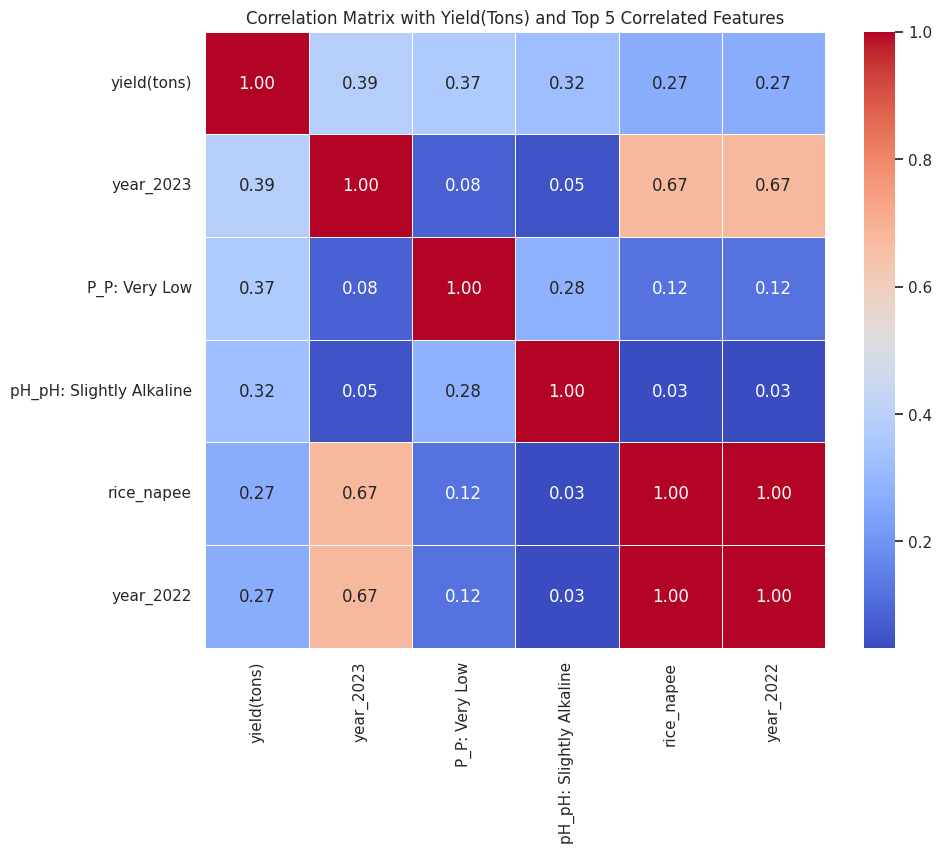

In [ ]:
# คำนวณ Correlation Matrix
corr_matrix = merged_df_final_copy.corr()

# เลือกเฉพาะคอลัมน์ 'yield(tons)' และเรียงลำดับค่าความสัมพันธ์จากมากไปน้อย
corr_with_yield = corr_matrix['yield(tons)'].sort_values(ascending=False)

# เลือก 5 ฟีเจอร์ที่สัมพันธ์กับ 'yield(tons)' มากที่สุด (ยกเว้นตัวเอง)
top_5_features = corr_with_yield[1:6].index  # ข้าม 'yield(tons)' เอง

# แสดงผล 5 ฟีเจอร์ที่มีความสัมพันธ์สูงสุด
print("Correlation with Yield (Tons):")
print(corr_with_yield)

# คำนวณความสัมพันธ์ของแต่ละฟีเจอร์ที่มีความสัมพันธ์กับ 'yield(tons)'
print("\nCorrelation with Yield (Tons):")
for feature in top_5_features:
    print(f"{feature}: {corr_with_yield[feature]:.2f}")

# วาด Heatmap สำหรับฟีเจอร์ที่สัมพันธ์กับ 'yield(tons)' และ 5 ฟีเจอร์ที่สัมพันธ์สูงสุด
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[['yield(tons)'] + top_5_features.tolist(), ['yield(tons)'] + top_5_features.tolist()],
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# ตั้งชื่อหัวข้อ
plt.title("Correlation Matrix with Yield(Tons) and Top 5 Correlated Features")
plt.show()

# Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# เลือกฟีเจอร์ที่ต้องการใช้
features = ['year_2023', 'P_P: Very Low', 'pH_pH: Slightly Alkaline', 'AvgRain', 'Tmax', 'Tmin', 'rice_napee']
X = merged_df_final[features]
y = merged_df_final['yield(tons)']

# แบ่งข้อมูลเป็น Training set และ Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ทำนายผลลัพธ์จากโมเดล Linear Regression
lr_predictions = lr_model.predict(X_test)

# คำนวณ R² Score สำหรับ Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
print(f"R² Score for Linear Regression: {lr_r2:.4f}")

# คำนวณ RMSE สำหรับ Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)  # คำนวณ Mean Squared Error
lr_rmse = lr_mse**0.5  # คำนวณ RMSE
print(f"RMSE for Linear Regression: {lr_rmse:.4f}")

R² Score for Linear Regression: 0.3045
RMSE for Linear Regression: 308168.0082


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


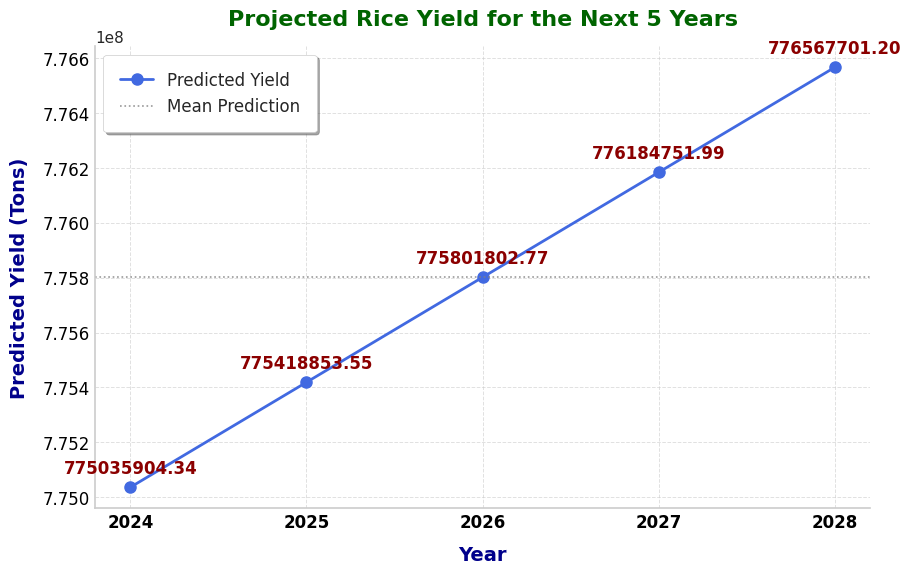

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# กำหนดค่าปีในอนาคต
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
future_features = np.column_stack([future_years] + [np.zeros(len(future_years))] * 6)

# ทำนายผลลัพธ์จาก Linear Regression
future_predictions = lr_model.predict(future_features)

# สร้างกราฟแสดงผลการพยากรณ์
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_predictions, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8, label='Predicted Yield')

# เพิ่มค่าแต่ละจุดบนกราฟ
for i, txt in enumerate(future_predictions):
    plt.annotate(f'{txt:.2f}', (future_years[i], future_predictions[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center',
                 fontsize=12, fontweight='bold', color='darkred')

# ปรับแต่งกราฟ
plt.xlabel('Year', fontsize=14, fontweight='bold', labelpad=10, color='darkblue')
plt.ylabel('Predicted Yield (Tons)', fontsize=14, fontweight='bold', labelpad=10, color='darkblue')
plt.title('Projected Rice Yield for the Next 5 Years', fontsize=16, fontweight='bold', color='darkgreen', pad=15)

plt.xticks(future_years.flatten(), fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# ปรับกรอบของกราฟให้ดูสะอาด
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# แสดงค่าของเส้นกริดในแนวแกน Y เท่านั้น
plt.axhline(y=np.mean(future_predictions), color='gray', linestyle='dotted', linewidth=1.2, alpha=0.8, label="Mean Prediction")

plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, borderpad=1)
plt.show()

R² Score for Linear Regression: 0.3045
RMSE for Linear Regression: 308168.0082


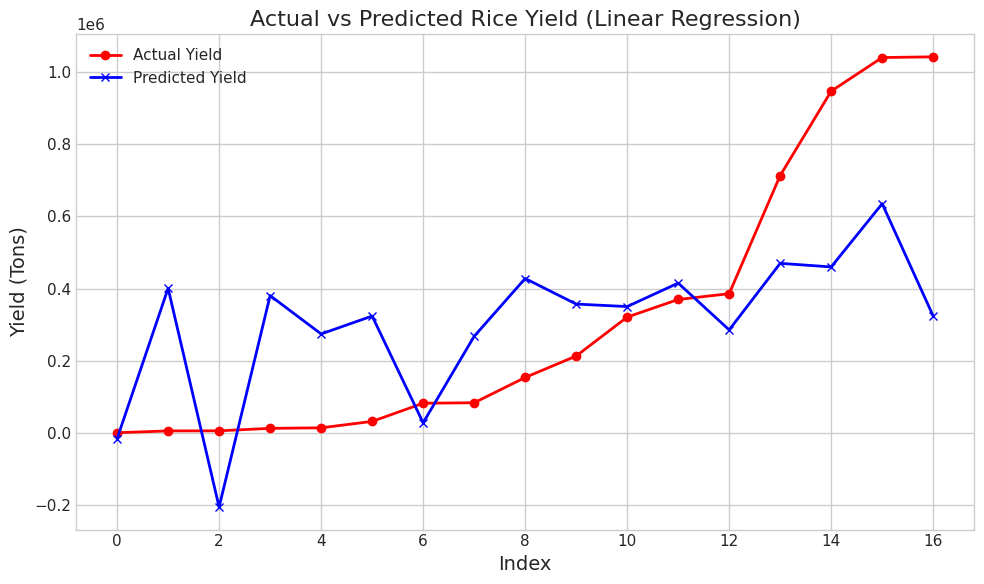

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ทำนายผลลัพธ์จากโมเดล Linear Regression
lr_predictions = lr_model.predict(X_test)

# คำนวณ R² Score และ RMSE สำหรับ Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
print(f"R² Score for Linear Regression: {lr_r2:.4f}")

lr_mse = mean_squared_error(y_test, lr_predictions)  # คำนวณ Mean Squared Error
lr_rmse = lr_mse**0.5  # คำนวณ RMSE
print(f"RMSE for Linear Regression: {lr_rmse:.4f}")

# เรียงข้อมูลตามผลผลิตจริงเพื่อให้กราฟดูเรียบขึ้น
indices = np.argsort(y_test.values)
sorted_y_test = y_test.values[indices]
sorted_predictions = lr_predictions[indices]

# แสดงกราฟเส้นผลผลิตข้าวที่ทำนายจาก Linear Regression
plt.figure(figsize=(10, 6))

# แสดงผลผลิตจริงด้วยเส้น
plt.plot(range(len(sorted_y_test)), sorted_y_test, color='red',
         linewidth=2, marker='o', label='Actual Yield')

# แสดงผลผลิตที่ทำนายด้วยเส้น
plt.plot(range(len(sorted_predictions)), sorted_predictions, color='blue',
         linewidth=2, marker='x', label='Predicted Yield')

plt.xlabel('Index')
plt.ylabel('Yield (Tons)')
plt.title('Actual vs Predicted Rice Yield (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

R² Score for Linear Regression: 0.3045
RMSE for Linear Regression: 308168.0082


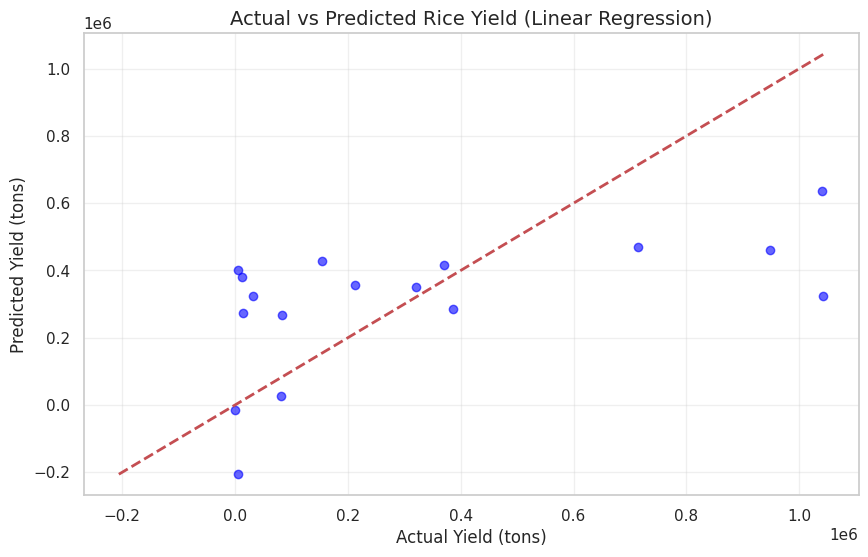

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# เลือกฟีเจอร์ที่ต้องการใช้
features = ['year_2023', 'P_P: Very Low', 'pH_pH: Slightly Alkaline', 'AvgRain', 'Tmax', 'Tmin', 'rice_napee']
X = merged_df_final[features]
y = merged_df_final['yield(tons)']

# แบ่งข้อมูลเป็น Training set และ Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# ทำนายผลลัพธ์จากโมเดล Linear Regression
lr_predictions = lr_model.predict(X_test)

# คำนวณ R² Score สำหรับ Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
print(f"R² Score for Linear Regression: {lr_r2:.4f}")

# คำนวณ RMSE สำหรับ Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)  # คำนวณ Mean Squared Error
lr_rmse = np.sqrt(lr_mse)  # คำนวณ RMSE ใช้ np.sqrt สำหรับความเสถียรทางตัวเลข
print(f"RMSE for Linear Regression: {lr_rmse:.4f}")

# สร้างกราฟประเมินประสิทธิภาพของโมเดล (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.6)
# สร้างเส้นการทำนายที่สมบูรณ์แบบ (45 องศา)
min_val = min(min(y_test), min(lr_predictions))
max_val = max(max(y_test), max(lr_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs Predicted Rice Yield (Linear Regression)', fontsize=14)
plt.xlabel('Actual Yield (tons)', fontsize=12)
plt.ylabel('Predicted Yield (tons)', fontsize=12)
plt.grid(True, alpha=0.3)

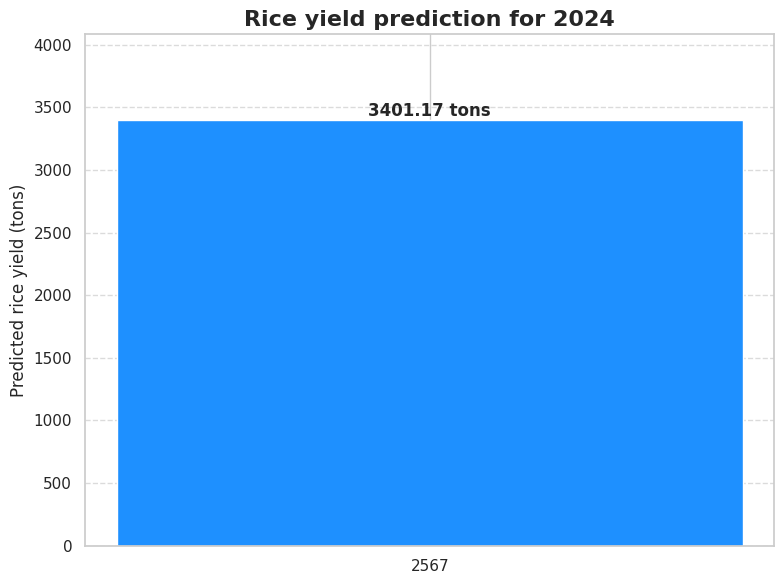

ผลผลิตข้าวที่ทำนายสำหรับปี 2567: 3401.17 ตัน


In [ ]:
# ทำนายผลผลิตข้าวเฉพาะปี 2567 (2024)
future_year = 2024

# สร้าง DataFrame สำหรับข้อมูลในอนาคต
future_feature = pd.DataFrame(columns=features, index=[0])

# ใช้ค่าเฉลี่ยของแต่ละ feature จากข้อมูลเดิม
# ใช้ค่าเฉลี่ยจากข้อมูลฝึกสำหรับแต่ละคุณลักษณะ
future_feature.loc[0] = X_train.mean().copy()
# กำหนดให้ year_2023 เป็น 0 เนื่องจากเป็นปีในอนาคต
future_feature.loc[0, 'year_2023'] = 0

# ทำนายผลผลิตข้าวในปี 2567 ด้วยโมเดล Linear Regression
prediction_2567 = lr_model.predict(future_feature)[0]

# สร้างกราฟแสดงผลการทำนาย
plt.figure(figsize=(8, 6))
plt.bar(['2567'], [prediction_2567], color='#1E90FF', width=0.5)

# ใส่ค่าทำนายบนกราฟ
plt.text(0, prediction_2567 + 0.5, f'{prediction_2567:.2f} tons',
         ha='center', va='bottom', fontsize=12, fontweight='bold')

# ตกแต่งกราฟ
plt.ylabel('Predicted rice yield (tons)', fontsize=12)#'ผลผลิตข้าวที่ทำนาย (ตัน)
plt.title('Rice yield prediction for 2024', fontsize=16, fontweight='bold')#การทำนายผลผลิตข้าวปี 2567
plt.ylim(0, prediction_2567 * 1.2)  # กำหนดขอบเขตแกน y
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# แสดงผลในรูปแบบข้อความ
print(f"ผลผลิตข้าวที่ทำนายสำหรับปี 2567: {prediction_2567:.2f} ตัน")

ไม่พบไฟล์ CSV โปรดตรวจสอบว่าได้เตรียมข้อมูลแล้ว


<ipython-input-203-0ee9b7e576a2>:173: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


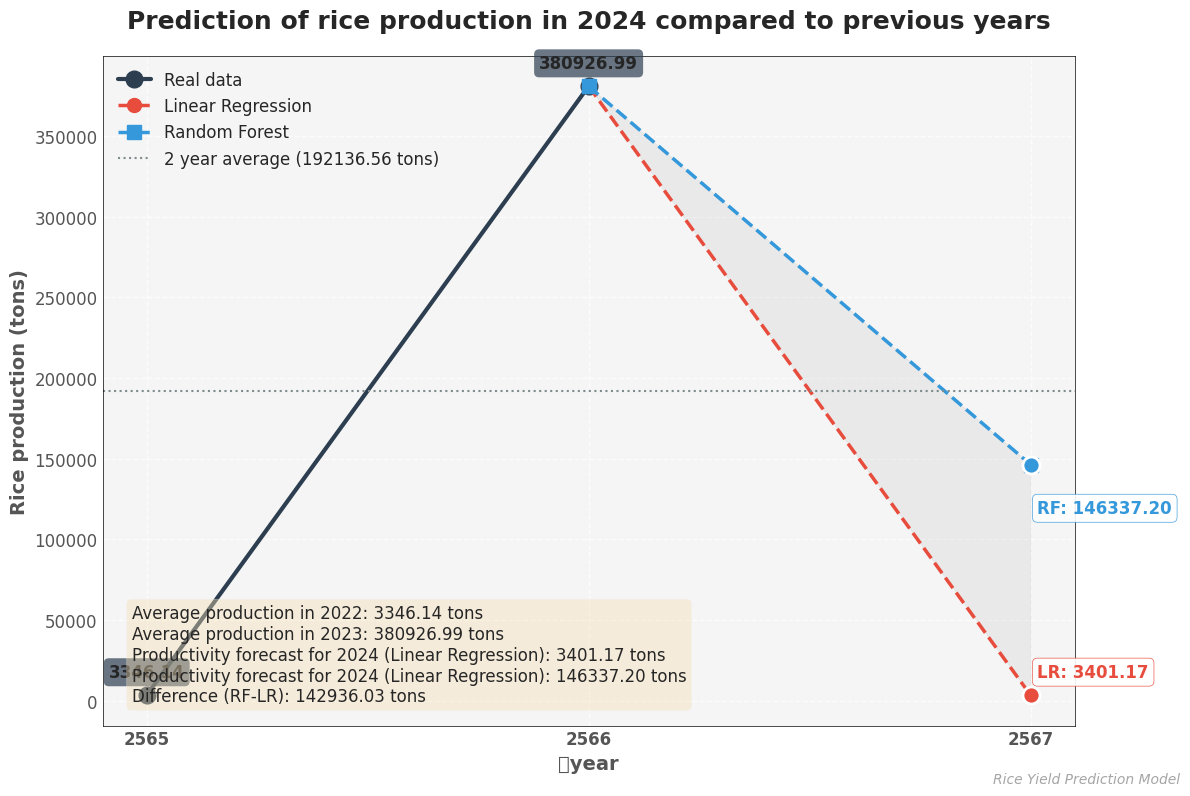

ผลผลิตข้าวที่ทำนายสำหรับปี 2567 (Linear Regression): 3401.17 ตัน
ผลผลิตข้าวที่ทำนายสำหรับปี 2567 (Random Forest): 146337.20 ตัน
ความแตกต่างระหว่างโมเดล (RF-LR): 142936.03 ตัน
ค่าเฉลี่ยผลผลิตข้าวปี 2565: 3346.14 ตัน
ค่าเฉลี่ยผลผลิตข้าวปี 2566: 380926.99 ตัน
การเปลี่ยนแปลงจากปี 2565 ถึง 2566: 377580.84 ตัน (11284.06%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib.ticker import StrMethodFormatter


plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# อ่านข้อมูลจากไฟล์ (หรือใช้ข้อมูลที่มีอยู่แล้ว)
try:
    merged_df_final = pd.read_csv('merged_df_final')
    print("อ่านข้อมูลสำเร็จ!")
except:
    print("ไม่พบไฟล์ CSV โปรดตรวจสอบว่าได้เตรียมข้อมูลแล้ว")

# เลือกฟีเจอร์สำหรับการทำนาย
features = ['year_2023', 'P_P: Very Low', 'pH_pH: Slightly Alkaline', 'AvgRain', 'Tmax', 'Tmin', 'rice_napee']
X = merged_df_final[features]
y = merged_df_final['yield(tons)']

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผลผลิตข้าวเฉพาะปี 2567 (2024)
future_year = 2024

# สร้าง DataFrame สำหรับข้อมูลในอนาคต
future_feature_lr = pd.DataFrame(columns=features, index=[0])
future_feature_rf = pd.DataFrame(columns=features, index=[0])

# ใช้ค่าเฉลี่ยของแต่ละ feature จากข้อมูลเดิม
future_feature_lr.loc[0] = X_train.mean().copy()
future_feature_rf.loc[0] = X_train.mean().copy()

# กำหนดให้ year_2023 เป็น 0 เนื่องจากเป็นปีในอนาคต (2024)
future_feature_lr.loc[0, 'year_2023'] = 0
future_feature_rf.loc[0, 'year_2023'] = 0

# ทำนายผลผลิตข้าวในปี 2567 ด้วยโมเดล Linear Regression และ Random Forest
prediction_2567_lr = lr_model.predict(future_feature_lr)[0]
prediction_2567_rf = rf_model.predict(future_feature_rf)[0]

# เตรียมข้อมูลสำหรับกราฟเส้น
years = [2022, 2023, 2024]  # ปี 2565, 2566, 2567
years_thai = ['2565', '2566', '2567']  # ชื่อแกน x แบบไทย

# หาค่าเฉลี่ยผลผลิตปี 2565 (2022)
yield_2022 = merged_df_final[merged_df_final['year_2023'] == 0]['yield(tons)'].mean()

# หาค่าเฉลี่ยผลผลิตปี 2566 (2023)
yield_2023 = merged_df_final[merged_df_final['year_2023'] == 1]['yield(tons)'].mean()

# เตรียมข้อมูลสำหรับกราฟ
yields_lr = [yield_2022, yield_2023, prediction_2567_lr]
yields_rf = [yield_2022, yield_2023, prediction_2567_rf]

# สร้างกราฟเส้นแสดงแนวโน้มและการทำนาย
fig, ax = plt.subplots(figsize=(12, 8))

# กำหนดสีพื้นหลังให้สวยงาม
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('white')

# พล็อตเส้นข้อมูลจริง
ax.plot(years[:2], [yield_2022, yield_2023], marker='o', linestyle='-',
        color='#2C3E50', linewidth=3, markersize=12,
        label='Real data')#ข้อมูลจริง

# พล็อตเส้นทำนาย Linear Regression
ax.plot([years[1], years[2]], [yield_2023, prediction_2567_lr], marker='o',
        linestyle='--', color='#E74C3C', linewidth=2.5, markersize=10,
        label='Linear Regression')

# พล็อตเส้นทำนาย Random Forest
ax.plot([years[1], years[2]], [yield_2023, prediction_2567_rf], marker='s',
        linestyle='--', color='#3498DB', linewidth=2.5, markersize=10,
        label='Random Forest')

# เพิ่มเส้นแนวนอนแสดงค่าเฉลี่ย
avg_all_years = (yield_2022 + yield_2023) / 2
ax.axhline(y=avg_all_years, color='#7F8C8D', linestyle=':', linewidth=1.5,
           label=f'2 year average ({avg_all_years:.2f} tons)')#ค่าเฉลี่ย2ปี(ตัน)

# ใส่จุดไฮไลท์สำหรับค่าทำนายปี 2567
ax.scatter(2024, prediction_2567_lr, s=150, color='#E74C3C', zorder=5, edgecolor='white', linewidth=2)
ax.scatter(2024, prediction_2567_rf, s=150, color='#3498DB', zorder=5, edgecolor='white', linewidth=2)

# ใส่ค่าตัวเลขบนกราฟ
for i, year in enumerate(years):
    # ใส่ค่าจริงสำหรับปี 2022, 2023
    if i < 2:
        ax.annotate(f'{yields_lr[i]:.2f}', xy=(year, yields_lr[i]), xytext=(0, 10),
                   textcoords='offset points', ha='center', va='bottom', fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", fc='#2C3E50', ec="none", alpha=0.7, color='white'))

    # ใส่ค่าทำนายสำหรับปี 2024
    if i == 2:
        ax.annotate(f'LR: {prediction_2567_lr:.2f}', xy=(year, prediction_2567_lr), xytext=(5, 10),
                   textcoords='offset points', ha='left', va='bottom', fontweight='bold', color='#E74C3C',
                   bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="#E74C3C", alpha=0.9))

        ax.annotate(f'RF: {prediction_2567_rf:.2f}', xy=(year, prediction_2567_rf), xytext=(5, -25),
                   textcoords='offset points', ha='left', va='top', fontweight='bold', color='#3498DB',
                   bbox=dict(boxstyle="round,pad=0.3", fc='white', ec="#3498DB", alpha=0.9))

# ปรับแต่งแกนและตัวอักษร
ax.set_xticks(years)
ax.set_xticklabels(years_thai, fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.tick_params(axis='both', which='major', labelsize=12)

# เพิ่มกรอบ grid ให้อ่านง่าย
ax.grid(True, linestyle='--', alpha=0.7)

# ใส่เส้นขอบสีดำบางๆ รอบกราฟ
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)

# เพิ่มพื้นที่แรเงาระหว่างเส้นทำนาย
if prediction_2567_lr != prediction_2567_rf:
    ax.fill_between([years[1], years[2]],
                  [yield_2023, prediction_2567_lr],
                  [yield_2023, prediction_2567_rf],
                  color='gray', alpha=0.1)

# ใส่ชื่อแกนและชื่อกราฟ
ax.set_xlabel('ัyear', fontsize=14, fontweight='bold')#ปี
ax.set_ylabel('Rice production (tons)', fontsize=14, fontweight='bold')#ผลผลิตข้าว (ตัน)
ax.set_title('Prediction of rice production in 2024 compared to previous years', #การทำนายผลผลิตข้าวปี 2567
            fontsize=18, fontweight='bold', pad=20)

# เพิ่มคำอธิบายเพิ่มเติมในกรอบ
textstr = '\n'.join((
    f'Average production in 2022: {yield_2022:.2f} tons',#ผลผลิตเฉลี่ยปี 2565
    f'Average production in 2023: {yield_2023:.2f} tons',#ผลผลิตเฉลี่ยปี 2566
    f'Productivity forecast for 2024 (Linear Regression): {prediction_2567_lr:.2f} tons',#ผลผลิตทำนายปี 2567 (Linear Regression)
    f'Productivity forecast for 2024 (Linear Regression): {prediction_2567_rf:.2f} tons',#ผลผลิตทำนายปี 2567 (Random Forest)
    f'Difference (RF-LR): {prediction_2567_rf - prediction_2567_lr:.2f} tons'#ความแตกต่าง (RF-LR)
))

# สร้างกรอบข้อความสรุป
props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
ax.text(0.03, 0.03, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=props)

# ปรับตำแหน่งของ legend
ax.legend(loc='upper left', fontsize=12, framealpha=0.9, edgecolor='black')

# เพิ่มลายน้ำหรือข้อความบนกราฟ (ถ้าต้องการ)
fig.text(0.99, 0.01, 'Rice Yield Prediction Model',
         fontsize=10, color='gray', ha='right', style='italic', alpha=0.7)

# ปรับขอบกราฟให้มีระยะห่างเหมาะสม
plt.tight_layout()

# แสดงกราฟ
plt.show()

# แสดงผลในรูปแบบข้อความ
print(f"ผลผลิตข้าวที่ทำนายสำหรับปี 2567 (Linear Regression): {prediction_2567_lr:.2f} ตัน")
print(f"ผลผลิตข้าวที่ทำนายสำหรับปี 2567 (Random Forest): {prediction_2567_rf:.2f} ตัน")
print(f"ความแตกต่างระหว่างโมเดล (RF-LR): {prediction_2567_rf - prediction_2567_lr:.2f} ตัน")
print(f"ค่าเฉลี่ยผลผลิตข้าวปี 2565: {yield_2022:.2f} ตัน")
print(f"ค่าเฉลี่ยผลผลิตข้าวปี 2566: {yield_2023:.2f} ตัน")
print(f"การเปลี่ยนแปลงจากปี 2565 ถึง 2566: {yield_2023 - yield_2022:.2f} ตัน ({((yield_2023 - yield_2022) / yield_2022 * 100):.2f}%)")

# Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# สร้างโมเดล Random Forest Regressor
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

# ทำนายผลลัพธ์จากโมเดล Random Forest Regressor
rfr_predictions = rfr_model.predict(X_test)

# คำนวณ R² Score สำหรับ Random Forest Regressor
rfr_r2 = r2_score(y_test, rfr_predictions)
print(f"R² Score for Random Forest Regressor: {rfr_r2:.4f}")

# คำนวณ RMSE สำหรับ Random Forest Regressor
rfr_mse = mean_squared_error(y_test, rfr_predictions)  # คำนวณ Mean Squared Error
rfr_rmse = rfr_mse**0.5  # คำนวณ RMSE
print(f"RMSE for Random Forest Regressor: {rfr_rmse:.4f}")

R² Score for Random Forest Regressor: 0.3819
RMSE for Random Forest Regressor: 290514.8766


R² Score for Random Forest Regressor: 0.3819
RMSE for Random Forest Regressor: 290514.8766


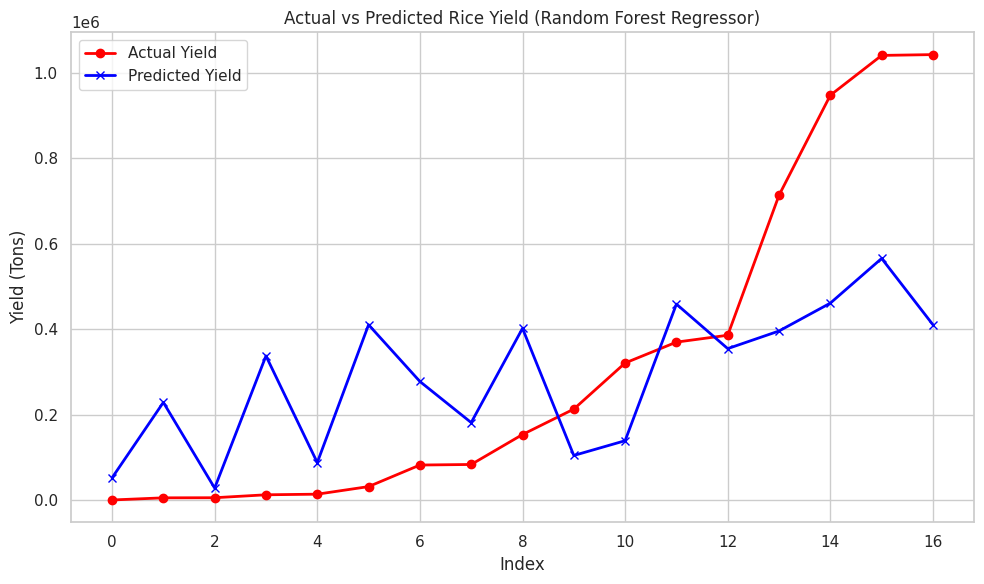

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ทำนายผลลัพธ์จากโมเดล Random Forest Regressor
rfr_predictions = rfr_model.predict(X_test)

# คำนวณ R² Score และ RMSE สำหรับ Random Forest Regressor
rfr_r2 = r2_score(y_test, rfr_predictions)
print(f"R² Score for Random Forest Regressor: {rfr_r2:.4f}")

rfr_mse = mean_squared_error(y_test, rfr_predictions)  # คำนวณ Mean Squared Error
rfr_rmse = rfr_mse**0.5  # คำนวณ RMSE
print(f"RMSE for Random Forest Regressor: {rfr_rmse:.4f}")

# เรียงข้อมูลตามผลผลิตจริงเพื่อให้กราฟดูเรียบขึ้น
indices = np.argsort(y_test.values)
sorted_y_test = y_test.values[indices]
sorted_predictions = rfr_predictions[indices]

# แสดงกราฟเส้นผลผลิตข้าวที่ทำนายจาก Random Forest Regressor
plt.figure(figsize=(10, 6))

# แสดงผลผลิตจริงด้วยเส้น
plt.plot(range(len(sorted_y_test)), sorted_y_test, color='red',
         linewidth=2, marker='o', label='Actual Yield')

# แสดงผลผลิตที่ทำนายด้วยเส้น
plt.plot(range(len(sorted_predictions)), sorted_predictions, color='blue',
         linewidth=2, marker='x', label='Predicted Yield')

plt.xlabel('Index')
plt.ylabel('Yield (Tons)')
plt.title('Actual vs Predicted Rice Yield (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

R² Score for Random Forest Regressor: 0.3819
RMSE for Random Forest Regressor: 290514.8766


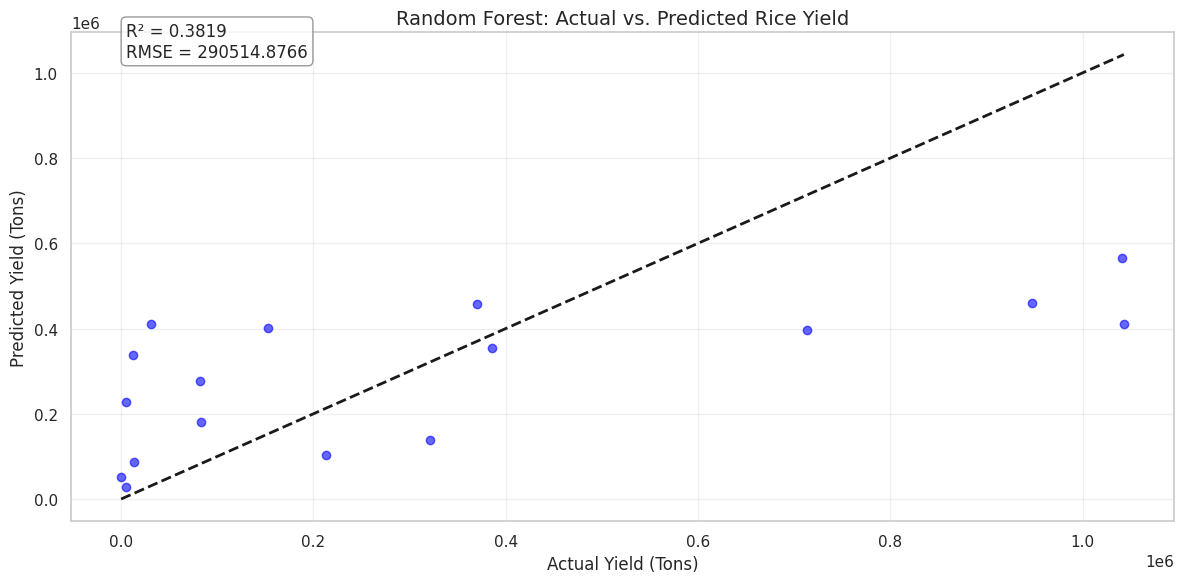

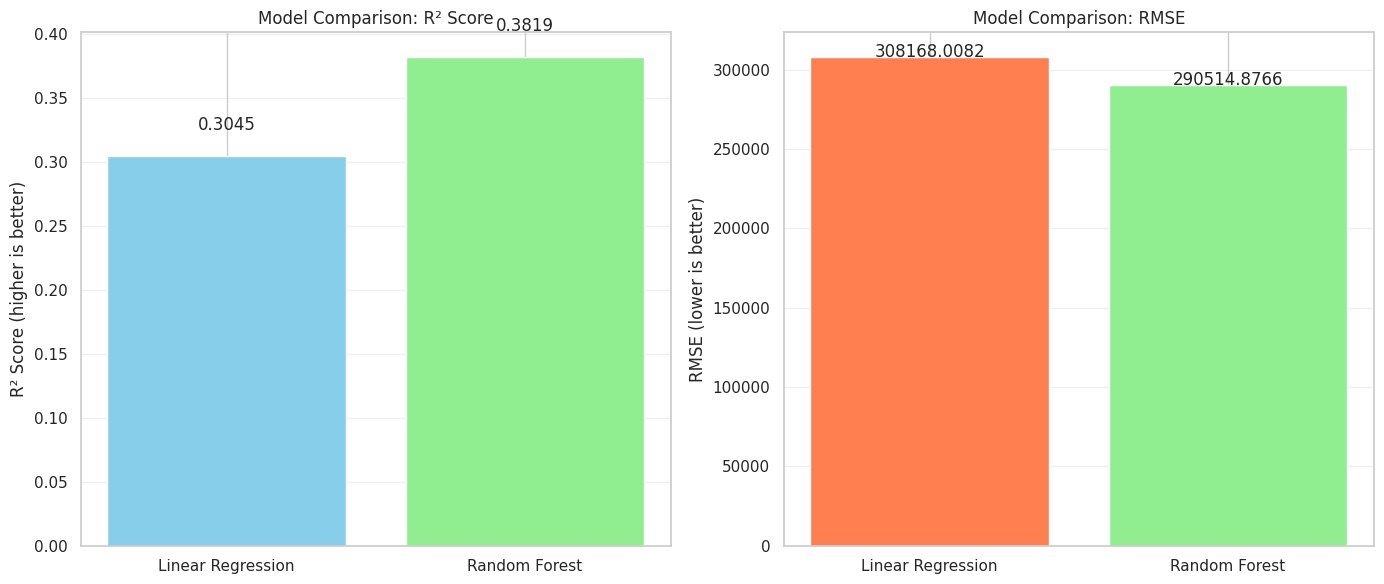

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² Score and RMSE for Random Forest Regressor
rfr_r2 = r2_score(y_test, rfr_predictions)
print(f"R² Score for Random Forest Regressor: {rfr_r2:.4f}")

rfr_mse = mean_squared_error(y_test, rfr_predictions)
rfr_rmse = np.sqrt(rfr_mse)  # Using np.sqrt for better numerical stability
print(f"RMSE for Random Forest Regressor: {rfr_rmse:.4f}")

# Create a better visualization
plt.figure(figsize=(12, 6))

# Create a scatter plot for actual vs. predicted values
plt.scatter(y_test, rfr_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line

plt.xlabel('Actual Yield (Tons)', fontsize=12)
plt.ylabel('Predicted Yield (Tons)', fontsize=12)
plt.title('Random Forest: Actual vs. Predicted Rice Yield', fontsize=14)
plt.grid(True, alpha=0.3)

# Add R² and RMSE information to the plot
plt.annotate(f'R² = {rfr_r2:.4f}\nRMSE = {rfr_rmse:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Now create a comparison plot between models
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rfr_r2]
rmse_scores = [lr_rmse, rfr_rmse]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² scores
ax[0].bar(models, r2_scores, color=['skyblue', 'lightgreen'])
ax[0].set_ylabel('R² Score (higher is better)')
ax[0].set_title('Model Comparison: R² Score')
ax[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(r2_scores):
    ax[0].text(i, v + 0.02, f'{v:.4f}', ha='center')

# Plot RMSE scores
ax[1].bar(models, rmse_scores, color=['coral', 'lightgreen'])
ax[1].set_ylabel('RMSE (lower is better)')
ax[1].set_title('Model Comparison: RMSE')
ax[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(rmse_scores):
    ax[1].text(i, v + 0.5, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

# สรุป การเปรียบเทียบ Linear Regressiond กับ Random Forest

ไม่พบไฟล์ CSV โปรดตรวจสอบว่าได้เตรียมข้อมูลแล้ว


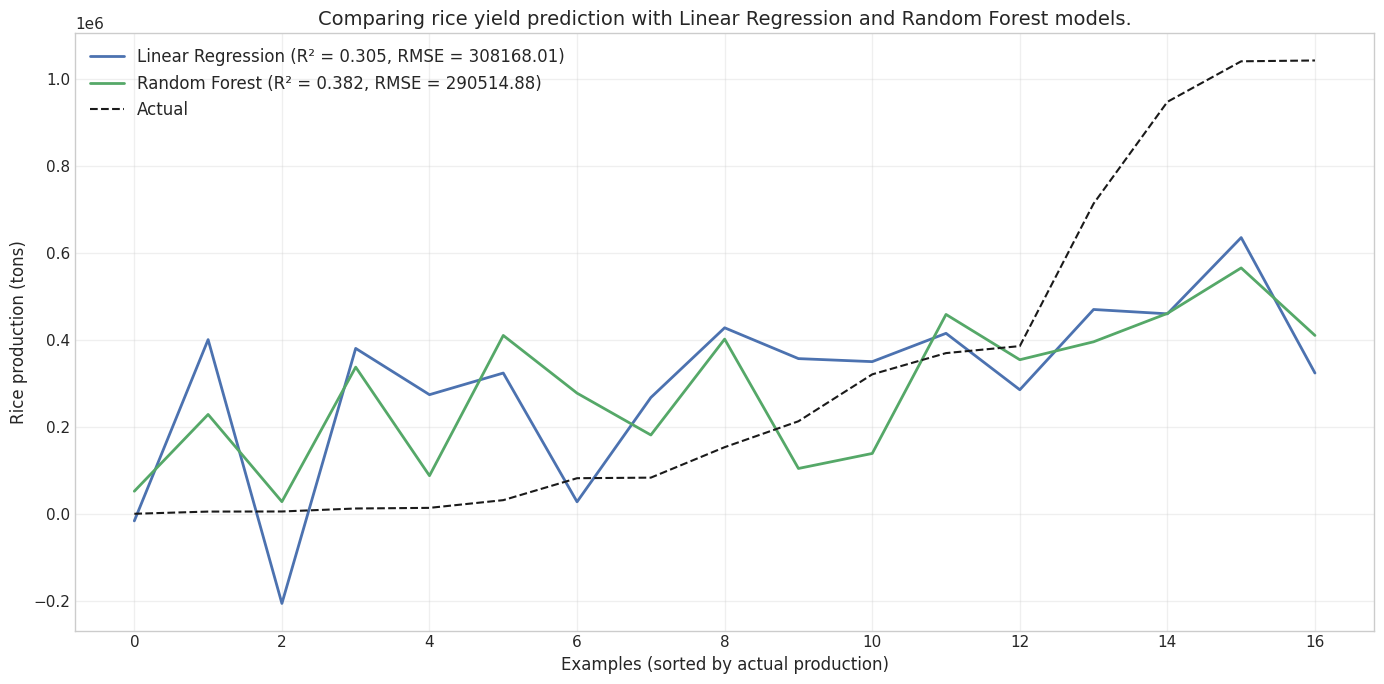


===== สรุปผลเปรียบเทียบโมเดล =====
Linear Regression: R² = 0.3045, RMSE = 308168.01
Random Forest:     R² = 0.3819, RMSE = 290514.88
ผลต่าง (RF - LR):   R² = 0.0774, RMSE = 17653.13

===== ทำนายผลผลิตข้าวในอนาคต =====


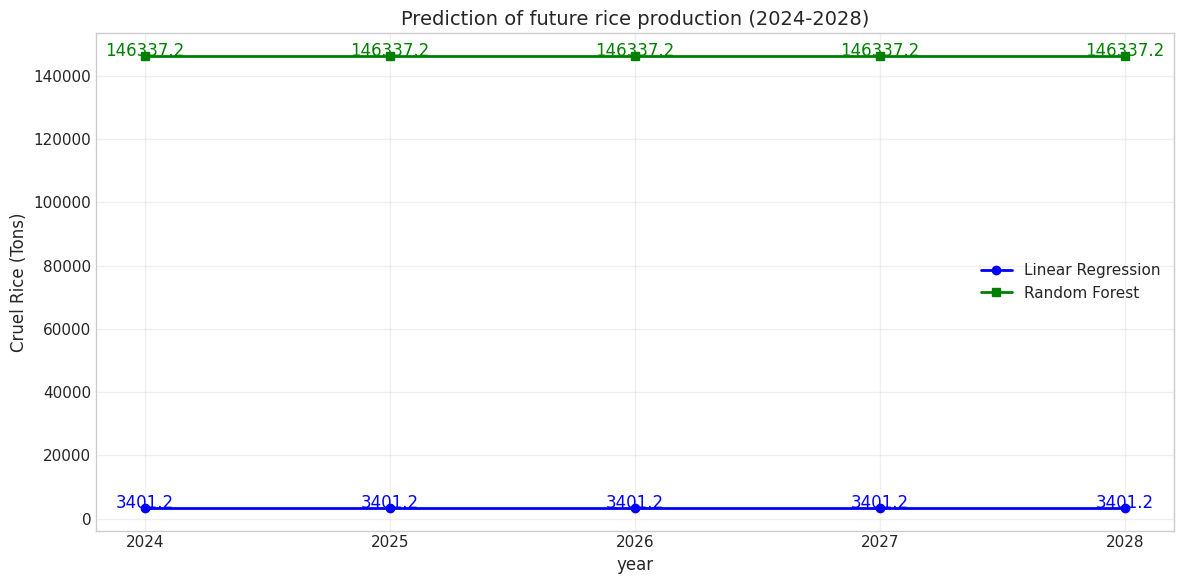

     ปี  Linear Regression  Random Forest  ผลต่าง (RF-LR)
0  2024            3401.17       146337.2       142936.03
1  2025            3401.17       146337.2       142936.03
2  2026            3401.17       146337.2       142936.03
3  2027            3401.17       146337.2       142936.03
4  2028            3401.17       146337.2       142936.03


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# อ่านข้อมูลจากไฟล์ (หรือใช้ข้อมูลที่มีอยู่แล้ว)
try:
    merged_df_final = pd.read_csv('merged_df_final_clean.csv')
    print("อ่านข้อมูลสำเร็จ!")
except:
    print("ไม่พบไฟล์ CSV โปรดตรวจสอบว่าได้เตรียมข้อมูลแล้ว")

# เลือกฟีเจอร์สำหรับการทำนาย
features = ['year_2023', 'P_P: Very Low', 'pH_pH: Slightly Alkaline', 'AvgRain', 'Tmax', 'Tmin', 'rice_napee']
X = merged_df_final[features]
y = merged_df_final['yield(tons)']

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# คำนวณค่าประสิทธิภาพของโมเดล
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# สร้างกราฟเส้นเปรียบเทียบระหว่างสองโมเดล
plt.figure(figsize=(14, 7))

# เรียงลำดับข้อมูลเพื่อให้กราฟอ่านง่ายขึ้น
sorted_indices = np.argsort(y_test)
sorted_y_test = y_test.iloc[sorted_indices]
sorted_lr_pred = lr_predictions[sorted_indices]
sorted_rf_pred = rf_predictions[sorted_indices]

# สร้างตัวแปรแกน x สำหรับกราฟ
x_values = range(len(sorted_y_test))

# วาดกราฟเส้นสำหรับโมเดล Linear Regression
plt.plot(x_values, sorted_lr_pred, 'b-', linewidth=2, label=f'Linear Regression (R² = {lr_r2:.3f}, RMSE = {lr_rmse:.2f})')

# วาดกราฟเส้นสำหรับโมเดล Random Forest
plt.plot(x_values, sorted_rf_pred, 'g-', linewidth=2, label=f'Random Forest (R² = {rf_r2:.3f}, RMSE = {rf_rmse:.2f})')

# วาดกราฟเส้นสำหรับค่าจริง
plt.plot(x_values, sorted_y_test, 'k--', linewidth=1.5, label='Actual')#ค่าจริง

# ตกแต่งกราฟ
plt.title('Comparing rice yield prediction with Linear Regression and Random Forest models.', fontsize=14)#เปรียบเทียบการทำนายผลผลิตข้าวด้วยโมเดล Linear Regression และ Random Forest
plt.xlabel('Examples (sorted by actual production)', fontsize=12)#ตัวอย่าง (เรียงตามผลผลิตจริง)
plt.ylabel('Rice production (tons)', fontsize=12)#ผลผลิตข้าว (ตัน)
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# แสดงกราฟ
plt.show()

# สรุปผลเปรียบเทียบโมเดล
print("\n===== สรุปผลเปรียบเทียบโมเดล =====")
print(f"Linear Regression: R² = {lr_r2:.4f}, RMSE = {lr_rmse:.2f}")
print(f"Random Forest:     R² = {rf_r2:.4f}, RMSE = {rf_rmse:.2f}")
print(f"ผลต่าง (RF - LR):   R² = {rf_r2 - lr_r2:.4f}, RMSE = {lr_rmse - rf_rmse:.2f}")

# ทำนายข้อมูลในอนาคต
print("\n===== ทำนายผลผลิตข้าวในอนาคต =====")#

# สร้างข้อมูลสำหรับทำนายผลผลิตข้าวในอีก 5 ปีข้างหน้า
future_years = list(range(2024, 2029))
X_future = []

for year in future_years:
    future_data = X_train.mean().copy()  # ใช้ค่าเฉลี่ยของข้อมูลฝึกสอน
    future_data['year_2023'] = 1 if year == 2023 else 0  # ปรับค่าปีให้เหมาะสม
    X_future.append(future_data)

X_future_df = pd.DataFrame(X_future)

# ทำนายด้วยทั้งสองโมเดล
lr_future_pred = lr_model.predict(X_future_df)
rf_future_pred = rf_model.predict(X_future_df)

# สร้างกราฟเส้นเปรียบเทียบการทำนายในอนาคต
plt.figure(figsize=(12, 6))

# วาดกราฟเส้นการทำนายในอนาคต
plt.plot(future_years, lr_future_pred, 'o-', color='blue', linewidth=2,
         label=f'Linear Regression')
plt.plot(future_years, rf_future_pred, 's-', color='green', linewidth=2,
         label=f'Random Forest')

# เพิ่มค่าเป็นตัวเลขบนกราฟ
for i, year in enumerate(future_years):
    plt.text(year, lr_future_pred[i] + 5, f'{lr_future_pred[i]:.1f}', ha='center', color='blue')
    plt.text(year, rf_future_pred[i] - 5, f'{rf_future_pred[i]:.1f}', ha='center', color='green')

# ตกแต่งกราฟ
plt.title('Prediction of future rice production (2024-2028)', fontsize=14)#การทำนายผลผลิตข้าวในอนาคต (2024-2028)
plt.xlabel('year', fontsize=12)#ปี
plt.ylabel('Cruel Rice (Tons)', fontsize=12)#ผลผลิตข้าวที่ทำนาย (ตัน)
plt.xticks(future_years)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# แสดงกราฟ
plt.show()

# แสดงตารางเปรียบเทียบค่าทำนายในอนาคต
future_prediction_df = pd.DataFrame({
    'ปี': future_years,
    'Linear Regression': lr_future_pred.round(2),
    'Random Forest': rf_future_pred.round(2),
    'ผลต่าง (RF-LR)': (rf_future_pred - lr_future_pred).round(2)
})

print(future_prediction_df)